In [2]:
import os
import sys
import yaml
import glob
import pandas as pd
from imp import reload

In [5]:
sys.path.append('/'.join(os.getcwd().split('/')[:-1])+'/workflow/scripts')
#sys.path.append(os.getcwd()+'/workflow/scripts/auxilliary/HDX_LIMIT')

In [6]:
sys.path

['/Users/rwl0960/Documents/hdx/HDX_LIMIT-Pipeline/notebooks',
 '/Users/rwl0960/opt/anaconda3/envs/dask_lab/lib/python37.zip',
 '/Users/rwl0960/opt/anaconda3/envs/dask_lab/lib/python3.7',
 '/Users/rwl0960/opt/anaconda3/envs/dask_lab/lib/python3.7/lib-dynload',
 '',
 '/Users/rwl0960/opt/anaconda3/envs/dask_lab/lib/python3.7/site-packages',
 '/Users/rwl0960/opt/anaconda3/envs/dask_lab/lib/python3.7/site-packages/IPython/extensions',
 '/Users/rwl0960/.ipython',
 '/Users/rwl0960/Documents/hdx/HDX_LIMIT-Pipeline/workflow/scripts']

In [4]:
config = yaml.load(open('sample_data/config.yaml', 'rb').read(), Loader=yaml.FullLoader)
library_info = pd.read_csv('sample_data/library_info.csv')

In [5]:
# check that all portions load correctly
from HDX_LIMIT import io, datatypes, processing, preprocessing, pipeline

In [ ]:
# io module test
obj = 'test'
io.limit_write(obj, 'test.cpickle.zlib')
io.limit_read('test.cpickle.zlib')

In [ ]:
from HDX_LIMIT.pipeline.extract_timepoint_tensors import main as extract_timepoint_tensors

In [ ]:
extract_timepoint_tensors(
    'sample_data/library_info.csv', 
    'sample_data/mzml/180604_Mix2_MES_nonlin_UN.mzML.gz', 
    outputs=['sample_data/tensors/0_180604_Mix2_MES_nonlin_UN.mzML.gz.cpickle.zlib'], 
    timepoints_dict=config, indices=[0])

In [ ]:
from HDX_LIMIT.processing import TensorGenerator

In [ ]:
tg = TensorGenerator('sample_data/tensors/0_180604_Mix2_MES_nonlin_UN.mzML.gz.cpickle.zlib', 0, library_info)

In [ ]:
tg.DataTensor.factorize()

In [ ]:
tg.DataTensor.factors[0].isotope_clusters[0].baseline_integrated_mz

In [ ]:
library_info.iloc[0]

In [13]:
from HDX_LIMIT.pipeline.generate_tensor_ics import main as generate_tensor_ics

In [14]:
help(generate_tensor_ics)

Help on function main in module HDX_LIMIT.pipeline.generate_tensor_ics:

main(library_info_path, tensor_input_path, timepoints_dict, isotope_clusters_output_path=None, return_flag=False, gauss_params=(3, 1))
    Performs nonnegative tensor factorization to deconvolute input tensor, identifies IsotopeCluster objects, 
        and optionally returns or writes output list of IsotopeClusters.
    
    Args:
            library_info_path (str): path/to/library_info.csv
            tensor_input_path (str): path/to/tensor.cpickle.zlib
            timepoints_dict (dict): dictionary with 'timepoints' key containing list of hdx timepoints in integer seconds, which are keys mapping to lists of each timepoint's replicate .mzML filenames 
            isotope_clusters_output_path (str): path/to/file for main output - list of IsotopeClusters objects
            return_flag (bool): option to return output in python, for notebook context
            gauss_params (tuple of ints/floats): Gaussian smoothi

In [15]:
un0_ics = generate_tensor_ics('sample_data/library_info.csv', 'sample_data/tensors/0_180604_Mix2_MES_nonlin_UN.mzML.gz.cpickle.zlib', config, return_flag=True, gauss_params=(3,1))

Pre-Initialization: 0.193145751953125
Post-Initialization: 0.213348388671875
0 Start Process Memory (GB): 0.213348388671875


/Users/rwl0960/Documents/hdx/refactoring/workflow/scripts/HDX_LIMIT/datatypes.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.seq_out = np.array(kwargs["seq_out"])


1 Read Params Process Memory (GB): 0.21583175659179688
2 Zeroing Process Memory (GB): 0.21583175659179688
3 Pre-Factorization Process Memory (GB): 0.21583175659179688
4 13 Factors  Start Process Memory (GB): 0.21583175659179688
Irrelevant number of sparsity coefficient (different from the number of modes), they have been set to None.
Irrelevant number of normalization booleans (different from the number of modes), they have been set to False.


/Users/rwl0960/opt/anaconda3/envs/dask_lab/lib/python3.7/site-packages/nn_fac/ntf.py:308: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(factors)


4 13 Factors  End Process Memory (GB): 0.22754287719726562
5 12 Factors  Start Process Memory (GB): 0.22764205932617188
Irrelevant number of sparsity coefficient (different from the number of modes), they have been set to None.
Irrelevant number of normalization booleans (different from the number of modes), they have been set to False.
5 12 Factors  End Process Memory (GB): 0.22769927978515625
6 11 Factors  Start Process Memory (GB): 0.22769927978515625
Irrelevant number of sparsity coefficient (different from the number of modes), they have been set to None.
Irrelevant number of normalization booleans (different from the number of modes), they have been set to False.
6 11 Factors  End Process Memory (GB): 0.22770309448242188
7 10 Factors  Start Process Memory (GB): 0.22770309448242188
Irrelevant number of sparsity coefficient (different from the number of modes), they have been set to None.
Irrelevant number of normalization booleans (different from the number of modes), they have be

In [6]:
# Glob and order flat list of mzml files
mzml_order = []
for tp in config['timepoints']:
    for fn in config[tp]:
         mzml_order.append(fn)
            
fns = glob.glob('sample_data/tensors/0_180604_Mix2_MES_nonlin_*.mzML.gz.cpickle.zlib')
ordered_fns = [mzml for ref in mzml_order for mzml in fns if ref in mzml]
tp_nested_ordered_fns = [[mzml for ref in config[tp] for mzml in fns if ref in mzml] for tp in config['timepoints']]

In [17]:
# Make all isotope clusters for one index
for tp in tp_nested_ordered_fns:
    for fn in tp:
        out = "sample_data/isotope_clusters/"+fn.split('/')[-1].split('.')[0]+"_clusters.cpickle.zlib"
        generate_tensor_ics('sample_data/library_info.csv', fn, config, isotope_clusters_output_path=out, gauss_params=(3,1))        

Pre-Initialization: 0.198822021484375
Post-Initialization: 0.21889495849609375
0 Start Process Memory (GB): 0.21889495849609375
1 Read Params Process Memory (GB): 0.22135543823242188
2 Zeroing Process Memory (GB): 0.22135543823242188
3 Pre-Factorization Process Memory (GB): 0.22135543823242188
4 13 Factors  Start Process Memory (GB): 0.22135543823242188
Irrelevant number of sparsity coefficient (different from the number of modes), they have been set to None.
Irrelevant number of normalization booleans (different from the number of modes), they have been set to False.
4 13 Factors  End Process Memory (GB): 0.23418045043945312
5 12 Factors  Start Process Memory (GB): 0.23424148559570312
Irrelevant number of sparsity coefficient (different from the number of modes), they have been set to None.
Irrelevant number of normalization booleans (different from the number of modes), they have been set to False.
5 12 Factors  End Process Memory (GB): 0.23424148559570312
6 11 Factors  Start Process

In [11]:
tp_nested_ordered_fns

[['sample_data/tensors/0_180604_Mix2_MES_nonlin_UN.mzML.gz.cpickle.zlib',
  'sample_data/tensors/0_180604_Mix2_MES_nonlin_UN2.mzML.gz.cpickle.zlib',
  'sample_data/tensors/0_180604_Mix2_MES_nonlin_UN3.mzML.gz.cpickle.zlib'],
 ['sample_data/tensors/0_180604_Mix2_MES_nonlin_10s.mzML.gz.cpickle.zlib'],
 ['sample_data/tensors/0_180604_Mix2_MES_nonlin_16s.mzML.gz.cpickle.zlib'],
 ['sample_data/tensors/0_180604_Mix2_MES_nonlin_26s.mzML.gz.cpickle.zlib'],
 ['sample_data/tensors/0_180604_Mix2_MES_nonlin_40s.mzML.gz.cpickle.zlib'],
 ['sample_data/tensors/0_180604_Mix2_MES_nonlin_65s.mzML.gz.cpickle.zlib'],
 ['sample_data/tensors/0_180604_Mix2_MES_nonlin_105s.mzML.gz.cpickle.zlib'],
 ['sample_data/tensors/0_180604_Mix2_MES_nonlin_160s.mzML.gz.cpickle.zlib'],
 ['sample_data/tensors/0_180604_Mix2_MES_nonlin_4m30.mzML.gz.cpickle.zlib'],
 ['sample_data/tensors/0_180604_Mix2_MES_nonlin_7m10.mzML.gz.cpickle.zlib'],
 ['sample_data/tensors/0_180604_Mix2_MES_nonlin_11m30s.mzML.gz.cpickle.zlib'],
 ['sampl

In [45]:
tp_index_ics = []
for tp in tp_nested_ordered_fns:
    timepoint_ics = []
    for fn in tp:
        [timepoint_ics.append(ic) for ic in generate_tensor_ics('sample_data/library_info.csv', fn, config, return_flag=True, gauss_params=(3,1))['all_ics']] #hacky
    tp_index_ics.append(timepoint_ics)

Pre-Initialization: 0.23954391479492188
Post-Initialization: 0.258941650390625
0 Start Process Memory (GB): 0.258941650390625
1 Read Params Process Memory (GB): 0.2614021301269531
2 Zeroing Process Memory (GB): 0.2614021301269531
3 Pre-Factorization Process Memory (GB): 0.2614021301269531
4 13 Factors  Start Process Memory (GB): 0.2614021301269531
Irrelevant number of sparsity coefficient (different from the number of modes), they have been set to None.
Irrelevant number of normalization booleans (different from the number of modes), they have been set to False.
4 13 Factors  End Process Memory (GB): 0.27419281005859375
5 12 Factors  Start Process Memory (GB): 0.27425384521484375
Irrelevant number of sparsity coefficient (different from the number of modes), they have been set to None.
Irrelevant number of normalization booleans (different from the number of modes), they have been set to False.
5 12 Factors  End Process Memory (GB): 0.27425384521484375
6 11 Factors  Start Process Memor

In [59]:
reload(processing)

<module 'HDX_LIMIT.processing' from '/Users/rwl0960/Documents/hdx/refactoring/workflow/scripts/HDX_LIMIT/processing.py'>

In [14]:
from HDX_LIMIT.processing import PathOptimizer

In [15]:
help(PathOptimizer)

Help on class PathOptimizer in module HDX_LIMIT.processing:

class PathOptimizer(builtins.object)
 |  PathOptimizer(name, all_tp_clusters, library_info, timepoints, n_undeut_runs, prefilter=0, old_data_dir=None, **kwargs)
 |  
 |  Generates sample 'paths' - trajectories through HDX timeseries - optimizes 'path' through hdx timeseries for all sample paths and selects an overall winning path.
 |  
 |  all_tp_clusters = <list> of <lists> of <TA.isotope_cluster>s for each HDX timepoint,
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, all_tp_clusters, library_info, timepoints, n_undeut_runs, prefilter=0, old_data_dir=None, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  auc_ground_rmse(self, ics, undeut_grounds=None)
 |  
 |  baseline_peak_error(self, ics)
 |  
 |  bokeh_plot(self, outpath)
 |  
 |  clusters_close_to_line(self, start, slope, undeut_grounds=None, prefiltered_ics=None, max_peak_center=None)
 |  
 |  combo_score(self, ics)

In [61]:
po = PathOptimizer('HHH_rd4_0891.pdb_4.33174', tp_index_ics, library_info, config['timepoints'], 3)

In [62]:
po.optimize_paths()

In [14]:
reload(pipeline)

<module 'HDX_LIMIT.pipeline' from '/Users/rwl0960/Documents/hdx/refactoring/workflow/scripts/HDX_LIMIT/pipeline/__init__.py'>

In [7]:
from HDX_LIMIT.pipeline.optimize_paths import main as optimize_paths
from HDX_LIMIT.pipeline.optimize_paths import optimize_paths_inputs

In [8]:
help(optimize_paths)

Help on function main in module HDX_LIMIT.pipeline.optimize_paths:

main(library_info_path, all_tensor_input_paths, timepoints, return_flag=False, rt_group_name=None, old_data_dir=None, html_plot_out_path=None, winner_out_path=None, runner_out_path=None, undeut_ground_out_path=None, winner_scores_out_path=None, rtdt_com_cvs_out_path=None)
    Uses PathOptimzier class to generate best-estimate hdx-timeseries of IsotopeClusters for a given library protein.
    
    Args:
        library_info_path (str): path/to/library_info.csv
        all_tensor_input_paths (list of strings): list of paths/to/files.cpickle.zlib for all lists of IsotopeClusters from generate_tensor_ics.py
        timepoints (dict): dictionary with 'timepoints' key containing list of hdx timepoints in integer seconds, which are keys mapping to lists of each timepoint's replicate .mzML filenames 
        return_flag: option to return main output in python, for notebook context
        rt_group_name (str): library_info['nam

In [9]:
all_ic_fns = glob.glob('sample_data/isotope_clusters/*')

In [10]:
ic_ins = optimize_paths_inputs('sample_data/library_info.csv', 'sample_data/isotope_clusters/', 'HHH_rd4_0891.pdb_4.33174', config)
ic_ins = [path.split('.')[0]+"_clusters.cpickle.zlib" for path in ic_ins]

In [12]:
p1 = optimize_paths('sample_data/library_info.csv', ic_ins, config, return_flag=True, rt_group_name='HHH_rd4_0891.pdb_4.33174', html_plot_out_path='test_po_plot.html')

hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit


In [12]:
config[0]

['180604_Mix2_MES_nonlin_UN.mzML',
 '180604_Mix2_MES_nonlin_UN2.mzML',
 '180604_Mix2_MES_nonlin_UN3.mzML']

In [63]:
import matplotlib.pyplot as plt

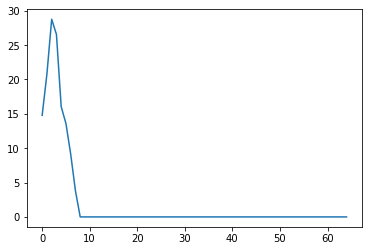

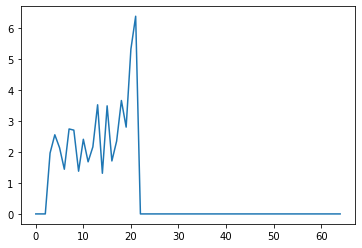

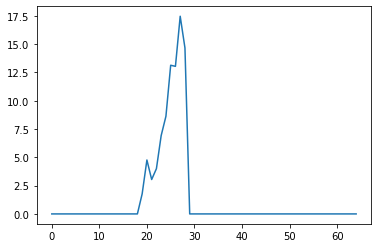

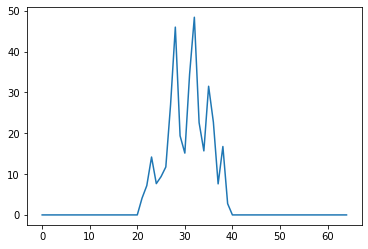

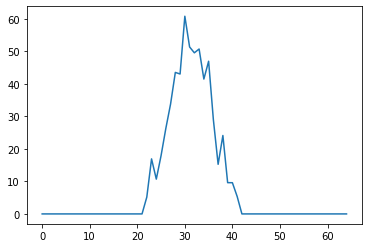

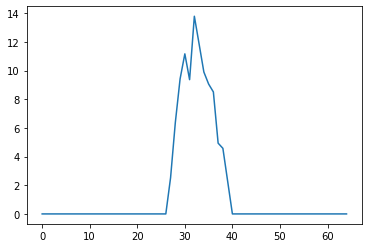

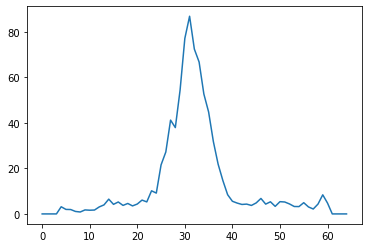

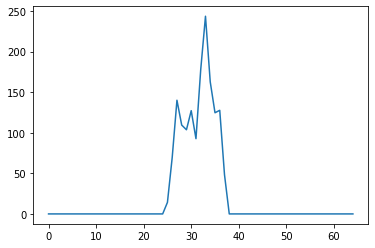

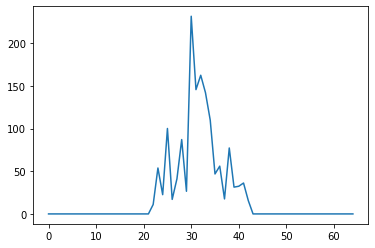

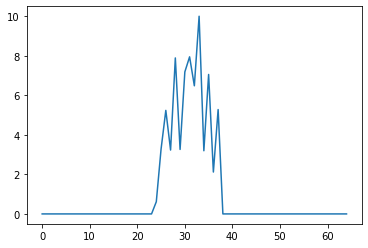

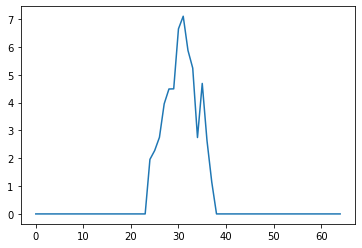

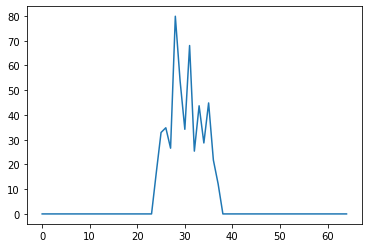

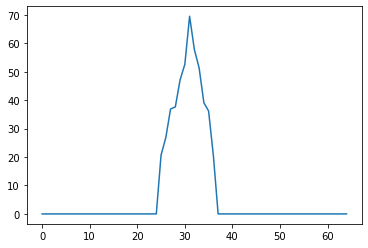

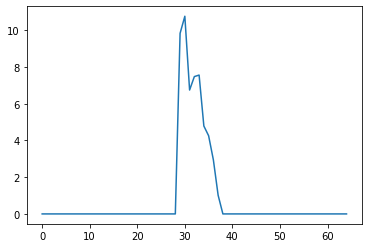

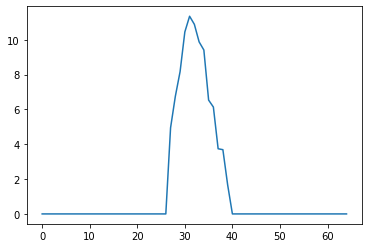

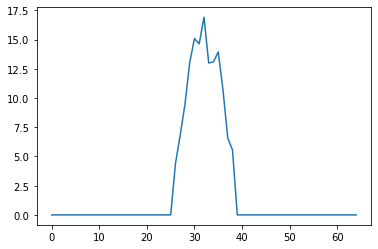

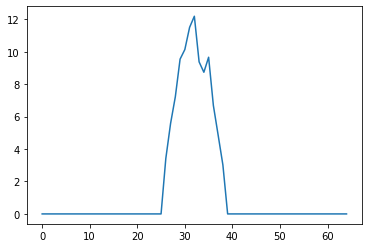

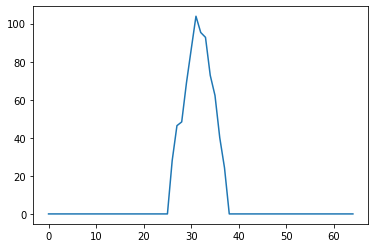

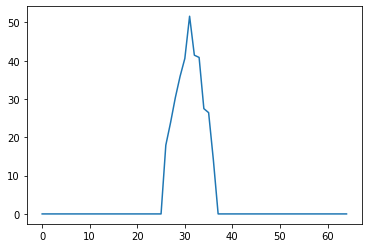

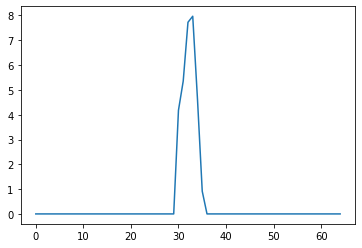

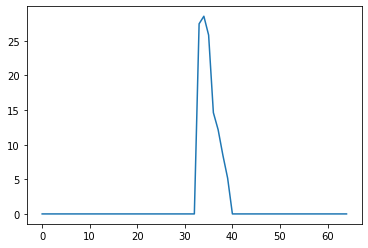

In [66]:
for ic in po.winner:
    plt.plot(ic.baseline_integrated_mz)
    plt.show()
    plt.close()

In [12]:
reload(pipeline)

<module 'HDX_LIMIT.pipeline' from '/Users/rwl0960/Documents/hdx/refactoring/workflow/scripts/HDX_LIMIT/pipeline/__init__.py'>

In [6]:
from HDX_LIMIT.pipeline.idotp_check import main as idotp_check

In [7]:
help(idotp_check)

Help on function main in module HDX_LIMIT.pipeline.idotp_check:

main(library_info_path, undeut_tensor_path_list, output_path=None, return_flag=None, n_factors=15, factor_gauss_params=(3, 1))
    Compares each undeuterated charge state of an rt-group to its theoretical distribution to determine signal quality.
    
    Args:
        library_info_path (string): path/to/library_info.csv
        undeut_tensor_path_list (list of strings): list of paths/to/files.cpickle.zlib
        output_path (string): path/to/output.csv
        return_flag (bool): option to return output in python, for notebook context
        n_factors (int): high number of factors to start factorization with
        factor_gauss_params (tuple of floats): gaussian smoothing parameters in tuple (rt-sigma, dt-sigma), default (3,1)
    
    Returns:
        iso_cluster_list (list): list of IsotopeCluster objects produced from factorized input tensors
        data_tensor_list (list): list of DataTensor objects produced from

In [12]:
tp_nested_ordered_fns[0]

['sample_data/tensors/0_180604_Mix2_MES_nonlin_UN.mzML.gz.cpickle.zlib',
 'sample_data/tensors/0_180604_Mix2_MES_nonlin_UN2.mzML.gz.cpickle.zlib',
 'sample_data/tensors/0_180604_Mix2_MES_nonlin_UN3.mzML.gz.cpickle.zlib']

In [14]:
idotp_check_out = idotp_check('sample_data/library_info.csv', tp_nested_ordered_fns[0], return_flag=True)

0 Start Process Memory (GB): 0.22293472290039062
1 Read Params Process Memory (GB): 0.22540664672851562
2 Zeroing Process Memory (GB): 0.22540664672851562
3 Pre-Factorization Process Memory (GB): 0.22540664672851562
4 15 Factors  Start Process Memory (GB): 0.22540664672851562
Irrelevant number of sparsity coefficient (different from the number of modes), they have been set to None.
Irrelevant number of normalization booleans (different from the number of modes), they have been set to False.
4 15 Factors  End Process Memory (GB): 0.23359298706054688
5 14 Factors  Start Process Memory (GB): 0.23365402221679688
Irrelevant number of sparsity coefficient (different from the number of modes), they have been set to None.
Irrelevant number of normalization booleans (different from the number of modes), they have been set to False.
5 14 Factors  End Process Memory (GB): 0.233154296875
6 13 Factors  Start Process Memory (GB): 0.233154296875
Irrelevant number of sparsity coefficient (different fr

In [17]:
idotp_check_out.keys()

dict_keys(['iso_clusters_list', 'data_tensor_list', 'idotp_list', 'integrated_mz_list'])

In [19]:
max(idotp_check_out['idotp_list'])

0.9826106465622847

In [7]:
from HDX_LIMIT.preprocessing.imtbx_reader import main as imtbx_reader

In [8]:
help(imtbx_reader)

Help on function main in module HDX_LIMIT.preprocessing.imtbx_reader:

main(isotopes_path, names_and_seqs_path, out_path=None, return_flag=None, original_mz_kde_path=None, adjusted_mz_kde_path=None, calibration_outpath=None, polyfit_deg=1, ppm_tolerance=50, intensity_tolerance=10000, cluster_corr_tolerance=0.99, ppm_refilter=10)
    Reads IMTBX file and clusters identified signals with close physical values. 
    
    Args:
        isotopes_path (string): path/to/.peaks.isotopes file from undeuterated mzml
        names_and_seqs_path (string): path/to/.csv with names and sequences of library proteins
        out_path (string): path/to/_intermediate.csv main output file
        return_flag (non-None): option to return main output in Python, for notebook context
        original_mz_kde_path (string): /path/to/file to save original mz-error kde plots
        adjusted_mz_kde_path (string): /path/to/file to save adjusted mz-error kde plots
        calibration_outpath (string): /path/to/file

In [9]:
imtbx_reader('sample_data/isotopes/180604_Mix2_MES_nonlin_UN.mzML.peaks.isotopes', 'sample_data/new_HX_order.csv', out_path='sample_data/isotopes/180604_Mix2_MES_nonlin_UN_intermediate.csv')

,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1207,1209.783744,23.3,23.331618,6043.882368,2,EEHEE_rd4_0528.pdb,55,HMTQVHVDNVTYHFDNPEEAKKFADEVAKKKGLTWTVKDGQFHIEG...
731,1209.858327,-38.3,38.317466,6044.255287,2,HHH_rd4_0931.pdb,54,HMSEKIEKTIERLLKNGVDPEQVKKILKRNGADERQVKEVLERIKG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
356,970.965918,41.4,41.358939,5819.751886,2,EEHEE_rd4_0506.pdb,52,HMATVQMGNLEWHFDNPEQAKEMAEKLAQKKNLTYELHNGTIHIEG...
628,971.034437,-29.2,29.206359,5820.163002,2,HHH_rd4_0262.pdb,49,HMPDEVVKIIRRLKRNGVDDRQVRELLRRQGIDERQIREAEKIVSGNSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,28.4,28.431320,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,3.8,3.805372,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1026,889.786848,26.3,26.263853,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,889.808757,1.6,1.642498,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
356,1164.957647,47.9,47.913233,5819.751886,2,EEHEE_rd4_0506.pdb,52,HMATVQMGNLEWHFDNPEQAKEMAEKLAQKKNLTYELHNGTIHIEG...
628,1165.039870,-22.7,22.663805,5820.163002,2,HHH_rd4_0262.pdb,49,HMPDEVVKIIRRLKRNGVDDRQVRELLRRQGIDERQIREAEKIVSGNSN


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1315.941823,-29.2,29.160615,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1315.952932,-37.6,37.602534,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1322,877.630305,-33.5,33.453976,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,877.637711,-41.9,41.892701,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1272,1158.941611,23.9,23.934509,5789.671704,2,EEHEE_rd3_0236.pdb,53,HMTTVHLNGQQYTFDNPEEAEKWAKKVAEEIGGTFEQHGTEYHVKG...
297,1159.018442,-42.4,42.358012,5790.055859,2,HHH_rd4_0406.pdb,51,HMDKEELKRQVEKAIKNGDDDRARELLQRAGVSDEQIEKIIKRIKG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1272,965.952554,22.5,22.525619,5789.671704,2,EEHEE_rd3_0236.pdb,53,HMTTVHLNGQQYTFDNPEEAEKWAKKVAEEIGGTFEQHGTEYHVKG...
297,966.016580,-43.8,43.755474,5790.055859,2,HHH_rd4_0406.pdb,51,HMDKEELKRQVEKAIKNGDDDRARELLQRAGVSDEQIEKIIKRIKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1052.954912,-0.5,0.547360,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1052.963799,-9.0,8.987422,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,33.3,33.327806,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,8.7,8.701978,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
527,978.642630,27.3,27.317389,5865.812161,2,EEHEE_rd4_0597.pdb,54,HMATVHFDGLTYTFPNPEQADKFAKQYAKEKGLQVEIHGNTWKVEG...
366,978.702687,-34.0,34.048586,5866.172503,2,HHH_rd4_0355.pdb,49,HMVERAKEIYKEVRRKNLSSEQLERLLRRAGVDERLVQRLVREFSGSSN


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1026,889.786848,30.5,30.535761,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,889.808757,5.9,5.914511,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1334.176637,36.0,36.032238,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1334.209500,11.4,11.401829,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
527,1467.460310,33.6,33.569381,5865.812161,2,EEHEE_rd4_0597.pdb,54,HMATVHFDGLTYTFPNPEQADKFAKQYAKEKGLQVEIHGNTWKVEG...
366,1467.550396,-27.8,27.817271,5866.172503,2,HHH_rd4_0355.pdb,49,HMVERAKEIYKEVRRKNLSSEQLERLLRRAGVDERLVQRLVREFSGSSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
375,1147.353765,25.3,25.257284,5731.732476,2,EEHEE_rd4_0208.pdb,49,HMTEVHVNGVTYHFDNPEEAYKFVRKIAETYNLTMHIDGDRVEVRGNSN
1008,1147.427407,-38.9,38.925309,5732.100686,2,HHH_rd4_0567.pdb,51,HMDDRLAKKVKKLLDNGVSDEEVKEILKRDGVSEEQVQKLIRKVKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1052.954912,6.7,6.745555,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1052.963799,-1.7,1.694445,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1322,877.630305,5.0,5.005546,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,877.637711,-3.4,3.432854,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1052.954912,5.1,5.118450,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1052.963799,-3.3,3.321564,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1315.941823,10.8,10.826494,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1315.952932,2.4,2.384913,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1315.941823,10.2,10.195524,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1315.952932,1.8,1.753938,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
381,962.462978,40.1,40.086263,5768.73425,2,EEHEE_rd4_0891.pdb,51,HMTTVHVDNYTYHFDNPEEAKKFVERVVKEKGGTVEVHGNTWHIEG...
889,962.530748,-30.3,30.324012,5769.14087,2,HHH_rd4_0159.pdb,49,HMDDEVRKQVERLLRNGVSDEQVVRILKRQGVSEEEVKRLVRRLKGSSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1167,1089.971993,34.3,34.266799,5444.823617,2,HHH_rd1_0142.pdb,45,HMRKWEEIAERLREEFNINPEEAREAVEKAGGNEEEARRIVKKRL
610,1090.047548,-35.0,35.049121,5445.201392,2,HHH_rd1_0428.pdb,46,HMLRKAEKIIKELAKRGVTPEEIKKIAKKLGFTEEKAERIIRKFKN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
381,1154.754120,41.2,41.238923,5768.73425,2,EEHEE_rd4_0891.pdb,51,HMTTVHVDNYTYHFDNPEEAKKFVERVVKEKGGTVEVHGNTWHIEG...
889,1154.835444,-29.2,29.183555,5769.14087,2,HHH_rd4_0159.pdb,49,HMDDEVRKQVERLLRNGVSDEQVVRILKRQGVSEEEVKRLVRRLKGSSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
887,1088.341600,40.6,40.591295,5436.671649,2,HHH_rd3_0081.pdb,47,HMSEEEEKRRVEELARQGNEDEARRLAKEAGIDPNYAEQLIQEVKGS
1174,1088.423896,-35.0,35.021601,5437.083129,2,HHH_rd4_0105.pdb,45,HMIEKVERLVRELLQRGVDKKQIKEILKRQGIDEDEVRKAQEKVK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
768,1153.349542,36.9,36.932448,5761.711358,2,EEHEE_rd4_0553.pdb,53,HMAQVHVGNVTYHFSSPEQAYKFAVKMARENNLQMHVHGSQIHVEG...
298,1153.426736,-30.0,29.995700,5762.097330,2,HHH_rd4_0944.pdb,51,HMDEEIKKQAEKLKRNGVSIDEITEILKQRGVSDEQLRKVRRAVKG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
768,961.292496,34.1,34.075785,5761.711358,2,EEHEE_rd4_0553.pdb,53,HMAQVHVGNVTYHFSSPEQAYKFAVKMARENNLQMHVHGSQIHVEG...
298,961.356825,-32.8,32.840866,5762.097330,2,HHH_rd4_0944.pdb,51,HMDEEIKKQAEKLKRNGVSIDEITEILKQRGVSDEQLRKVRRAVKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1118,1195.970601,24.9,24.881726,5974.816655,2,EEHEE_rd4_0897.pdb,54,HMTTVDLNGLEYHFSNPEEAQKFAEQMAKELGGELRFKDNKFKVEG...
587,1196.044779,-37.1,37.139660,5975.187543,2,HHH_rd4_0437.pdb,53,HMDERLEKIVERLLRNGVSKEEVVEYLRRQGVDPRQVEKVVKKVGG...


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
48,1398.180314,20.7,20.651973,5588.692174,2,EEHEE_rd4_0090.pdb,48,HMITVEFNGYQYHFETPEEVKKFAEEVAKKLGLQVQWHGDTVQMHGSS
827,1398.271024,-44.2,44.224049,5589.055015,2,HHH_rd4_0224.pdb,48,HMDEEAEKRARELAKHGVDPRQIKEVLKRLGVSEEELRKIVRRVVGSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,33.4,33.389603,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,8.8,8.763777,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
191,1116.952784,19.3,19.322093,5579.727572,2,EEHEE_rd4_0455.pdb,49,HMATVEVQGMKYEFSSPEEAEKFAKEMAKKLNLQVTVHGDKWRVEGSSN
178,1117.028535,-48.5,48.495578,5580.106325,2,HHH_rd4_0230.pdb,47,HMDDHVRRVVEELLRRGYSDEQVKRIVKRLGIDPRKVDKVLKDIKGS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
801,1078.133383,44.6,44.604509,5385.630564,2,EEHEE_rd4_0760.pdb,45,HMSQVHLGNETYHFENPEEVKKFVEEVKKKYGLQVHEKDGTFHFS
828,1078.207966,-24.6,24.570117,5386.003478,2,HHH_rd1_0937.pdb,46,HMTEKEKKAEQLARDAGIDEEQWKKLKKKANGNVEEIKRLIKKIKG


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
474,900.595934,37.6,37.631892,5397.531985,2,EEHEE_rd4_0998.pdb,47,HMAQVHVDGVTYDFDNPEEAEKFAREMAKRKGGTVEVKNDQWHVEGN
903,900.667782,-42.1,42.143577,5397.963074,2,HHH_rd4_0043.pdb,45,HMDEKVRKIIEKLLREGVSDEEVTRILQRQGVDDRQVEKVLREVK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
532,1134.936312,37.1,37.052139,5669.645208,2,EHEE_rd1_0407.pdb_long,47,HMSQTQRTQDENEARRIAEEWKRRGYDVEVRNRNGHWEVTWDGSNSG
141,1135.013846,-31.3,31.261762,5670.032882,2,HHH_rd4_0436.pdb,48,HMDEEVEKKVRDLYKQGWDKEQITKILRRQGIDPRKVEHAVKKVGGSN


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
981,1015.986180,10.1,10.104545,6089.873457,2,EEHEE_rd4_0421.pdb,55,HMAQVDVNNVTYHFDNPEEAKEFAKKVAEKLGLQMKYKDGRFQMEG...
689,1016.046987,-49.7,49.745402,6090.238301,2,HHH_rd4_0125.pdb,55,HMEDEVKKIVKRLIENGVDDEQIKEIVKRQGVDERIVDKVLKELKG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
532,945.948138,32.6,32.627592,5669.645208,2,EHEE_rd1_0407.pdb_long,47,HMSQTQRTQDENEARRIAEEWKRRGYDVEVRNRNGHWEVTWDGSNSG
141,946.012750,-35.7,35.674488,5670.032882,2,HHH_rd4_0436.pdb,48,HMDEEVEKKVRDLYKQGWDKEQITKILRRQGIDPRKVEHAVKKVGGSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
532,1134.936312,31.2,31.167103,5669.645208,2,EHEE_rd1_0407.pdb_long,47,HMSQTQRTQDENEARRIAEEWKRRGYDVEVRNRNGHWEVTWDGSNSG
141,1135.013846,-37.1,37.147201,5670.032882,2,HHH_rd4_0436.pdb,48,HMDEEVEKKVRDLYKQGWDKEQITKILRRQGIDPRKVEHAVKKVGGSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
16,1105.927811,42.0,41.953097,5524.602707,2,EEHEE_rd4_0572.pdb,48,HMTTVHVNGVTYHFSNPEEAKKFAEQMVKEHQLDMEVKNGQFHIEGSS
174,1106.010304,-32.6,32.634718,5525.015168,2,HHH_rd4_0381.pdb,46,HMDEEDKKVKKVAKLLNISEDQVRELQRKLNVDLEQVVEIIQKQRN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
142,1104.533926,48.8,48.848363,5517.633278,2,EEHEE_rd4_0586.pdb,49,HMMTVDVDGVTYHFPSPEEAYKFAVKMAKEKNGTFELHNGRIHIEGSGN
1149,1104.632682,-40.6,40.557471,5518.127061,2,HHH_rd4_0153.pdb,45,HMEEEVERLVERLLRNGVDKRQIEEIVKRQGIDPRKVREVLRKLK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,6.7,6.748853,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,-17.9,17.877629,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1026,889.786848,4.3,4.328421,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,889.808757,-20.3,20.293474,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1334.176637,12.0,11.984660,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1334.209500,-12.6,12.646341,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1334.176637,9.1,9.088694,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1334.209500,-15.5,15.542378,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
721,1067.916785,30.7,30.744229,5334.547577,2,EEHEE_rd4_0353.pdb,45,HMTTVHVGNVTYHFDNPEEADKFARRMAKEQNLEIRWDGNTIHVE
891,1067.989790,-37.6,37.615175,5334.912599,2,HHH_rd1_0005.pdb_long,46,HMPDKKKKIVKKLLNKGLDKSEVEKEARKNGISDDIVEQAYKEWLG


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
237,941.795540,39.8,39.772765,5644.729622,2,EEHEE_rd4_0096.pdb,49,HMLTVHVNGYTYHFDEPEQAKKFVEEMAKKLGLQVHYKDGQFHVEGSGS
900,941.856461,-24.9,24.910676,5645.095148,2,HHH_rd4_0611.pdb,48,HMPEKVRRIIDKLKKEGVSKEEIKKYLQRAGVSDEEIERVQRQVLGSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
545,1085.331809,48.6,48.634200,5421.622697,2,EEHEE_rd4_0110.pdb,46,HMATVQMGNLEWHFNNPEEAYKFAEKLAKEYNLELKVHGDTYKIEG
613,1085.407162,-20.8,20.790777,5421.999461,2,HHH_rd4_0211.pdb,45,HMDDEVRKIIEELLRRGVSPDQVKEILRRRGVDEREVEKVLKEIL


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
739,887.439787,47.3,47.296581,5318.595102,2,EEHEE_rd4_0881.pdb,45,HMLTVDMGNITYHFDEPEQAKEMADRLAKTYQLQVHYKNGQLEVK
844,887.500817,-21.5,21.471030,5318.961282,2,HHH_rd4_0632.pdb,47,HMPEELKKLVKELKKNGVSPEQVKEILKRNGVDPRQVDRVVKEVGGS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
142,1104.533926,49.0,48.992758,5517.633278,2,EEHEE_rd4_0586.pdb,49,HMMTVDVDGVTYHFPSPEEAYKFAVKMAKEKNGTFELHNGRIHIEGSGN
1149,1104.632682,-40.4,40.413063,5518.127061,2,HHH_rd4_0153.pdb,45,HMEEEVERLVERLLRNGVDKRQIEEIVKRQGIDPRKVREVLRKLK


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
867,1001.145649,48.7,48.678090,6000.830272,2,EEHEE_rd4_0588.pdb,55,HMNTVHFNGVTYHFDNPEEAKKFAEELAKKSGLTFEIHNGEVHFKG...
562,1001.207131,-12.7,12.730897,6001.199166,2,HHH_rd1_0609.pdb,55,HMSDESERVRKLAQKIGGNAEKIAKELLQRGQDPKEVEKILRKIRG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,32.3,32.349902,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,7.7,7.724051,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
80,1389.431934,22.4,22.395590,5553.698656,2,EEHEE_rd4_0134.pdb,48,HMYTVHVGNLTYHFDTLEQAERFAKEMAKKLNLEVQVHNGEFHIEGSG
723,1389.526795,-45.9,45.875747,5554.078098,2,HHH_rd1_0127.pdb,50,HMPEEKKIVKEALKKANGNKEKAEEIAQKLGLDKEKVRRVLKELGG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1155,1094.931680,34.0,34.013078,5469.622048,2,EEHEE_rd4_0648.pdb,46,HMTQIDVGDLTFHFNNPEQVLKFIKEMAERMNADVELHNDTWKIES
1054,1095.004915,-32.9,32.870282,5469.988224,2,HHH_rd1_0022.pdb,45,HMSKKEEEEKAKKLYKNGNKEKARRLLKKLGFDDDQIEKIERKIE


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
999,1359.39089,31.1,31.130561,5433.534480,2,EEHEE_rd2_1050.pdb,49,HMGSKTFRIGTTEYTGVDQEWAEREARKAGATTYTTDGTTYTFQRGSGN
1261,1359.49175,-43.1,43.061940,5433.937919,2,HHH_rd4_0752.pdb,45,HMDQEKYKEQIKEAVRRGDDERVEKLARRANLSEEIVKKLRKEAL


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
16,921.774388,49.3,49.291469,5524.602707,2,EEHEE_rd4_0572.pdb,48,HMTTVHVNGVTYHFSNPEEAKKFAEQMVKEHQLDMEVKNGQFHIEGSS
174,921.843131,-25.3,25.282215,5525.015168,2,HHH_rd4_0381.pdb,46,HMDEEDKKVKKVAKLLNISEDQVRELQRKLNVDLEQVVEIIQKQRN


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
545,904.611053,46.6,46.587154,5421.622697,2,EEHEE_rd4_0110.pdb,46,HMATVQMGNLEWHFNNPEEAYKFAEKLAKEYNLELKVHGDTYKIEG
613,904.673847,-22.8,22.825080,5421.999461,2,HHH_rd4_0211.pdb,45,HMDDEVRKIIEELLRRGVSPDQVKEILRRRGVDEREVEKVLKEIL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
451,1075.110987,23.6,23.624460,5370.518583,2,EEHEE_rd4_0958.pdb,46,HMATVHINGVTYHFDEPKQAYKFAEEMARKHNGQMHFEGDQVEVKS
1035,1075.183151,-43.5,43.496327,5370.879403,2,HHH_rd4_0673.pdb,45,HMDEDVEKEVERLLRNGVSDDQIRKILRKQGISDEQVERVLQKIK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
75,1090.344072,44.5,44.532119,5446.684010,2,EEHEE_rd4_0829.pdb,47,HMNQVHVGNVTYDFDKPEQAEKFAKRIAKELGMRVELHNGQFHVEGN
633,1090.421033,-26.0,26.049062,5447.068816,2,HHH_rd4_0581.pdb,46,HMQEEVEKIVRRLLKNGVSPEQVKKRVRRAGADPRVIDEVIRKWLS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
247,1090.746934,42.5,42.500482,5448.698321,2,EEHEE_rd4_0574.pdb,49,HMATVKWNGVQVDFDNPEEAKKYAKEVAKKLNGEVHMKDGTLEIHGSGN
736,1090.821112,-25.5,25.503236,5449.069211,2,HHH_rd4_0325.pdb,45,HMPEEIRRIIRELKRRGVSDEQVVQIVKKRGADEDEVREIIKRLK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
540,1137.139314,28.1,28.070008,5680.66022,2,EEHEE_rd4_0111.pdb,50,HMMTVKFDNYEFHFDNPEEAKEFAAQVAKKLGLEVQLHNGTFHMTG...
208,1137.218218,-41.3,41.316201,5681.05474,2,HHH_rd4_0545.pdb,48,HMLEEVKRILKELQDRGVSDEEVRKILKRNGIDPRQIEQAERELKGSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
342,1114.523231,49.1,49.101345,5567.579807,2,EEHEE_rd1_0739.pdb,51,HMGSPSFTVGGQTWTGNSEEARERAQRWANASTVQKKNGTWTFQQG...
708,1114.599963,-19.7,19.742650,5567.963467,2,HHH_rd4_0240.pdb,45,HMDEEIKKIVEELKRRGVDSEQIKEILKRNNVDEEQIRKAEKYFR


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
342,928.937238,48.1,48.128324,5567.579807,2,EEHEE_rd1_0739.pdb,51,HMGSPSFTVGGQTWTGNSEEARERAQRWANASTVQKKNGTWTFQQG...
708,929.001181,-20.7,20.703297,5567.963467,2,HHH_rd4_0240.pdb,45,HMDEEIKKIVEELKRRGVDSEQIKEILKRNNVDEEQIRKAEKYFR


/Users/rwl0960/opt/anaconda3/envs/dask_lab/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1052.954912,-0.3,0.258021,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1052.963799,-8.7,8.698081,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1322,877.630305,-2.1,2.081729,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,877.637711,-10.5,10.520190,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1052.954912,-1.8,1.812045,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1052.963799,-10.3,10.252118,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1315.941823,3.8,3.810692,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1315.952932,-4.6,4.630949,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1315.941823,3.3,3.267316,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1315.952932,-5.2,5.174329,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


No rt Duplicates: True


In [10]:
imtbx_reader('sample_data/isotopes/180604_Mix2_MES_nonlin_UN2.mzML.peaks.isotopes', 'sample_data/new_HX_order.csv', out_path='sample_data/isotopes/180604_Mix2_MES_nonlin_UN2_intermediate.csv')
imtbx_reader('sample_data/isotopes/180604_Mix2_MES_nonlin_UN3.mzML.peaks.isotopes', 'sample_data/new_HX_order.csv', out_path='sample_data/isotopes/180604_Mix2_MES_nonlin_UN3_intermediate.csv')

,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
356,970.965918,33.4,33.366377,5819.751886,2,EEHEE_rd4_0506.pdb,52,HMATVQMGNLEWHFDNPEQAKEMAEKLAQKKNLTYELHNGTIHIEG...
628,971.034437,-37.2,37.199485,5820.163002,2,HHH_rd4_0262.pdb,49,HMPDEVVKIIRRLKRNGVDDRQVRELLRRQGIDERQIREAEKIVSGNSN


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
1026,593.526989,11.9,11.924689,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,593.541594,-12.7,12.683091,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,17.1,17.128926,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,-7.5,7.497300,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1026,889.786848,15.1,15.145627,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,889.808757,-9.5,9.476002,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
356,832.400397,31.0,31.029470,5819.751886,2,EEHEE_rd4_0506.pdb,52,HMATVQMGNLEWHFDNPEQAKEMAEKLAQKKNLTYELHNGTIHIEG...
628,832.459127,-39.5,39.524359,5820.163002,2,HHH_rd4_0262.pdb,49,HMPDEVVKIIRRLKRNGVDDRQVRELLRRQGIDERQIREAEKIVSGNSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
609,1054.506330,18.4,18.408437,5267.495299,2,EHEE_rd1_0407.pdb,42,HMSQTQRTQDENEARRIAEEWKRRGYDVEVRNRNGHWEVTWD
371,1054.574073,-45.8,45.831815,5267.834014,2,HEEH_rd4_0049.pdb,45,HMDIEEQIKIAEEALKKGQPVRVGDYEVHSQEEAEKLIKLLRKQL


,plus10,ppm,abs_ppm,MW,mix,name,len,sequence
1026,534.275017,10.7,10.71113,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,534.288162,-13.9,13.89204,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1315.941823,-38.8,38.831823,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1315.952932,-47.3,47.273823,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1052,1083.930110,45.0,44.998657,5414.614201,2,EEHEE_rd4_0178.pdb,45,HMVTVHLGDLTWHFDNPEEAKKWAKQMAKEYNREVEFHGNTIEIH
1156,1084.002948,-22.2,22.196009,5414.978389,2,HHH_rd4_0231.pdb,46,HMKEEAEKIVRELLRRGVSDEEIEDILKKAGLSDEDVKRLIRRVKS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
336,1458.206388,33.1,33.090233,5828.796472,2,EEHEE_rd4_0095.pdb,51,HMLTVHVNGVTYHFTNPEQMRRFAEEVAKTYNLQIHVHGDEIHIEG...
557,1458.298775,-30.3,30.264614,5829.166022,2,HHH_rd4_0871.pdb,51,HMDEHVKRIVERLLRNGVDPKQVKEIAKRNNIDPRIVDKVIKEVSG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1322,752.398443,-17.0,16.994371,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,752.404791,-25.4,25.431343,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1189,917.614207,39.7,39.688498,5499.641625,2,EHEE_rd2_0005.pdb_long,46,HMTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYWEVEVRGSGS
786,917.675608,-27.2,27.221680,5500.010026,2,HHH_rd4_0149.pdb,45,HMEEEVKKLVEEIRKRNLSEEEVRRDLKRKGVDPDQIEKVVRIVF


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
375,1147.353765,15.1,15.123220,5731.732476,2,EEHEE_rd4_0208.pdb,49,HMTEVHVNGVTYHFDNPEEAYKFVRKIAETYNLTMHIDGDRVEVRGNSN
1008,1147.427407,-49.1,49.060023,5732.100686,2,HHH_rd4_0567.pdb,51,HMDDRLAKKVKKLLDNGVSDEEVKEILKRDGVSEEQVQKLIRKVKG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1026,889.786848,20.7,20.714569,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,889.808757,-3.9,3.906922,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1334.176637,26.0,25.950159,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1334.209500,1.3,1.319502,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,23.3,23.265105,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,-1.4,1.360970,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1026,762.818337,19.3,19.285787,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,762.837116,-5.3,5.331095,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1189,1100.935595,41.2,41.151394,5499.641625,2,EHEE_rd2_0005.pdb_long,46,HMTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYWEVEVRGSGS
786,1101.009275,-25.8,25.770929,5500.010026,2,HHH_rd4_0149.pdb,45,HMEEEVKKLVEEIRKRNLSEEEVRRDLKRKGVDPDQIEKVVRIVF


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
336,833.692480,30.2,30.164163,5828.796472,2,EEHEE_rd4_0095.pdb,51,HMLTVHVNGVTYHFTNPEQMRRFAEEVAKTYNLQIHVHGDEIHIEG...
557,833.745273,-33.2,33.158065,5829.166022,2,HHH_rd4_0871.pdb,51,HMDEHVKRIVERLLRNGVDPKQVKEIAKRNNIDPRIVDKVIKEVSG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
336,1166.766564,29.5,29.464391,5828.796472,2,EEHEE_rd4_0095.pdb,51,HMLTVHVNGVTYHFTNPEQMRRFAEEVAKTYNLQIHVHGDEIHIEG...
557,1166.840474,-33.9,33.879747,5829.166022,2,HHH_rd4_0871.pdb,51,HMDEHVKRIVERLLRNGVDPKQVKEIAKRNNIDPRIVDKVIKEVSG...


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
1189,612.078562,36.8,36.805728,5499.641625,2,EHEE_rd2_0005.pdb_long,46,HMTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYWEVEVRGSGS
786,612.119495,-30.1,30.067939,5500.010026,2,HHH_rd4_0149.pdb,45,HMEEEVKKLVEEIRKRNLSEEEVRRDLKRKGVDPDQIEKVVRIVF


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
527,838.980436,14.7,14.724548,5865.812161,2,EEHEE_rd4_0597.pdb,54,HMATVHFDGLTYTFPNPEQADKFAKQYAKEKGLQVEIHGNTWKVEG...
366,839.031913,-46.6,46.631675,5866.172503,2,HHH_rd4_0355.pdb,49,HMVERAKEIYKEVRRKNLSSEQLERLLRRAGVDERLVQRLVREFSGSSN


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
1322,585.422627,-5.3,5.253322,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,585.427564,-13.7,13.686969,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1315.941823,0.1,0.102003,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1315.952932,-8.3,8.339669,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1052.954912,-3.5,3.521651,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1052.963799,-12.0,11.961738,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
1322,658.474546,-5.7,5.650332,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,658.480101,-14.1,14.085596,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1322,752.398443,-5.0,4.994482,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,752.404791,-13.4,13.431354,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1322,877.630305,-5.7,5.678254,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,877.637711,-14.1,14.116745,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1315.941823,0.2,0.201160,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1315.952932,-8.2,8.240511,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
527,1174.169702,19.8,19.777393,5865.812161,2,EEHEE_rd4_0597.pdb,54,HMATVHFDGLTYTFPNPEQADKFAKQYAKEKGLQVEIHGNTWKVEG...
366,1174.241771,-41.6,41.599574,5866.172503,2,HHH_rd4_0355.pdb,49,HMVERAKEIYKEVRRKNLSSEQLERLLRRAGVDERLVQRLVREFSGSSN


,plus10,ppm,abs_ppm,MW,mix,name,len,sequence
1322,526.981091,-7.9,7.859473,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,526.985535,-16.3,16.291530,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
381,1154.754120,31.3,31.277239,5768.73425,2,EEHEE_rd4_0891.pdb,51,HMTTVHVDNYTYHFDNPEEAKKFVERVVKEKGGTVEVHGNTWHIEG...
889,1154.835444,-39.1,39.145940,5769.14087,2,HHH_rd4_0159.pdb,49,HMDDEVRKQVERLLRNGVSDEQVVRILKRQGVSEEEVKRLVRRLKGSSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1052.954912,-4.6,4.594413,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1052.963799,-13.0,13.034509,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus11,ppm,abs_ppm,MW,mix,name,len,sequence
1322,479.165289,-14.5,14.541103,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,479.169329,-23.0,22.971605,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
798,668.943905,31.1,31.147112,5343.493080,2,EEHEE_rd4_0242.pdb,46,HMQTVHVGNYTYHFDNPEEAVKWAKEMAKKYNGTVEFHGDTIHVEG
1255,668.989429,-36.9,36.904120,5343.857271,2,HHH_rd4_0517.pdb,45,HMIQEEVKKEVKEVLKRGDEDRAEEILRRAGVSEEEIKRVKDEVL


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
574,888.770163,48.3,48.309407,5326.577355,2,HEEH_rd1_0035.pdb,46,HMSEEEKKLREELRQRGGPETFNGLEVRPDSEDTFAEAAKRQQQGN
1096,888.832455,-21.8,21.776193,5326.951113,2,HHH_rd4_0987.pdb,45,HMDDRVKKKVKKLLDNGVDDKQVIDQLKKDGVDERQVEKVIRELK


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
381,962.462978,28.5,28.548721,5768.73425,2,EEHEE_rd4_0891.pdb,51,HMTTVHVDNYTYHFDNPEEAKKFVERVVKEKGGTVEVHGNTWHIEG...
889,962.530748,-41.9,41.862367,5769.14087,2,HHH_rd4_0159.pdb,49,HMDDEVRKQVERLLRNGVSDEQVVRILKRQGVSEEEVKRLVRRLKGSSN


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
381,825.112163,27.9,27.875039,5768.73425,2,EEHEE_rd4_0891.pdb,51,HMTTVHVDNYTYHFDNPEEAKKFVERVVKEKGGTVEVHGNTWHIEG...
889,825.170251,-42.5,42.523817,5769.14087,2,HHH_rd4_0159.pdb,49,HMDDEVRKQVERLLRNGVSDEQVVRILKRQGVSEEEVKRLVRRLKGSSN


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
545,904.611053,46.8,46.786967,5421.622697,2,EEHEE_rd4_0110.pdb,46,HMATVQMGNLEWHFNNPEEAYKFAEKLAKEYNLELKVHGDTYKIEG
613,904.673847,-22.6,22.625253,5421.999461,2,HHH_rd4_0211.pdb,45,HMDDEVRKIIEELLRRGVSPDQVKEILRRRGVDEREVEKVLKEIL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
574,1066.322741,40.1,40.130623,5326.577355,2,HEEH_rd1_0035.pdb,46,HMSEEEKKLREELRQRGGPETFNGLEVRPDSEDTFAEAAKRQQQGN
1096,1066.397493,-30.0,29.968792,5326.951113,2,HHH_rd4_0987.pdb,45,HMDDRVKKKVKKLLDNGVDDKQVIDQLKKDGVDERQVEKVIRELK


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
142,789.240595,48.0,48.025951,5517.633278,2,EEHEE_rd4_0586.pdb,49,HMMTVDVDGVTYHFPSPEEAYKFAVKMAKEKNGTFELHNGRIHIEGSGN
1149,789.311136,-41.3,41.347354,5518.127061,2,HHH_rd4_0153.pdb,45,HMEEEVERLVERLLRNGVDKRQIEEIVKRQGIDPRKVREVLRKLK


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
142,690.711430,47.0,46.965883,5517.633278,2,EEHEE_rd4_0586.pdb,49,HMMTVDVDGVTYHFPSPEEAYKFAVKMAKEKNGTFELHNGRIHIEGSGN
1149,690.773153,-42.4,42.391226,5518.127061,2,HHH_rd4_0153.pdb,45,HMEEEVERLVERLLRNGVDKRQIEEIVKRQGIDPRKVREVLRKLK


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
142,920.612816,48.4,48.379018,5517.633278,2,EEHEE_rd4_0586.pdb,49,HMMTVDVDGVTYHFPSPEEAYKFAVKMAKEKNGTFELHNGRIHIEGSGN
1149,920.695114,-41.0,41.010553,5518.127061,2,HHH_rd4_0153.pdb,45,HMEEEVERLVERLLRNGVDKRQIEEIVKRQGIDPRKVREVLRKLK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
768,1153.349542,25.5,25.459840,5761.711358,2,EEHEE_rd4_0553.pdb,53,HMAQVHVGNVTYHFSSPEQAYKFAVKMARENNLQMHVHGSQIHVEG...
298,1153.426736,-41.5,41.469076,5762.097330,2,HHH_rd4_0944.pdb,51,HMDEEIKKQAEKLKRNGVSIDEITEILKQRGVSDEQLRKVRRAVKG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
389,810.536497,19.5,19.451403,5666.704586,2,EEHEE_rd4_0767.pdb,51,HMTTVTINGVNYTFDNPEEAKEFAEKMAKKAGLQVEFHGEEIRIEG...
1058,810.592691,-49.9,49.876990,5667.097946,2,HHH_rd4_0497.pdb,45,HMDERVKRVEREVREKNLDERQLEEILRRLGVDERIIEEIKRRLS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
768,961.292496,23.5,23.505861,5761.711358,2,EEHEE_rd4_0553.pdb,53,HMAQVHVGNVTYHFSSPEQAYKFAVKMARENNLQMHVHGSQIHVEG...
298,961.356825,-43.4,43.411498,5762.097330,2,HHH_rd4_0944.pdb,51,HMDEEIKKQAEKLKRNGVSIDEITEILKQRGVSDEQLRKVRRAVKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1118,1195.970601,14.5,14.468551,5974.816655,2,EEHEE_rd4_0897.pdb,54,HMTTVDLNGLEYHFSNPEEAQKFAEQMAKELGGELRFKDNKFKVEG...
587,1196.044779,-47.6,47.553481,5975.187543,2,HHH_rd4_0437.pdb,53,HMDERLEKIVERLLRNGVSKEEVVEYLRRQGVDPRQVEKVVKKVGG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
389,1134.348187,21.4,21.418125,5666.704586,2,EEHEE_rd4_0767.pdb,51,HMTTVTINGVNYTFDNPEEAKEFAEKMAKKAGLQVEFHGEEIRIEG...
1058,1134.426859,-47.9,47.934756,5667.097946,2,HHH_rd4_0497.pdb,45,HMDERVKRVEREVREKNLDERQLEEILRRLGVDERIIEEIKRRLS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
846,778.235746,21.5,21.478464,5440.599335,2,EEHEE_rd4_0871.pdb,49,HMTQVHVDGVTYTFSNPEEAKKFADEMAKRKGGTWEIKDGHIHVEGSGS
822,778.288540,-46.4,46.357033,5440.968887,2,HHH_rd4_0807.pdb,45,HMDEKELKKELERAQRNNDADKVEEILKRLGVDEKEVQKIVKRVR


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
79,1116.148865,18.6,18.633544,5575.707977,2,EEHEE_rd4_0946.pdb,49,HMQTVHVGNETYHFSDPREVEEFVKKVAKDLNLRVEQHGNTFHVSGSGS
572,1116.224253,-48.9,48.908160,5576.084917,2,HHH_rd1_0280.pdb,47,HMEERKKVEQLIREAENGNEKAERLLRKIFGSKDEAKKRLEKIKKGS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1322,877.630305,-8.9,8.885471,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,877.637711,-17.3,17.323989,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1118,854.552506,13.2,13.212014,5974.816655,2,EEHEE_rd4_0897.pdb,54,HMTTVDLNGLEYHFSNPEEAQKFAEQMAKELGGELRFKDNKFKVEG...
587,854.605490,-48.8,48.789209,5975.187543,2,HHH_rd4_0437.pdb,53,HMDERLEKIVERLLRNGVSKEEVVEYLRRQGVDPRQVEKVVKKVGG...


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1334.176637,19.3,19.299696,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1334.209500,-5.3,5.331125,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
949,700.090913,42.2,42.222689,5592.669146,2,EEHEE_rd4_0756.pdb,49,HMTEVHIGNVTYHFDEPEQAKKFADEMAKRLGRTYELHNGQIHVEGSGS
951,700.137274,-24.0,23.996093,5593.040035,2,HHH_rd4_0177.pdb,45,HMDERVDRIVKKLYDNGVDERQIREYLKRQGVDDRKVERALRKLR


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1118,1195.970601,14.3,14.293360,5974.816655,2,EEHEE_rd4_0897.pdb,54,HMTTVDLNGLEYHFSNPEEAQKFAEQMAKELGGELRFKDNKFKVEG...
587,1196.044779,-47.7,47.728683,5975.187543,2,HHH_rd4_0437.pdb,53,HMDERLEKIVERLLRNGVSKEEVVEYLRRQGVDPRQVEKVVKKVGG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
768,1153.349542,21.8,21.849264,5761.711358,2,EEHEE_rd4_0553.pdb,53,HMAQVHVGNVTYHFSSPEQAYKFAVKMARENNLQMHVHGSQIHVEG...
298,1153.426736,-45.1,45.079894,5762.097330,2,HHH_rd4_0944.pdb,51,HMDEEIKKQAEKLKRNGVSIDEITEILKQRGVSDEQLRKVRRAVKG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
115,806.826752,48.9,48.910963,5640.736374,2,HHH_rd2_0094.pdb,49,HMQDDERWIQELAKEAGISEDLAEEIFRRANGDRDKAEEIARRLSGSSN
933,806.879762,-16.8,16.787660,5641.107444,2,HHH_rd4_0237.pdb,48,HMEEEVEKIIRELKRRGVDDRQIRKILQKRGISDEQIEKVARKVSGSG


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
191,1116.952784,28.3,28.299275,5579.727572,2,EEHEE_rd4_0455.pdb,49,HMATVEVQGMKYEFSSPEEAEKFAKEMAKKLNLQVTVHGDKWRVEGSSN
178,1117.028535,-39.5,39.517787,5580.106325,2,HHH_rd4_0230.pdb,47,HMDDHVRRVVEELLRRGYSDEQVKRIVKRLGIDPRKVDKVLKDIKGS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1052,1083.930110,46.8,46.834575,5414.614201,2,EEHEE_rd4_0178.pdb,45,HMVTVHLGDLTWHFDNPEEAKKWAKQMAKEYNREVEFHGNTIEIH
1156,1084.002948,-20.4,20.359968,5414.978389,2,HHH_rd4_0231.pdb,46,HMKEEAEKIVRELLRRGVSDEEIEDILKKAGLSDEDVKRLIRRVKS


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
299,614.416125,48.4,48.402425,5520.679692,2,EEHEE_rd3_0083.pdb,50,HMTTVVIGDERYTFDTPEAALKFAQKYAKEKGAEVQFHNGEVQVHG...
645,614.460653,-24.1,24.066123,5521.080444,2,HHH_rd4_0880.pdb,45,HMPEELERKVRRLQRNGVDKEQVKKYLKRHGVDEREVEKILRKLG


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,-3.9,3.943858,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,-28.6,28.570604,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
16,1382.157947,33.3,33.263994,5524.602707,2,EEHEE_rd4_0572.pdb,48,HMTTVHVNGVTYHFSNPEEAKKFAEQMVKEHQLDMEVKNGQFHIEGSS
174,1382.261062,-41.3,41.338059,5525.015168,2,HHH_rd4_0381.pdb,46,HMDEEDKKVKKVAKLLNISEDQVRELQRKLNVDLEQVVEIIQKQRN


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1026,762.818337,-8.1,8.135113,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,762.837116,-32.8,32.752670,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1207,1209.783744,33.6,33.561548,6043.882368,2,EEHEE_rd4_0528.pdb,55,HMTQVHVDNVTYHFDNPEEAKKFADEVAKKKGLTWTVKDGQFHIEG...
731,1209.858327,-28.1,28.086905,6044.255287,2,HHH_rd4_0931.pdb,54,HMSEKIEKTIERLLKNGVDPEQVKKILKRNGADERQVKEVLERIKG...


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
1026,667.591954,-9.4,9.380236,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,667.608385,-34.0,33.993182,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
1026,593.526989,-9.7,9.659614,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,593.541594,-34.3,34.267925,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1026,889.786848,-6.5,6.536111,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,889.808757,-31.2,31.158274,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1334.176637,0.4,0.370721,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1334.209500,-24.3,24.260566,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
16,1105.927811,29.6,29.643993,5524.602707,2,EEHEE_rd4_0572.pdb,48,HMTTVHVNGVTYHFSNPEEAKKFAEQMVKEHQLDMEVKNGQFHIEGSS
174,1106.010304,-44.9,44.944740,5525.015168,2,HHH_rd4_0381.pdb,46,HMDEEDKKVKKVAKLLNISEDQVRELQRKLNVDLEQVVEIIQKQRN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
191,1116.952784,34.7,34.703180,5579.727572,2,EEHEE_rd4_0455.pdb,49,HMATVEVQGMKYEFSSPEEAEKFAKEMAKKLNLQVTVHGDKWRVEGSSN
178,1117.028535,-33.1,33.113447,5580.106325,2,HHH_rd4_0230.pdb,47,HMDDHVRRVVEELLRRGYSDEQVKRIVKRLGIDPRKVDKVLKDIKGS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
142,1380.415590,41.0,40.983610,5517.633278,2,EEHEE_rd4_0586.pdb,49,HMMTVDVDGVTYHFPSPEEAYKFAVKMAKEKNGTFELHNGRIHIEGSGN
1149,1380.539035,-48.4,48.439236,5518.127061,2,HHH_rd4_0153.pdb,45,HMEEEVERLVERLLRNGVDKRQIEEIVKRQGIDPRKVREVLRKLK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1001,1084.726042,44.3,44.257185,5418.593858,2,EEHEE_rd4_0575.pdb,47,HMTTVHFNNVEYHFDNPEEAERMAKELAKKAGLEVHVENGHFKIEGS
705,1084.799952,-23.9,23.877004,5418.963409,2,HHH_rd4_0058.pdb,45,HMPEEIKRIVEKLQRNGVDDRQVEEILKRQGVDPREVEKVIREVK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
545,1085.331809,38.8,38.820787,5421.622697,2,EEHEE_rd4_0110.pdb,46,HMATVQMGNLEWHFNNPEEAYKFAEKLAKEYNLELKVHGDTYKIEG
613,1085.407162,-30.6,30.604871,5421.999461,2,HHH_rd4_0211.pdb,45,HMDDEVRKIIEELLRRGVSPDQVKEILRRRGVDEREVEKVLKEIL


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1322,752.398443,-4.0,3.977227,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,752.404791,-12.4,12.414090,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
237,1129.953194,40.4,40.383911,5644.729622,2,EEHEE_rd4_0096.pdb,49,HMLTVHVNGYTYHFDEPEQAKKFVEEMAKKLGLQVHYKDGQFHVEGSGS
900,1130.026300,-24.3,24.311024,5645.095148,2,HHH_rd4_0611.pdb,48,HMPEKVRRIIDKLKKEGVSKEEIKKYLQRAGVSDEEIERVQRQVLGSN


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
867,858.268737,37.3,37.261831,6000.830272,2,EEHEE_rd4_0588.pdb,55,HMNTVHFNGVTYHFDNPEEAKKFAEELAKKSGLTFEIHNGEVHFKG...
562,858.321437,-24.1,24.137561,6001.199166,2,HHH_rd1_0609.pdb,55,HMSDESERVRKLAQKIGGNAEKIAKELLQRGQDPKEVEKILRKIRG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
739,887.439787,40.0,40.043507,5318.595102,2,EEHEE_rd4_0881.pdb,45,HMLTVDMGNITYHFDEPEQAKEMADRLAKTYQLQVHYKNGQLEVK
844,887.500817,-28.7,28.724602,5318.961282,2,HHH_rd4_0632.pdb,47,HMPEELKKLVKELKKNGVSPEQVKEILKRNGVDPRQVDRVVKEVGGS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
237,807.397216,36.7,36.747241,5644.729622,2,EEHEE_rd4_0096.pdb,49,HMLTVHVNGYTYHFDEPEQAKKFVEEMAKKLGLQVHYKDGQFHVEGSGS
900,807.449434,-27.9,27.924868,5645.095148,2,HHH_rd4_0611.pdb,48,HMPEKVRRIIDKLKKEGVSKEEIKKYLQRAGVSDEEIERVQRQVLGSN


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
739,760.806570,40.9,40.945843,5318.595102,2,EEHEE_rd4_0881.pdb,45,HMLTVDMGNITYHFDEPEQAKEMADRLAKTYQLQVHYKNGQLEVK
844,760.858882,-27.8,27.809197,5318.961282,2,HHH_rd4_0632.pdb,47,HMPEELKKLVKELKKNGVSPEQVKEILKRNGVDPRQVDRVVKEVGGS


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
867,751.111054,37.1,37.115693,6000.830272,2,EEHEE_rd4_0588.pdb,55,HMNTVHFNGVTYHFDNPEEAKKFAEELAKKSGLTFEIHNGEVHFKG...
562,751.157166,-24.3,24.273416,6001.199166,2,HHH_rd1_0609.pdb,55,HMSDESERVRKLAQKIGGNAEKIAKELLQRGQDPKEVEKILRKIRG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
867,1001.145649,39.1,39.122874,6000.830272,2,EEHEE_rd4_0588.pdb,55,HMNTVHFNGVTYHFDNPEEAKKFAEELAKKSGLTFEIHNGEVHFKG...
562,1001.207131,-22.3,22.286700,6001.199166,2,HHH_rd1_0609.pdb,55,HMSDESERVRKLAQKIGGNAEKIAKELLQRGQDPKEVEKILRKIRG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1001,904.106246,45.7,45.693272,5418.593858,2,EEHEE_rd4_0575.pdb,47,HMTTVHFNNVEYHFDNPEEAERMAKELAKKAGLEVHVENGHFKIEGS
705,904.167838,-22.4,22.428167,5418.963409,2,HHH_rd4_0058.pdb,45,HMPEEIKRIVEKLQRNGVDDRQVEEILKRQGVDPREVEKVIREVK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
867,1201.173324,41.2,41.239780,6000.830272,2,EEHEE_rd4_0588.pdb,55,HMNTVHFNGVTYHFDNPEEAKKFAEELAKKSGLTFEIHNGEVHFKG...
562,1201.247103,-20.2,20.179964,6001.199166,2,HHH_rd1_0609.pdb,55,HMSDESERVRKLAQKIGGNAEKIAKELLQRGQDPKEVEKILRKIRG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
739,760.806570,44.0,44.029160,5318.595102,2,EEHEE_rd4_0881.pdb,45,HMLTVDMGNITYHFDEPEQAKEMADRLAKTYQLQVHYKNGQLEVK
844,760.858882,-24.7,24.725669,5318.961282,2,HHH_rd4_0632.pdb,47,HMPEELKKLVKELKKNGVSPEQVKEILKRNGVDPRQVDRVVKEVGGS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1001,775.092107,49.7,49.671561,5418.593858,2,EEHEE_rd4_0575.pdb,47,HMTTVHFNNVEYHFDNPEEAERMAKELAKKAGLEVHVENGHFKIEGS
705,775.144900,-18.4,18.436961,5418.963409,2,HHH_rd4_0058.pdb,45,HMPEEIKRIVEKLQRNGVDDRQVEEILKRQGVDPREVEKVIREVK


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
846,778.235746,42.8,42.836509,5440.599335,2,EEHEE_rd4_0871.pdb,49,HMTQVHVDGVTYTFSNPEEAKKFADEMAKRKGGTWEIKDGHIHVEGSGS
822,778.288540,-25.0,24.997539,5440.968887,2,HHH_rd4_0807.pdb,45,HMDEKELKKELERAQRNNDADKVEEILKRLGVDEKEVQKIVKRVR


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
205,1109.152177,45.6,45.584741,5540.724537,2,EEHEE_rd4_0401.pdb,49,HMGTVHVNGVTYHFENPEKMKEFADKVARKLGLTYELKDDTIHVEGSGN
61,1109.224645,-19.7,19.747950,5541.086873,2,HHH_rd1_0631.pdb,50,HMSDEAEKIARELWKKGASPDKIRKILKKLGVSPEEADKILKKILG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
451,1075.110987,21.1,21.057050,5370.518583,2,EEHEE_rd4_0958.pdb,46,HMATVHINGVTYHFDEPKQAYKFAEEMARKHNGQMHFEGDQVEVKS
1035,1075.183151,-46.1,46.063909,5370.879403,2,HHH_rd4_0673.pdb,45,HMDEDVEKEVERLLRNGVSDDQIRKILRKQGISDEQVERVLQKIK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
801,1078.133383,27.4,27.354203,5385.630564,2,EEHEE_rd4_0760.pdb,45,HMSQVHLGNETYHFENPEEVKKFVEEVKKKYGLQVHEKDGTFHFS
828,1078.207966,-41.8,41.821616,5386.003478,2,HHH_rd1_0937.pdb,46,HMTEKEKKAEQLARDAGIDEEQWKKLKKKANGNVEEIKRLIKKIKG


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
205,693.597837,46.7,46.703554,5540.724537,2,EEHEE_rd4_0401.pdb,49,HMGTVHVNGVTYHFENPEKMKEFADKVARKLGLTYELKDDTIHVEGSGN
61,693.643129,-18.6,18.593485,5541.086873,2,HHH_rd1_0631.pdb,50,HMSDEAEKIARELWKKGASPDKIRKILKKLGVSPEEADKILKKILG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
683,767.957410,29.0,29.026162,5368.650977,2,EEHEE_rd4_0481.pdb,47,HMKTVHVNGVQYDFDNPEQAERFAKEMAKKAGLQIQFHGDQIKIEGS
655,768.013796,-44.4,44.395421,5369.045681,2,HHH_rd4_0074.pdb,45,HMDEKIKRIIERLLRQGVSEEQVKKILKKKGVSDEQIERVLREVS


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
683,597.524045,44.7,44.679531,5368.650977,2,EEHEE_rd4_0481.pdb,47,HMKTVHVNGVQYDFDNPEQAERFAKEMAKKAGLQIQFHGDQIKIEGS
655,597.567901,-28.7,28.713399,5369.045681,2,HHH_rd4_0074.pdb,45,HMDEKIKRIIERLLRQGVSEEQVKKILKKKGVSDEQIERVLREVS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1026,762.818337,17.7,17.716713,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,762.837116,-6.9,6.900208,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
614,1005.649676,37.4,37.441538,6027.854439,2,EEHEE_rd4_0387.pdb,55,HMTTVHVNGLTYHFNNPEEVKKFVDRMVKEIGGTVELHNDTYHIEG...
955,1005.712723,-25.2,25.248257,6028.232717,2,HHH_rd4_0343.pdb,54,HMMDEYRKHVKKLKRQGLSPEQIKDILRRLGLSPEQVERVLKAVGG...


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1334.176637,27.8,27.796351,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1334.209500,3.2,3.165740,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus10,ppm,abs_ppm,MW,mix,name,len,sequence
683,537.872368,47.0,47.002655,5368.650977,2,EEHEE_rd4_0481.pdb,47,HMKTVHVNGVQYDFDNPEQAERFAKEMAKKAGLQIQFHGDQIKIEGS
655,537.911838,-26.4,26.376360,5369.045681,2,HHH_rd4_0074.pdb,45,HMDEKIKRIIERLLRQGVSEEQVKKILKKKGVSDEQIERVLREVS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
721,1067.916785,32.0,31.983842,5334.547577,2,EEHEE_rd4_0353.pdb,45,HMTTVHVGNVTYHFDNPEEADKFARRMAKEQNLEIRWDGNTIHVE
891,1067.989790,-36.4,36.375478,5334.912599,2,HHH_rd1_0005.pdb_long,46,HMPDKKKKIVKKLLNKGLDKSEVEKEARKNGISDDIVEQAYKEWLG


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1178,773.242859,26.4,26.373462,5405.649126,2,EEHEE_rd4_0402.pdb,48,HMMTVHVNGLTYHFDNPEQAEKFAKEMAKKAGLQMKIKDGTIKMEGSS
1157,773.294855,-40.9,40.867730,5406.013092,2,HHH_rd4_0445.pdb,45,HMDPRELKKRVRDVVRNGDEDRARKLLQRAGLSDEQVERIIKRIL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1178,1082.137095,31.4,31.357340,5405.649126,2,EEHEE_rd4_0402.pdb,48,HMMTVHVNGLTYHFDNPEQAEKFAKEMAKKAGLQMKIKDGTIKMEGSS
1157,1082.209888,-35.9,35.908552,5406.013092,2,HHH_rd4_0445.pdb,45,HMDPRELKKRVRDVVRNGDEDRARKLLQRAGLSDEQVERIIKRIL


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
683,767.957410,47.2,47.207586,5368.650977,2,EEHEE_rd4_0481.pdb,47,HMKTVHVNGVQYDFDNPEQAERFAKEMAKKAGLQIQFHGDQIKIEGS
655,768.013796,-26.2,26.212662,5369.045681,2,HHH_rd4_0074.pdb,45,HMDEKIKRIIERLLRQGVSEEQVKKILKKKGVSDEQIERVLREVS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,25.5,25.481477,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,0.9,0.855456,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
721,1067.916785,49.7,49.664820,5334.547577,2,EEHEE_rd4_0353.pdb,45,HMTTVHVGNVTYHFDNPEEADKFARRMAKEQNLEIRWDGNTIHVE
891,1067.989790,-18.7,18.693291,5334.912599,2,HHH_rd1_0005.pdb_long,46,HMPDKKKKIVKKLLNKGLDKSEVEKEARKNGISDDIVEQAYKEWLG


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
579,694.095774,41.8,41.812851,5544.708030,2,EEHEE_rd3_1273.pdb,51,HMTTVTFGNQTWHASSDEEARKIAQKIAEKYNATVHENNGKITVKG...
471,694.140921,-23.2,23.229667,5545.069211,2,HHH_rd4_0432.pdb,45,HMDEELKRIVEDLLRRGVDDRQIQRYVKKRGFNPEQVKEVIKRVK


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
989,782.813674,18.8,18.792339,5472.644829,2,EEHEE_rd4_0020.pdb,48,HMATVHVNGYTYHFDKPEQAYKFALKVAQELGLQMHVKDGEFHVEGSS
850,782.865509,-47.4,47.422502,5473.007673,2,HHH_rd4_0124.pdb,45,HMTEEVEKIVRELQKRGVSQEEIQRILKRNGIDPRDVEHVVRRLR


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1155,782.381848,17.0,16.986000,5469.622048,2,EEHEE_rd4_0648.pdb,46,HMTQIDVGDLTFHFNNPEQVLKFIKEMAERMNADVELHNDTWKIES
1054,782.434159,-49.9,49.873895,5469.988224,2,HHH_rd1_0022.pdb,45,HMSKKEEEEKAKKLYKNGNKEKARRLLKKLGFDDDQIEKIERKIE


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
545,775.524798,43.2,43.246505,5421.622697,2,EEHEE_rd4_0110.pdb,46,HMATVQMGNLEWHFNNPEEAYKFAEKLAKEYNLELKVHGDTYKIEG
613,775.578622,-26.2,26.153082,5421.999461,2,HHH_rd4_0211.pdb,45,HMDDEVRKIIEELLRRGVSPDQVKEILRRRGVDEREVEKVLKEIL


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
16,921.774388,40.4,40.440186,5524.602707,2,EEHEE_rd4_0572.pdb,48,HMTTVHVNGVTYHFSNPEEAKKFAEQMVKEHQLDMEVKNGQFHIEGSS
174,921.843131,-34.1,34.134157,5525.015168,2,HHH_rd4_0381.pdb,46,HMDEEDKKVKKVAKLLNISEDQVRELQRKLNVDLEQVVEIIQKQRN


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
989,913.114741,17.4,17.362954,5472.644829,2,EEHEE_rd4_0020.pdb,48,HMATVHVNGYTYHFDKPEQAYKFALKVAQELGLQMHVKDGEFHVEGSS
850,913.175216,-48.9,48.864156,5473.007673,2,HHH_rd4_0124.pdb,45,HMTEEVEKIVRELQKRGVSQEEIQRILKRNGIDPRDVEHVVRRLR


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1189,1100.935595,29.9,29.883164,5499.641625,2,EHEE_rd2_0005.pdb_long,46,HMTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYWEVEVRGSGS
786,1101.009275,-37.0,37.039913,5500.010026,2,HHH_rd4_0149.pdb,45,HMEEEVKKLVEEIRKRNLSEEEVRRDLKRKGVDPDQIEKVVRIVF


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
545,1085.331809,43.8,43.780845,5421.622697,2,EEHEE_rd4_0110.pdb,46,HMATVQMGNLEWHFNNPEEAYKFAEKLAKEYNLELKVHGDTYKIEG
613,1085.407162,-25.6,25.644468,5421.999461,2,HHH_rd4_0211.pdb,45,HMDDEVRKIIEELLRRGVSPDQVKEILRRRGVDEREVEKVLKEIL


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
989,1369.168477,25.5,25.498868,5472.644829,2,EEHEE_rd4_0020.pdb,48,HMATVHVNGYTYHFDKPEQAYKFALKVAQELGLQMHVKDGEFHVEGSS
850,1369.259188,-40.8,40.752064,5473.007673,2,HHH_rd4_0124.pdb,45,HMTEEVEKIVRELQKRGVSQEEIQRILKRNGIDPRDVEHVVRRLR


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1111,921.276842,45.9,45.920555,5521.617429,2,EEHEE_rd4_0610.pdb,48,HMAEVHVNGVTYHFDEPEQAKEFAERVAKTYNLELQVHNGTFHIEGSN
529,921.344612,-27.6,27.637198,5522.024050,2,HHH_rd4_0289.pdb,45,HMPEELEKQARRLKRNGVSEEQIERILRRQGVSDEILEEIKRRLR


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
781,668.433937,49.7,49.653961,6006.840002,2,EHEE_rd1_0284.pdb_long,52,HMTQTQEFDNEEEARKAEKELRKENRRVTVTQENGRWRVTWDGSSG...
565,668.474068,-10.4,10.381236,6007.201186,2,HHH_rd4_0083.pdb,55,HMSEEAKKLVEELKRRGVDDKEIVEILKKLGVSEEEAKRIVREVLG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
579,1109.948876,40.7,40.667447,5544.708030,2,EEHEE_rd3_1273.pdb,51,HMTTVTFGNQTWHASSDEEARKIAQKIAEKYNATVHENNGKITVKG...
471,1110.021112,-24.4,24.410561,5545.069211,2,HHH_rd4_0432.pdb,45,HMDEELKRIVEDLLRRGVDDRQIQRYVKKRGFNPEQVKEVIKRVK


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
579,694.095774,41.1,41.056854,5544.708030,2,EEHEE_rd3_1273.pdb,51,HMTTVTFGNQTWHASSDEEARKIAQKIAEKYNATVHENNGKITVKG...
471,694.140921,-24.0,23.985714,5545.069211,2,HHH_rd4_0432.pdb,45,HMDEELKRIVEDLLRRGVDDRQIQRYVKKRGFNPEQVKEVIKRVK


,plus11,ppm,abs_ppm,MW,mix,name,len,sequence
846,495.607210,44.8,44.819224,5440.599335,2,EEHEE_rd4_0871.pdb,49,HMTQVHVDGVTYTFSNPEEAKKFADEMAKRKGGTWEIKDGHIHVEGSGS
822,495.640805,-23.0,22.964557,5440.968887,2,HHH_rd4_0807.pdb,45,HMDEKELKKELERAQRNNDADKVEEILKRLGVDEKEVQKIVKRVR


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
762,662.097567,49.7,49.669533,5949.812673,2,HEEH_rd2_0770.pdb,55,HMPKEEEAKKAEELAEKSPTVTINGYNFSSSDEAKKYAEELKKEYG...
503,662.138201,-11.7,11.698367,5950.178375,2,HHH_rd4_0986.pdb,53,HMPQEELIRQVAKALKDGDEDRVRELVKRVNLDPRQVKRIVDRLGG...


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
451,1343.636916,17.5,17.470617,5370.518583,2,EEHEE_rd4_0958.pdb,46,HMATVHINGVTYHFDEPKQAYKFAEEMARKHNGQMHFEGDQVEVKS
1035,1343.727121,-49.7,49.663162,5370.879403,2,HHH_rd4_0673.pdb,45,HMDEDVEKEVERLLRNGVSDDQIRKILRKQGISDEQVERVLQKIK


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
637,854.986968,49.6,49.584748,5977.857884,2,EEHEE_rd4_0783.pdb,55,HMKTVTVGNVTYHFDNPQQAVRFALEVAKTQNREVEFHGDHIHVEG...
817,855.038829,-11.1,11.069142,5978.220910,2,HHH_rd4_0323.pdb,51,HMSKEEVKKRVERVVRNGDEERARRILKRANFSDEEIERIIRKVLG...


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
247,1363.181850,36.1,36.090913,5448.698321,2,EEHEE_rd4_0574.pdb,49,HMATVKWNGVQVDFDNPEEAKKYAKEVAKKLNGEVHMKDGTLEIHGSGN
736,1363.274573,-31.9,31.925804,5449.069211,2,HHH_rd4_0325.pdb,45,HMPEEIRRIIRELKRRGVSDEQVVQIVKKRGADEDEVREIIKRLK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
75,1090.344072,32.7,32.685472,5446.684010,2,EEHEE_rd4_0829.pdb,47,HMNQVHVGNVTYDFDKPEQAEKFAKRIAKELGMRVELHNGQFHVEGN
633,1090.421033,-37.9,37.896545,5447.068816,2,HHH_rd4_0581.pdb,46,HMQEEVEKIVRRLLKNGVSPEQVKKRVRRAGADPRVIDEVIRKWLS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
247,1090.746934,32.0,31.973838,5448.698321,2,EEHEE_rd4_0574.pdb,49,HMATVKWNGVQVDFDNPEEAKKYAKEVAKKLNGEVHMKDGTLEIHGSGN
736,1090.821112,-36.0,36.030596,5449.069211,2,HHH_rd4_0325.pdb,45,HMPEEIRRIIRELKRRGVSDEQVVQIVKKRGADEDEVREIIKRLK


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1178,1352.419552,45.8,45.810015,5405.649126,2,EEHEE_rd4_0402.pdb,48,HMMTVHVNGLTYHFDNPEQAEKFAKEMAKKAGLQMKIKDGTIKMEGSS
1157,1352.510543,-21.5,21.467429,5406.013092,2,HHH_rd4_0445.pdb,45,HMDPRELKKRVRDVVRNGDEDRARKLLQRAGLSDEQVERIIKRIL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
738,1167.764329,42.0,42.033491,5833.785295,2,EEHEE_rd4_0603.pdb,54,HMATVHVNGVQYDFSSPEQAKEFADKMARKLNLTYEIHGDTVHVKG...
379,1167.838506,-21.5,21.484703,5834.156182,2,HHH_rd4_0649.pdb,51,HMQEEAEKIARRLKKHNVDQRQIKEILRRAGVSEEAVQEVVKKVLG...


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
75,1362.678272,37.0,37.039398,5446.684010,2,EEHEE_rd4_0829.pdb,47,HMNQVHVGNVTYDFDKPEQAEKFAKRIAKELGMRVELHNGQFHVEGN
633,1362.774474,-33.6,33.555356,5447.068816,2,HHH_rd4_0581.pdb,46,HMQEEVEKIVRRLLKNGVSPEQVKKRVRRAGADPRVIDEVIRKWLS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
738,834.405169,44.3,44.293100,5833.785295,2,EEHEE_rd4_0603.pdb,54,HMATVHVNGVQYDFSSPEQAKEFADKMARKLNLTYEIHGDTVHVKG...
379,834.458153,-19.2,19.203043,5834.156182,2,HHH_rd4_0649.pdb,51,HMQEEAEKIARRLKKHNVDQRQIKEILRRAGVSEEAVQEVVKKVLG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
738,973.304819,42.2,42.185993,5833.785295,2,EEHEE_rd4_0603.pdb,54,HMATVHVNGVQYDFSSPEQAKEFADKMARKLNLTYEIHGDTVHVKG...
379,973.366634,-21.3,21.321236,5834.156182,2,HHH_rd4_0649.pdb,51,HMQEEAEKIARRLKKHNVDQRQIKEILRRAGVSEEAVQEVVKKVLG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
781,859.127270,33.2,33.249121,6006.840002,2,EHEE_rd1_0284.pdb_long,52,HMTQTQEFDNEEEARKAEKELRKENRRVTVTQENGRWRVTWDGSSG...
565,859.178868,-26.8,26.807172,6007.201186,2,HHH_rd4_0083.pdb,55,HMSEEAKKLVEELKRRGVDDKEIVEILKKLGVSEEEAKRIVREVLG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
781,1202.375270,36.8,36.794279,6006.840002,2,EHEE_rd1_0284.pdb_long,52,HMTQTQEFDNEEEARKAEKELRKENRRVTVTQENGRWRVTWDGSSG...
565,1202.447507,-23.3,23.281925,6007.201186,2,HHH_rd4_0083.pdb,55,HMSEEAKKLVEELKRRGVDDKEIVEILKKLGVSEEEAKRIVREVLG...


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
1178,676.713411,38.0,38.033550,5405.649126,2,EEHEE_rd4_0402.pdb,48,HMMTVHVNGLTYHFDNPEQAEKFAKEMAKKAGLQMKIKDGTIKMEGSS
1157,676.758907,-29.2,29.194347,5406.013092,2,HHH_rd4_0445.pdb,45,HMDPRELKKRVRDVVRNGDEDRARKLLQRAGLSDEQVERIIKRIL


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
738,649.205636,48.3,48.327906,5833.785295,2,EEHEE_rd4_0603.pdb,54,HMATVHVNGVQYDFSSPEQAKEFADKMARKLNLTYEIHGDTVHVKG...
379,649.246846,-15.1,15.146089,5834.156182,2,HHH_rd4_0649.pdb,51,HMQEEAEKIARRLKKHNVDQRQIKEILRRAGVSEEAVQEVVKKVLG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
781,1002.147270,33.4,33.429856,6006.840002,2,EHEE_rd1_0284.pdb_long,52,HMTQTQEFDNEEEARKAEKELRKENRRVTVTQENGRWRVTWDGSSG...
565,1002.207468,-26.6,26.636486,6007.201186,2,HHH_rd4_0083.pdb,55,HMSEEAKKLVEELKRRGVDDKEIVEILKKLGVSEEEAKRIVREVLG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
518,1194.770104,49.2,49.158264,5968.814169,2,EEHEE_rd4_0941.pdb,54,HMMTVHINGVQYHFPNPEEAKKFAEEMAKKHNGQMRIKDGTIEVEG...
492,1194.849139,-17.0,16.989119,5969.209343,2,HHH_rd4_0008.pdb,51,HMDEELKRRVERLLRNGVDPRQIKEELKRQGVDERKVEKIIKEVSG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
131,931.453758,43.4,43.394219,5582.678925,2,EEHEE_rd4_0393.pdb,47,HMHQVHVNGYTYHFDNPEQVWKFAKEMAERLNLQLTVHGETLEVHGN
875,931.524711,-32.8,32.777665,5583.104647,2,HHH_rd1_0811.pdb,49,HMLEKAERIARKLAKNNQSPKQIEEILRKLGIDEEAIKEAKKKLTGSSN


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
123,1371.681081,49.5,49.508065,5482.695243,2,EEHEE_rd4_0176.pdb,47,HMTTVHVNGIQYHFPNPEEAYRFALEVARKNNLEMRLHGNTIHVEGN
1148,1371.774140,-18.3,18.331605,5483.067479,2,HHH_rd4_0849.pdb,45,HMDELEKRVKKIARKLNLSLDQVEEWLKRNNNDELVEAVKRLKKK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
614,1206.578158,20.1,20.145704,6027.854439,2,EEHEE_rd4_0387.pdb,55,HMTTVHVNGLTYHFNNPEEVKKFVDRMVKEIGGTVELHNDTYHIEG...
955,1206.653813,-42.6,42.555643,6028.232717,2,HHH_rd4_0343.pdb,54,HMMDEYRKHVKKLKRQGLSPEQIKDILRRLGLSPEQVERVLKAVGG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
518,1194.770104,48.2,48.172837,5968.814169,2,EEHEE_rd4_0941.pdb,54,HMMTVHINGVQYHFPNPEEAKKFAEEMAKKHNGQMRIKDGTIEVEG...
492,1194.849139,-18.0,17.974611,5969.209343,2,HHH_rd4_0008.pdb,51,HMDEELKRRVERLLRNGVDPRQIKEELKRQGVDERKVEKIIKEVSG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
989,913.114741,48.7,48.684007,5472.644829,2,EEHEE_rd4_0020.pdb,48,HMATVHVNGYTYHFDKPEQAYKFALKVAQELGLQMHVKDGEFHVEGSS
850,913.175216,-17.5,17.541028,5473.007673,2,HHH_rd4_0124.pdb,45,HMTEEVEKIVRELQKRGVSQEEIQRILKRNGIDPRDVEHVVRRLR


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
989,782.813674,46.8,46.843339,5472.644829,2,EEHEE_rd4_0020.pdb,48,HMATVHVNGYTYHFDKPEQAYKFALKVAQELGLQMHVKDGEFHVEGSS
850,782.865509,-19.4,19.369645,5473.007673,2,HHH_rd4_0124.pdb,45,HMTEEVEKIVRELQKRGVSQEEIQRILKRNGIDPRDVEHVVRRLR


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1015,839.685555,49.7,49.675078,5870.747998,2,HEEH_rd2_0383.pdb,51,HMNREAYERLREAYEKGQPVTINGNTFEPGSDEWKRAYEEARKEAG...
407,839.741009,-16.4,16.363029,5871.136176,2,HHH_rd4_0152.pdb,51,HMSEEARRRIERLLRNGVSDEEIEKIARRQGIDPDEVRKLIKQLKG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
867,858.268737,47.2,47.239649,6000.830272,2,EEHEE_rd4_0588.pdb,55,HMNTVHFNGVTYHFDNPEEAKKFAEELAKKSGLTFEIHNGEVHFKG...
562,858.321437,-14.2,14.159131,6001.199166,2,HHH_rd1_0609.pdb,55,HMSDESERVRKLAQKIGGNAEKIAKELLQRGQDPKEVEKILRKIRG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
949,799.960005,39.7,39.730379,5592.669146,2,EEHEE_rd4_0756.pdb,49,HMTEVHIGNVTYHFDEPEQAKKFADEMAKRLGRTYELHNGQIHVEGSGS
951,800.012989,-26.5,26.500479,5593.040035,2,HHH_rd4_0177.pdb,45,HMDERVDRIVKKLYDNGVDERQIREYLKRQGVDDRKVERALRKLR


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
609,659.444182,41.8,41.773240,5267.495299,2,EHEE_rd1_0407.pdb,42,HMSQTQRTQDENEARRIAEEWKRRGYDVEVRNRNGHWEVTWD
371,659.486522,-22.4,22.428716,5267.834014,2,HEEH_rd4_0049.pdb,45,HMDIEEQIKIAEEALKKGQPVRVGDYEVHSQEEAEKLIKLLRKQL


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
949,933.118794,42.9,42.852200,5592.669146,2,EEHEE_rd4_0756.pdb,49,HMTEVHIGNVTYHFDEPEQAKKFADEMAKRLGRTYELHNGQIHVEGSGS
951,933.180609,-23.4,23.390368,5593.040035,2,HHH_rd4_0177.pdb,45,HMDERVDRIVKKLYDNGVDERQIREYLKRQGVDDRKVERALRKLR


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
87,787.243434,44.2,44.246996,5503.653146,2,HEEH_rd3_0072.pdb,46,HMREDVWKAFEQAKKEGRPVTVNGQTVDYSNPEAQKEFKQYEKEYS
422,787.295295,-21.6,21.626790,5504.016173,2,HHH_rd4_0887.pdb,45,HMDEEKLKRRVKEAVKNGDEDRVRELLKRLNVSDEEIEKFIKRVK


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
87,688.963913,41.5,41.474004,5503.653146,2,HEEH_rd3_0072.pdb,46,HMREDVWKAFEQAKKEGRPVTVNGQTVDYSNPEAQKEFKQYEKEYS
422,689.009292,-24.4,24.387926,5504.016173,2,HHH_rd4_0887.pdb,45,HMDEEKLKRRVKEAVKNGDEDRVRELLKRLNVSDEEIEKFIKRVK


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
389,709.345343,45.2,45.208655,5666.704586,2,EEHEE_rd4_0767.pdb,51,HMTTVTINGVNYTFDNPEEAKEFAEKMAKKAGLQVEFHGEEIRIEG...
1058,709.394513,-24.1,24.105646,5667.097946,2,HHH_rd4_0497.pdb,45,HMDERVKRVEREVREKNLDERQLEEILRRLGVDERIIEEIKRRLS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
609,878.923153,46.9,46.888620,5267.495299,2,EHEE_rd1_0407.pdb,42,HMSQTQRTQDENEARRIAEEWKRRGYDVEVRNRNGHWEVTWD
371,878.979606,-17.3,17.337533,5267.834014,2,HEEH_rd4_0049.pdb,45,HMDIEEQIKIAEEALKKGQPVRVGDYEVHSQEEAEKLIKLLRKQL


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
609,753.506598,46.2,46.191519,5267.495299,2,EHEE_rd1_0407.pdb,42,HMSQTQRTQDENEARRIAEEWKRRGYDVEVRNRNGHWEVTWD
371,753.554986,-18.0,18.022414,5267.834014,2,HEEH_rd4_0049.pdb,45,HMDIEEQIKIAEEALKKGQPVRVGDYEVHSQEEAEKLIKLLRKQL


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
87,918.282794,46.6,46.593177,5503.653146,2,HEEH_rd3_0072.pdb,46,HMREDVWKAFEQAKKEGRPVTVNGQTVDYSNPEAQKEFKQYEKEYS
422,918.343299,-19.3,19.292497,5504.016173,2,HHH_rd4_0887.pdb,45,HMDEEKLKRRVKEAVKNGDEDRVRELLKRLNVSDEEIEKFIKRVK


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
74,935.289949,37.1,37.072973,5605.696073,2,EEHEE_rd4_0834.pdb,51,HMTTIHVGNTTFHFDNPEEAKKFVEKIAKDLGLSVETHGNTWHVEG...
209,935.354422,-31.9,31.857997,5606.082910,2,HEEH_rd4_0372.pdb,49,HMTIEEKIKTLEEVKKKNQTVTINGITVTSKEEVERLVTELRKRLGSGN


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1272,1448.425196,34.0,33.966849,5789.671704,2,EEHEE_rd3_0236.pdb,53,HMTTVHLNGQQYTFDNPEEAEKWAKKVAEEIGGTFEQHGTEYHVKG...
297,1448.521235,-32.3,32.336532,5790.055859,2,HHH_rd4_0406.pdb,51,HMDKEELKRQVEKAIKNGDDDRARELLQRAGVSDEQIEKIIKRIKG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
905,777.384281,28.8,28.815791,5434.639077,2,EEHEE_rd4_0536.pdb,47,HMNTVHVNGVQYDFSSPEELKKFLEKMAKTYNLKVEYHGDTVHVEGS
1027,777.436690,-38.6,38.599742,5435.005942,2,HHH_rd4_0555.pdb,45,HMIEEEVKKKVEEVVRRGDEDRAKEILRRAGIDPRQVEEIIRRLL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
342,1114.523231,38.8,38.801025,5567.579807,2,EEHEE_rd1_0739.pdb,51,HMGSPSFTVGGQTWTGNSEEARERAQRWANASTVQKKNGTWTFQQG...
708,1114.599963,-30.0,30.043680,5567.963467,2,HHH_rd4_0240.pdb,45,HMDEEIKKIVEELKRRGVDSEQIKEILKRNNVDEEQIRKAEKYFR


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
342,1392.902222,41.3,41.347192,5567.579807,2,EEHEE_rd1_0739.pdb,51,HMGSPSFTVGGQTWTGNSEEARERAQRWANASTVQKKNGTWTFQQG...
708,1392.998137,-27.5,27.509783,5567.963467,2,HHH_rd4_0240.pdb,45,HMDEEIKKIVEELKRRGVDSEQIKEILKRNNVDEEQIRKAEKYFR


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
342,928.937238,38.1,38.114032,5567.579807,2,EEHEE_rd1_0739.pdb,51,HMGSPSFTVGGQTWTGNSEEARERAQRWANASTVQKKNGTWTFQQG...
708,929.001181,-30.7,30.718278,5567.963467,2,HHH_rd4_0240.pdb,45,HMDEEIKKIVEELKRRGVDSEQIKEILKRNNVDEEQIRKAEKYFR


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
931,781.954929,20.7,20.661531,5466.633610,2,EEHEE_rd4_0524.pdb,49,HMATMHMDGLTFTFPNPEQAYKFALEIAQKQGRQLEVHGNTLHIEGSGS
404,782.006666,-45.5,45.501127,5466.995771,2,HHH_rd4_0319.pdb,45,HMEERVERIVKRLLDQGIDERQVKEILRKQGVDDRQVEEVLRKIS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
148,794.258540,23.9,23.869166,5552.758891,2,EEHEE_rd4_0237.pdb,46,HMLEVHFDGLTYHFDKPEQAYKFALKVAREQNRTLEVHGNEWRVTN
444,794.311239,-42.5,42.479542,5553.127786,2,HHH_rd4_0787.pdb,47,HMIEEVEKIVRKLKREGVSKEQIQKILQRRGVSDEEIRRVQRKVGGS


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
123,686.344175,26.0,25.991715,5482.695243,2,EEHEE_rd4_0176.pdb,47,HMTTVHVNGIQYHFPNPEEAYRFALEVARKNNLEMRLHGNTIHVEGN
1148,686.390705,-41.8,41.799770,5483.067479,2,HHH_rd4_0849.pdb,45,HMDELEKRVKKIARKLNLSLDQVEEWLKRNNNDELVEAVKRLKKK


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
123,914.78981,32.4,32.429327,5482.695243,2,EEHEE_rd4_0176.pdb,47,HMTTVHVNGIQYHFPNPEEAYRFALEVARKNNLEMRLHGNTIHVEGN
1148,914.85185,-35.4,35.386603,5483.067479,2,HHH_rd4_0849.pdb,45,HMDELEKRVKKIARKLNLSLDQVEEWLKRNNNDELVEAVKRLKKK


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
960,676.094669,29.7,29.684831,5400.699191,2,EEHEE_rd4_0611.pdb,45,HMQRVTMNGIEYKFENPEQVKEFAKRMAETKGLEIRVKDGTFEMR
899,676.140019,-37.4,37.389953,5401.061993,2,EEHEE_rd3_1357.pdb,50,HMGTVQVNGKNITVPNPEKAKKIAKKLAKKLNLQIEIHGNKITVRG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
476,1120.139286,48.1,48.078806,5595.660079,2,HEEH_rd2_0558.pdb,49,HMSRKEQEAAYEAYEKNLDHVELGNISVTAGSEKWKELLREYQDSGSGN
193,1120.217726,-21.9,21.945190,5596.052281,2,HHH_rd4_0025.pdb,48,HMIEEVKKIIEELLRRGVDKEQVVEIVKRQGADEKEVRELVERIAGSN


/Users/rwl0960/opt/anaconda3/envs/dask_lab/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1026,889.786848,13.8,13.752319,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,889.808757,-10.9,10.869344,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1026,762.818337,12.2,12.234773,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,762.837116,-12.4,12.382283,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1334.176637,12.2,12.192186,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1334.209500,-12.4,12.438810,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


No rt Duplicates: True


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
868,692.712321,19.4,19.441127,5533.640409,2,EEHEE_rd1_0229.pdb,48,HMGSSEIRSEGTKWQPTDNEEEAERRAKKNNKEFEKDGEDIEIKKGSS
84,692.760276,-49.8,49.785760,5534.024051,2,HHH_rd4_0614.pdb,46,HMNEKVERIVERLLRNNVDPRQIREILERAGVDEREVKDVLRRLSG


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
868,1384.417372,25.5,25.522109,5533.640409,2,EEHEE_rd1_0229.pdb,48,HMGSSEIRSEGTKWQPTDNEEEAERRAKKNNKEFEKDGEDIEIKKGSS
84,1384.513283,-43.8,43.754725,5534.024051,2,HHH_rd4_0614.pdb,46,HMNEKVERIVERLLRNNVDPRQIREILERAGVDEREVKDVLRRLSG


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1189,1100.935595,21.5,21.499270,5499.641625,2,EHEE_rd2_0005.pdb_long,46,HMTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYWEVEVRGSGS
786,1101.009275,-45.4,45.424368,5500.010026,2,HHH_rd4_0149.pdb,45,HMEEEVKKLVEEIRKRNLSEEEVRRDLKRKGVDPDQIEKVVRIVF


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1207,1209.783744,38.8,38.818513,6043.882368,2,EEHEE_rd4_0528.pdb,55,HMTQVHVDNVTYHFDNPEEAKKFADEVAKKKGLTWTVKDGQFHIEG...
731,1209.858327,-22.8,22.829616,6044.255287,2,HHH_rd4_0931.pdb,54,HMSEKIEKTIERLLKNGVDPEQVKKILKRNGADERQVKEVLERIKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
721,1067.916785,22.8,22.820398,5334.547577,2,EEHEE_rd4_0353.pdb,45,HMTTVHVGNVTYHFDNPEEADKFARRMAKEQNLEIRWDGNTIHVE
891,1067.989790,-45.5,45.539548,5334.912599,2,HHH_rd1_0005.pdb_long,46,HMPDKKKKIVKKLLNKGLDKSEVEKEARKNGISDDIVEQAYKEWLG


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
949,933.118794,22.1,22.119592,5592.669146,2,EEHEE_rd4_0756.pdb,49,HMTEVHIGNVTYHFDEPEQAKKFADEMAKRLGRTYELHNGQIHVEGSGS
951,933.180609,-44.1,44.124349,5593.040035,2,HHH_rd4_0177.pdb,45,HMDERVDRIVKKLYDNGVDERQIREYLKRQGVDDRKVERALRKLR


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
781,1202.375270,21.7,21.663308,6006.840002,2,EHEE_rd1_0284.pdb_long,52,HMTQTQEFDNEEEARKAEKELRKENRRVTVTQENGRWRVTWDGSSG...
565,1202.447507,-38.4,38.413805,6007.201186,2,HHH_rd4_0083.pdb,55,HMSEEAKKLVEELKRRGVDDKEIVEILKKLGVSEEEAKRIVREVLG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
87,1101.737899,37.6,37.609223,5503.653146,2,HEEH_rd3_0072.pdb,46,HMREDVWKAFEQAKKEGRPVTVNGQTVDYSNPEAQKEFKQYEKEYS
422,1101.810505,-28.3,28.289091,5504.016173,2,HHH_rd4_0887.pdb,45,HMDEEKLKRRVKEAVKNGDEDRVRELLKRLNVSDEEIEKFIKRVK


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
87,787.243434,35.1,35.052590,5503.653146,2,HEEH_rd3_0072.pdb,46,HMREDVWKAFEQAKKEGRPVTVNGQTVDYSNPEAQKEFKQYEKEYS
422,787.295295,-30.8,30.821801,5504.016173,2,HHH_rd4_0887.pdb,45,HMDEEKLKRRVKEAVKNGDEDRVRELLKRLNVSDEEIEKFIKRVK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
949,1119.541099,26.9,26.897104,5592.669146,2,EEHEE_rd4_0756.pdb,49,HMTEVHIGNVTYHFDEPEQAKKFADEMAKRLGRTYELHNGQIHVEGSGS
951,1119.615277,-39.4,39.358440,5593.040035,2,HHH_rd4_0177.pdb,45,HMDERVDRIVKKLYDNGVDERQIREYLKRQGVDDRKVERALRKLR


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
949,799.960005,23.4,23.352043,5592.669146,2,EEHEE_rd4_0756.pdb,49,HMTEVHIGNVTYHFDEPEQAKKFADEMAKRLGRTYELHNGQIHVEGSGS
951,800.012989,-42.9,42.879900,5593.040035,2,HHH_rd4_0177.pdb,45,HMDERVDRIVKKLYDNGVDERQIREYLKRQGVDDRKVERALRKLR


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
781,859.127270,17.3,17.293009,6006.840002,2,EHEE_rd1_0284.pdb_long,52,HMTQTQEFDNEEEARKAEKELRKENRRVTVTQENGRWRVTWDGSSG...
565,859.178868,-42.8,42.764242,6007.201186,2,HHH_rd4_0083.pdb,55,HMSEEAKKLVEELKRRGVDDKEIVEILKKLGVSEEEAKRIVREVLG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
781,1002.147270,20.6,20.584668,6006.840002,2,EHEE_rd1_0284.pdb_long,52,HMTQTQEFDNEEEARKAEKELRKENRRVTVTQENGRWRVTWDGSSG...
565,1002.207468,-39.5,39.482445,6007.201186,2,HHH_rd4_0083.pdb,55,HMSEEAKKLVEELKRRGVDDKEIVEILKKLGVSEEEAKRIVREVLG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
781,1202.375270,23.5,23.485428,6006.840002,2,EHEE_rd1_0284.pdb_long,52,HMTQTQEFDNEEEARKAEKELRKENRRVTVTQENGRWRVTWDGSSG...
565,1202.447507,-36.6,36.591576,6007.201186,2,HHH_rd4_0083.pdb,55,HMSEEAKKLVEELKRRGVDDKEIVEILKKLGVSEEEAKRIVREVLG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
781,859.127270,21.2,21.176650,6006.840002,2,EHEE_rd1_0284.pdb_long,52,HMTQTQEFDNEEEARKAEKELRKENRRVTVTQENGRWRVTWDGSSG...
565,859.178868,-38.9,38.880367,6007.201186,2,HHH_rd4_0083.pdb,55,HMSEEAKKLVEELKRRGVDDKEIVEILKKLGVSEEEAKRIVREVLG...


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
781,1502.717270,26.7,26.688953,6006.840002,2,EHEE_rd1_0284.pdb_long,52,HMTQTQEFDNEEEARKAEKELRKENRRVTVTQENGRWRVTWDGSSG...
565,1502.807566,-33.4,33.397926,6007.201186,2,HHH_rd4_0083.pdb,55,HMSEEAKKLVEELKRRGVDDKEIVEILKKLGVSEEEAKRIVREVLG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
451,1075.110987,29.3,29.346957,5370.518583,2,EEHEE_rd4_0958.pdb,46,HMATVHINGVTYHFDEPKQAYKFAEEMARKHNGQMHFEGDQVEVKS
1035,1075.183151,-37.8,37.773446,5370.879403,2,HHH_rd4_0673.pdb,45,HMDEDVEKEVERLLRNGVSDDQIRKILRKQGISDEQVERVLQKIK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
356,1164.957647,45.8,45.814954,5819.751886,2,EEHEE_rd4_0506.pdb,52,HMATVQMGNLEWHFDNPEQAKEMAEKLAQKKNLTYELHNGTIHIEG...
628,1165.039870,-24.8,24.762232,5820.163002,2,HHH_rd4_0262.pdb,49,HMPDEVVKIIRRLKRNGVDDRQVRELLRRQGIDERQIREAEKIVSGNSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
846,1089.127137,21.7,21.718115,5440.599335,2,EEHEE_rd4_0871.pdb,49,HMTQVHVDGVTYTFSNPEEAKKFADEMAKRKGGTWEIKDGHIHVEGSGS
822,1089.201047,-46.1,46.142461,5440.968887,2,HHH_rd4_0807.pdb,45,HMDEKELKKELERAQRNNDADKVEEILKRLGVDEKEVQKIVKRVR


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
846,907.773826,21.7,21.666432,5440.599335,2,EEHEE_rd4_0871.pdb,49,HMTQVHVDGVTYTFSNPEEAKKFADEMAKRKGGTWEIKDGHIHVEGSGS
822,907.835418,-46.2,46.181598,5440.968887,2,HHH_rd4_0807.pdb,45,HMDEKELKKELERAQRNNDADKVEEILKRLGVDEKEVQKIVKRVR


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
846,778.235746,20.5,20.500276,5440.599335,2,EEHEE_rd4_0871.pdb,49,HMTQVHVDGVTYTFSNPEEAKKFADEMAKRKGGTWEIKDGHIHVEGSGS
822,778.288540,-47.3,47.335288,5440.968887,2,HHH_rd4_0807.pdb,45,HMDEKELKKELERAQRNNDADKVEEILKRLGVDEKEVQKIVKRVR


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
574,1332.651609,22.1,22.107202,5326.577355,2,HEEH_rd1_0035.pdb,46,HMSEEEKKLREELRQRGGPETFNGLEVRPDSEDTFAEAAKRQQQGN
1096,1332.745048,-48.0,48.006723,5326.951113,2,HHH_rd4_0987.pdb,45,HMDDRVKKKVKKLLDNGVDDKQVIDQLKKDGVDERQVEKVIRELK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
619,1103.945996,30.5,30.512017,5514.693632,2,EEHEE_rd4_0885.pdb,48,HMITVDVDGVKYDFDEPEQAKKFAEKMARERNLKVEVHGNQIDVEGSN
42,1104.018464,-35.1,35.129771,5515.055968,2,HHH_rd1_0289.pdb,49,HMNDKAKEIADRLKKKGKSPDEIEKILRKLGVSEEDIKELKKLLSGSGN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
188,1110.132734,21.8,21.753667,5545.627322,2,EEHEE_rd3_0101.pdb,50,HMGTVKVGNETYHFPTTEAAQKWAEEYAKEKGLTVEKHGDTFHIEG...
243,1110.207587,-45.7,45.671578,5546.001585,2,HHH_rd4_0084.pdb,45,HMDERVERIVERLIREGVSDEEIKKYLKRQGVDEEQVERVIRKVR


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
619,1103.945996,23.7,23.672032,5514.693632,2,EEHEE_rd4_0885.pdb,48,HMITVDVDGVKYDFDEPEQAKKFAEKMARERNLKVEVHGNQIDVEGSN
42,1104.018464,-42.0,41.970205,5515.055968,2,HHH_rd1_0289.pdb,49,HMNDKAKEIADRLKKKGKSPDEIEKILRKLGVSEEDIKELKKLLSGSGN


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1026,762.818337,34.5,34.505934,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,762.837116,9.9,9.889426,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
1026,593.526989,43.4,43.362138,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,593.541594,18.8,18.755132,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,43.5,43.452151,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,18.8,18.826573,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
619,920.122875,22.0,22.033401,5514.693632,2,EEHEE_rd4_0885.pdb,48,HMITVDVDGVKYDFDEPEQAKKFAEKMARERNLKVEVHGNQIDVEGSN
42,920.183265,-43.6,43.596967,5515.055968,2,HHH_rd1_0289.pdb,49,HMNDKAKEIADRLKKKGKSPDEIEKILRKLGVSEEDIKELKKLLSGSGN


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1026,889.786848,41.3,41.274577,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,889.808757,16.7,16.653592,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus10,ppm,abs_ppm,MW,mix,name,len,sequence
1026,534.275017,43.8,43.790445,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,534.288162,19.2,19.188089,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
518,995.809631,20.0,19.99567,5968.814169,2,EEHEE_rd4_0941.pdb,54,HMMTVHINGVQYHFPNPEEAKKFAEEMAKKHNGQMRIKDGTIEVEG...
492,995.875494,-46.1,46.14249,5969.209343,2,HHH_rd4_0008.pdb,51,HMDEELKRRVERLLRNGVDPRQIKEELKRQGVDERKVEKIIKEVSG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
518,1194.770104,21.7,21.693777,5968.814169,2,EEHEE_rd4_0941.pdb,54,HMMTVHINGVQYHFPNPEEAKKFAEEMAKKHNGQMRIKDGTIEVEG...
492,1194.849139,-44.5,44.455422,5969.209343,2,HHH_rd4_0008.pdb,51,HMDEELKRRVERLLRNGVDPRQIKEELKRQGVDERKVEKIIKEVSG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
609,753.506598,45.3,45.282324,5267.495299,2,EHEE_rd1_0407.pdb,42,HMSQTQRTQDENEARRIAEEWKRRGYDVEVRNRNGHWEVTWD
371,753.554986,-18.9,18.931667,5267.834014,2,HEEH_rd4_0049.pdb,45,HMDIEEQIKIAEEALKKGQPVRVGDYEVHSQEEAEKLIKLLRKQL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
381,1154.754120,25.5,25.538091,5768.73425,2,EEHEE_rd4_0891.pdb,51,HMTTVHVDNYTYHFDNPEEAKKFVERVVKEKGGTVEVHGNTWHIEG...
889,1154.835444,-44.9,44.885493,5769.14087,2,HHH_rd4_0159.pdb,49,HMDDEVRKQVERLLRNGVSDEQVVRILKRQGVSEEEVKRLVRRLKGSSN


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
381,825.112163,24.8,24.823112,5768.73425,2,EEHEE_rd4_0891.pdb,51,HMTTVHVDNYTYHFDNPEEAKKFVERVVKEKGGTVEVHGNTWHIEG...
889,825.170251,-45.6,45.575958,5769.14087,2,HHH_rd4_0159.pdb,49,HMDDEVRKQVERLLRNGVSDEQVVRILKRQGVSEEEVKRLVRRLKGSSN


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
518,853.695008,19.1,19.123402,5968.814169,2,EEHEE_rd4_0941.pdb,54,HMMTVHINGVQYHFPNPEEAKKFAEEMAKKHNGQMRIKDGTIEVEG...
492,853.751462,-47.0,47.003667,5969.209343,2,HHH_rd4_0008.pdb,51,HMDEELKRRVERLLRNGVDPRQIKEELKRQGVDERKVEKIIKEVSG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1051,1086.128776,22.8,22.848832,5425.607529,2,EEHEE_rd3_0240.pdb,49,HMKTVTFNGQHYTFDNPEQAKKFAQEAAKKAGGTVELHNGTWHVQGSSN
1037,1086.201114,-43.8,43.751694,5425.969221,2,HHH_rd4_0265.pdb,45,HMDDEAKKQVERLLRNGVSDEEIKRILKRQGIDERQVEKLIREVK


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1051,776.09406,21.0,20.995062,5425.607529,2,EEHEE_rd3_0240.pdb,49,HMKTVTFNGQHYTFDNPEQAKKFAQEAAKKAGGTVELHNGTWHVQGSSN
1037,776.14573,-45.6,45.580890,5425.969221,2,HHH_rd4_0265.pdb,45,HMDDEAKKQVERLLRNGVSDEEIKRILKRQGIDERQVEKLIREVK


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1272,965.952554,37.3,37.284811,5789.671704,2,EEHEE_rd3_0236.pdb,53,HMTTVHLNGQQYTFDNPEEAEKWAKKVAEEIGGTFEQHGTEYHVKG...
297,966.016580,-29.0,28.995303,5790.055859,2,HHH_rd4_0406.pdb,51,HMDKEELKRQVEKAIKNGDDDRARELLQRAGVSDEQIEKIIKRIKG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1272,828.103228,37.5,37.471600,5789.671704,2,EEHEE_rd3_0236.pdb,53,HMTTVHLNGQQYTFDNPEEAEKWAKKVAEEIGGTFEQHGTEYHVKG...
297,828.158107,-28.8,28.796985,5790.055859,2,HHH_rd4_0406.pdb,51,HMDKEELKRQVEKAIKNGDDDRARELLQRAGVSDEQIEKIIKRIKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1272,1158.941611,38.9,38.864408,5789.671704,2,EEHEE_rd3_0236.pdb,53,HMTTVHLNGQQYTFDNPEEAEKWAKKVAEEIGGTFEQHGTEYHVKG...
297,1159.018442,-27.4,27.427123,5790.055859,2,HHH_rd4_0406.pdb,51,HMDKEELKRQVEKAIKNGDDDRARELLQRAGVSDEQIEKIIKRIKG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
518,853.695008,19.7,19.715153,5968.814169,2,EEHEE_rd4_0941.pdb,54,HMMTVHINGVQYHFPNPEEAKKFAEEMAKKHNGQMRIKDGTIEVEG...
492,853.751462,-46.4,46.411877,5969.209343,2,HHH_rd4_0008.pdb,51,HMDEELKRRVERLLRNGVDPRQIKEELKRQGVDERKVEKIIKEVSG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1207,864.419037,23.1,23.083985,6043.882368,2,EEHEE_rd4_0528.pdb,55,HMTQVHVDNVTYHFDNPEEAKKFADEVAKKKGLTWTVKDGQFHIEG...
731,864.472311,-38.5,38.544590,6044.255287,2,HHH_rd4_0931.pdb,54,HMSEKIEKTIERLLKNGVDPEQVKKILKRNGADERQVKEVLERIKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
609,1054.506330,22.0,22.003321,5267.495299,2,EHEE_rd1_0407.pdb,42,HMSQTQRTQDENEARRIAEEWKRRGYDVEVRNRNGHWEVTWD
371,1054.574073,-42.2,42.236700,5267.834014,2,HEEH_rd4_0049.pdb,45,HMDIEEQIKIAEEALKKGQPVRVGDYEVHSQEEAEKLIKLLRKQL


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
931,781.954929,23.6,23.577041,5466.633610,2,EEHEE_rd4_0524.pdb,49,HMATMHMDGLTFTFPNPEQAYKFALEIAQKQGRQLEVHGNTLHIEGSGS
404,782.006666,-42.6,42.585424,5466.995771,2,HHH_rd4_0319.pdb,45,HMEERVERIVKRLLDQGIDERQVKEILRKQGVDDRQVEEVLRKIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1069,1093.116383,25.4,25.402376,5460.545567,2,EEHEE_rd4_0860.pdb,49,HMTTVDVGNYQFHFDNPEEAKKFADKMAKDLGGTWTLEGNTFKVEGSGN
1250,1093.189757,-41.7,41.719238,5460.912435,2,HHH_rd4_0276.pdb,45,HMDEEVEKVIRRFQRGELSEEQLRRILQRLGVSDEEVDKIVRRVS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1069,1366.143662,23.1,23.143300,5460.545567,2,EEHEE_rd4_0860.pdb,49,HMTTVDVGNYQFHFDNPEEAKKFADKMAKDLGGTWTLEGNTFKVEGSGN
1250,1366.235379,-44.0,43.990839,5460.912435,2,HHH_rd4_0276.pdb,45,HMDEEVEKVIRRFQRGELSEEQLRRILQRLGVSDEEVDKIVRRVS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1207,1008.320998,22.5,22.549316,6043.882368,2,EEHEE_rd4_0528.pdb,55,HMTQVHVDNVTYHFDNPEEAKKFADEVAKKKGLTWTVKDGQFHIEG...
731,1008.383151,-39.1,39.089553,6044.255287,2,HHH_rd4_0931.pdb,54,HMSEKIEKTIERLLKNGVDPEQVKKILKRNGADERQVKEVLERIKG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
609,753.506598,21.2,21.152710,5267.495299,2,EHEE_rd1_0407.pdb,42,HMSQTQRTQDENEARRIAEEWKRRGYDVEVRNRNGHWEVTWD
371,753.554986,-43.1,43.062831,5267.834014,2,HEEH_rd4_0049.pdb,45,HMDIEEQIKIAEEALKKGQPVRVGDYEVHSQEEAEKLIKLLRKQL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1207,1209.783744,22.4,22.436381,6043.882368,2,EEHEE_rd4_0528.pdb,55,HMTQVHVDNVTYHFDNPEEAKKFADEVAKKKGLTWTVKDGQFHIEG...
731,1209.858327,-39.2,39.212758,6044.255287,2,HHH_rd4_0931.pdb,54,HMSEKIEKTIERLLKNGVDPEQVKKILKRNGADERQVKEVLERIKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
532,1134.936312,21.3,21.256993,5669.645208,2,EHEE_rd1_0407.pdb_long,47,HMSQTQRTQDENEARRIAEEWKRRGYDVEVRNRNGHWEVTWDGSNSG
141,1135.013846,-47.1,47.057987,5670.032882,2,HHH_rd4_0436.pdb,48,HMDEEVEKKVRDLYKQGWDKEQITKILRRQGIDPRKVEHAVKKVGGSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
721,1067.916785,30.1,30.074409,5334.547577,2,EEHEE_rd4_0353.pdb,45,HMTTVHVGNVTYHFDNPEEADKFARRMAKEQNLEIRWDGNTIHVE
891,1067.989790,-38.3,38.285041,5334.912599,2,HHH_rd1_0005.pdb_long,46,HMPDKKKKIVKKLLNKGLDKSEVEKEARKNGISDDIVEQAYKEWLG


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
860,1350.145776,23.2,23.228261,5396.554024,2,EEHEE_rd4_0820.pdb,48,HMGTVHVNGLTYHFDNPEEMLKLAEKMAQELNGTYELKDGTIHVEGSN
1168,1350.243944,-49.5,49.479236,5396.946696,2,HHH_rd4_0131.pdb,45,HMLDEIKKIVERLLRNGVSPDEIKEYLERQGVDPRQVDRVIREVK


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
518,995.809631,20.9,20.918396,5968.814169,2,EEHEE_rd4_0941.pdb,54,HMMTVHINGVQYHFPNPEEAKKFAEEMAKKHNGQMRIKDGTIEVEG...
492,995.875494,-45.2,45.219702,5969.209343,2,HHH_rd4_0008.pdb,51,HMDEELKRRVERLLRNGVDPRQIKEELKRQGVDERKVEKIIKEVSG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1111,1105.330756,34.7,34.717234,5521.617429,2,EEHEE_rd4_0610.pdb,48,HMAEVHVNGVTYHFDEPEQAKEFAERVAKTYNLELQVHNGTFHIEGSN
529,1105.412080,-38.9,38.854750,5522.024050,2,HHH_rd4_0289.pdb,45,HMPEELEKQARRLKRNGVSEEQIERILRRQGVSDEILEEIKRRLR


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
721,763.085495,27.1,27.146081,5334.547577,2,EEHEE_rd4_0353.pdb,45,HMTTVHVGNVTYHFDNPEEADKFARRMAKEQNLEIRWDGNTIHVE
891,763.137641,-41.2,41.187788,5334.912599,2,HHH_rd1_0005.pdb_long,46,HMPDKKKKIVKKLLNKGLDKSEVEKEARKNGISDDIVEQAYKEWLG


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
511,959.960745,36.5,36.457641,5753.720849,2,EEHEE_rd4_0372.pdb,49,HMLTVHVGNVTYHFDEPEQVKEFVDKWAKKQGMQYQFHGDTVHIEGNSN
309,960.025635,-31.1,31.136235,5754.110188,2,HHH_rd4_0784.pdb,51,HMPDEIKKILKELLDRGVSPEQVKKIAKRQGIDEETVQRLLEEVKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,48.9,48.928316,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,24.3,24.302873,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1026,889.786848,46.9,46.928648,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,889.808757,22.3,22.307802,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1026,762.818337,45.8,45.845983,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,762.837116,21.2,21.229754,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
527,1174.169702,43.8,43.784811,5865.812161,2,EEHEE_rd4_0597.pdb,54,HMATVHFDGLTYTFPNPEQADKFAKQYAKEKGLQVEIHGNTWKVEG...
366,1174.241771,-17.6,17.590682,5866.172503,2,HHH_rd4_0355.pdb,49,HMVERAKEIYKEVRRKNLSSEQLERLLRRAGVDERLVQRLVREFSGSSN


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
249,820.114818,33.7,33.659211,5733.752834,2,EEHEE_rd4_0541.pdb,48,HMHTIEVQGMEYHFSNPEDAERFARQMAKELNLRLELHNGKWRVEGSN
855,820.166938,-29.9,29.890726,5734.117674,2,HHH_rd4_0655.pdb,50,HMPEEIEKLIRDLLRKGVDPRQVKEIVKRRGANEEKVEEILQRVGG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
527,838.980436,41.1,41.105274,5865.812161,2,EEHEE_rd4_0597.pdb,54,HMATVHFDGLTYTFPNPEQADKFAKQYAKEKGLQVEIHGNTWKVEG...
366,839.031913,-20.2,20.249330,5866.172503,2,HHH_rd4_0355.pdb,49,HMVERAKEIYKEVRRKNLSSEQLERLLRRAGVDERLVQRLVREFSGSSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,45.7,45.705108,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,21.1,21.079586,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
203,1102.537823,22.6,22.639893,5507.652767,2,EEHEE_rd4_0615.pdb,48,HMKTVQFNGYEYHFDNPEEAKKFAKEMAERAGGEVRLHGDTIQIRGSS
167,1102.613981,-46.4,46.433181,5508.033554,2,HHH_rd4_0313.pdb,45,HMDERVRRVIEQLLRNGLDERQVKEIVKRQGVDDREVEKVIRELK


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1322,752.398443,22.6,22.625870,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,752.404791,14.2,14.189232,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1052.954912,21.9,21.886118,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1052.963799,13.4,13.446245,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
527,978.642630,42.7,42.701050,5865.812161,2,EEHEE_rd4_0597.pdb,54,HMATVHFDGLTYTFPNPEQADKFAKQYAKEKGLQVEIHGNTWKVEG...
366,978.702687,-18.7,18.663981,5866.172503,2,HHH_rd4_0355.pdb,49,HMVERAKEIYKEVRRKNLSSEQLERLLRRAGVDERLVQRLVREFSGSSN


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
1322,658.474546,23.6,23.616330,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,658.480101,15.2,15.181313,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1315.941823,25.1,25.069205,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1315.952932,16.6,16.627744,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
1322,585.422627,24.8,24.836828,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,585.427564,16.4,16.403434,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
575,1082.317460,40.4,40.373621,5406.550948,2,EEHEE_rd4_0732.pdb,46,HMITVHVNGMEYHFDNPEEVKKFADEMAKRHNSQVEFRGNTVHIEG
994,1082.404445,-40.0,39.992530,5406.985874,2,HHH_rd4_0167.pdb,45,HMDEAVKRVLREARENNLSDEQVERLARRLGVDPELIKEIRRKLK


,plus10,ppm,abs_ppm,MW,mix,name,len,sequence
1322,526.981091,23.5,23.457934,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,526.985535,15.0,15.026140,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1322,877.630305,21.8,21.757601,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,877.637711,13.3,13.319341,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
925,787.954325,28.1,28.050733,5508.629386,2,EEHEE_rd2_0753.pdb,49,HMGSTTLEYNGRTWTFNTTEEAKEWAKRWGATTIHVSNGTLRVQEGSGN
836,788.006761,-38.5,38.494405,5508.996438,2,HHH_rd4_0226.pdb,45,HMDKEAEDLFEELKRKGYSTEQILRIARRRGDERLVRIVERILRS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
925,919.112168,25.9,25.903850,5508.629386,2,EEHEE_rd2_0753.pdb,49,HMGSTTLEYNGRTWTFNTTEEAKEWAKRWGATTIHVSNGTLRVQEGSGN
836,919.173343,-40.7,40.653586,5508.996438,2,HHH_rd4_0226.pdb,45,HMDKEAEDLFEELKRKGYSTEQILRIARRRGDERLVRIVERILRS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
2,773.518970,31.3,31.252874,5407.581898,2,EEHEE_rd4_0262.pdb,46,HMWTVHVNGVQYDFDEPEQVKEFVEKMAKQLGSEVEWHGNTVHVKS
1302,773.571188,-36.3,36.252272,5407.947425,2,HHH_rd4_0151.pdb,45,HMDERVEEEVRKLLQNGVDPDQVRKILKKKGVDEREVEEVIRRVL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1052.954912,21.2,21.170101,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1052.963799,12.7,12.730222,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
203,918.949398,20.7,20.673842,5507.652767,2,EEHEE_rd4_0615.pdb,48,HMKTVQFNGYEYHFDNPEEAKKFAKEMAERAGGEVRLHGDTIQIRGSS
167,919.012862,-48.4,48.386748,5508.033554,2,HHH_rd4_0313.pdb,45,HMDERVRRVIEQLLRNGLDERQVKEIVKRQGVDDREVEKVIRELK


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1322,1315.941823,25.9,25.917197,5259.738212,2,HHH_rd3_0062.pdb_SPIKE,47,GSHMSQEEAKKEAEKALRNGNEDRAREILKSAGVSPEEAERILQKLK
27,1315.952932,17.5,17.475743,5259.782647,2,HHH_rd1_0092.pdb,45,HMSEIEKIAEKLWRERPGSKEWVVEVLKRLGVTEDEARKAAEKAE


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
203,787.814808,21.6,21.605609,5507.652767,2,EEHEE_rd4_0615.pdb,48,HMKTVQFNGYEYHFDNPEEAKKFAKEMAERAGGEVRLHGDTIQIRGSS
167,787.869206,-47.4,47.442303,5508.033554,2,HHH_rd4_0313.pdb,45,HMDERVRRVIEQLLRNGLDERQVKEIVKRQGVDDREVEKVIRELK


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1178,901.948791,19.5,19.458452,5405.649126,2,EEHEE_rd4_0402.pdb,48,HMMTVHVNGLTYHFDNPEQAEKFAKEMAKKAGLQMKIKDGTIKMEGSS
1157,902.009452,-47.8,47.795721,5406.013092,2,HHH_rd4_0445.pdb,45,HMDPRELKKRVRDVVRNGDEDRARKLLQRAGLSDEQVERIIKRIL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1178,1082.137095,24.6,24.614683,5405.649126,2,EEHEE_rd4_0402.pdb,48,HMMTVHVNGLTYHFDNPEQAEKFAKEMAKKAGLQMKIKDGTIKMEGSS
1157,1082.209888,-42.7,42.651663,5406.013092,2,HHH_rd4_0445.pdb,45,HMDPRELKKRVRDVVRNGDEDRARKLLQRAGLSDEQVERIIKRIL


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1052,903.442970,23.2,23.197881,5414.614201,2,EEHEE_rd4_0178.pdb,45,HMVTVHLGDLTWHFDNPEEAKKWAKQMAKEYNREVEFHGNTIEIH
1156,903.503668,-44.0,43.985765,5414.978389,2,HHH_rd4_0231.pdb,46,HMKEEAEKIVRELLRRGVSDEEIEDILKKAGLSDEDVKRLIRRVKS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1052,774.523584,22.7,22.684855,5414.614201,2,EEHEE_rd4_0178.pdb,45,HMVTVHLGDLTWHFDNPEEAKKWAKQMAKEYNREVEFHGNTIEIH
1156,774.575611,-44.5,44.486342,5414.978389,2,HHH_rd4_0231.pdb,46,HMKEEAEKIVRELLRRGVSDEEIEDILKKAGLSDEDVKRLIRRVKS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1052,1083.930110,26.3,26.315881,5414.614201,2,EEHEE_rd4_0178.pdb,45,HMVTVHLGDLTWHFDNPEEAKKWAKQMAKEYNREVEFHGNTIEIH
1156,1084.002948,-40.9,40.880041,5414.978389,2,HHH_rd4_0231.pdb,46,HMKEEAEKIVRELLRRGVSDEEIEDILKKAGLSDEDVKRLIRRVKS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
575,902.099095,38.1,38.147507,5406.550948,2,EEHEE_rd4_0732.pdb,46,HMITVHVNGMEYHFDNPEEVKKFADEMAKRHNSQVEFRGNTVHIEG
994,902.171582,-42.2,42.203867,5406.985874,2,HHH_rd4_0167.pdb,45,HMDEAVKRVLREARENNLSDEQVERLARRLGVDPELIKEIRRKLK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
80,1111.747001,24.3,24.258721,5553.698656,2,EEHEE_rd4_0134.pdb,48,HMYTVHVGNLTYHFDTLEQAERFAKEMAKKLNLEVQVHNGEFHIEGSG
723,1111.822890,-44.0,44.000118,5554.078098,2,HHH_rd1_0127.pdb,50,HMPEEKKIVKEALKKANGNKEKAEEIAQKLGLDKEKVRRVLKELGG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
738,1167.764329,22.8,22.831590,5833.785295,2,EEHEE_rd4_0603.pdb,54,HMATVHVNGVQYDFSSPEQAKEFADKMARKLNLTYEIHGDTVHVKG...
379,1167.838506,-40.7,40.687825,5834.156182,2,HHH_rd4_0649.pdb,51,HMQEEAEKIARRLKKHNVDQRQIKEILRRAGVSEEAVQEVVKKVLG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
131,1117.543055,34.6,34.611299,5582.678925,2,EEHEE_rd4_0393.pdb,47,HMHQVHVNGYTYHFDNPEQVWKFAKEMAERLNLQLTVHGETLEVHGN
875,1117.628199,-41.6,41.574985,5583.104647,2,HHH_rd1_0811.pdb,49,HMLEKAERIARKLAKNNQSPKQIEEILRKLGIDEEAIKEAKKKLTGSSN


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
1052,677.834045,22.8,22.750489,5414.614201,2,EEHEE_rd4_0178.pdb,45,HMVTVHLGDLTWHFDNPEEAKKWAKQMAKEYNREVEFHGNTIEIH
1156,677.879569,-44.4,44.408227,5414.978389,2,HHH_rd4_0231.pdb,46,HMKEEAEKIVRELLRRGVSDEEIEDILKKAGLSDEDVKRLIRRVKS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
792,905.438029,22.9,22.883345,5426.584555,2,EEHEE_rd4_0243.pdb,46,HMTTVHVNGMEYHFENPEKADKFAKKMAKDLNMTIEVHGNTWRVEN
1072,905.499029,-44.5,44.485083,5426.950551,2,HHH_rd4_0399.pdb,45,HMTDELVKEVRRLLRNGVDERQVRERLKRQGVSDEEVERIIRKAS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
80,794.392792,22.1,22.098563,5553.698656,2,EEHEE_rd4_0134.pdb,48,HMYTVHVGNLTYHFDTLEQAERFAKEMAKKLNLEVQVHNGEFHIEGSG
723,794.446998,-46.1,46.135694,5554.078098,2,HHH_rd1_0127.pdb,50,HMPEEKKIVKEALKKANGNKEKAEEIAQKLGLDKEKVRRVLKELGG...


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
80,1389.431934,25.2,25.173767,5553.698656,2,EEHEE_rd4_0134.pdb,48,HMYTVHVGNLTYHFDTLEQAERFAKEMAKKLNLEVQVHNGEFHIEGSG
723,1389.526795,-43.1,43.097381,5554.078098,2,HHH_rd1_0127.pdb,50,HMPEEKKIVKEALKKANGNKEKAEEIAQKLGLDKEKVRRVLKELGG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
792,776.233635,24.4,24.448504,5426.584555,2,EEHEE_rd4_0243.pdb,46,HMTTVHVNGMEYHFENPEKADKFAKKMAKDLNMTIEVHGNTWRVEN
1072,776.285920,-42.9,42.907331,5426.950551,2,HHH_rd4_0399.pdb,45,HMTDELVKEVRRLLRNGVDERQVRERLKRQGVSDEEVERIIRKAS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
575,773.371691,36.5,36.513230,5406.550948,2,EEHEE_rd4_0732.pdb,46,HMITVHVNGMEYHFDNPEEVKKFADEMAKRHNSQVEFRGNTVHIEG
994,773.433823,-43.8,43.823324,5406.985874,2,HHH_rd4_0167.pdb,45,HMDEAVKRVLREARENNLSDEQVERLARRLGVDPELIKEIRRKLK


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
738,730.230432,17.8,17.755582,5833.785295,2,EEHEE_rd4_0603.pdb,54,HMATVHVNGVQYDFSSPEQAKEFADKMARKLNLTYEIHGDTVHVKG...
379,730.276793,-45.7,45.731298,5834.156182,2,HHH_rd4_0649.pdb,51,HMQEEAEKIARRLKKHNVDQRQIKEILRRAGVSEEAVQEVVKKVLG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
738,834.405169,19.2,19.162851,5833.785295,2,EEHEE_rd4_0603.pdb,54,HMATVHVNGVQYDFSSPEQAKEFADKMARKLNLTYEIHGDTVHVKG...
379,834.458153,-44.3,44.334888,5834.156182,2,HHH_rd4_0649.pdb,51,HMQEEAEKIARRLKKHNVDQRQIKEILRRAGVSEEAVQEVVKKVLG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
738,973.304819,24.1,24.088036,5833.785295,2,EEHEE_rd4_0603.pdb,54,HMATVHVNGVQYDFSSPEQAKEFADKMARKLNLTYEIHGDTVHVKG...
379,973.366634,-39.4,39.420343,5834.156182,2,HHH_rd4_0649.pdb,51,HMQEEAEKIARRLKKHNVDQRQIKEILRRAGVSEEAVQEVVKKVLG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
48,932.455966,31.4,31.432499,5588.692174,2,EEHEE_rd4_0090.pdb,48,HMITVEFNGYQYHFETPEEVKKFAEEVAKKLGLQVQWHGDTVQMHGSS
827,932.516439,-33.4,33.419463,5589.055015,2,HHH_rd4_0224.pdb,48,HMDEEAEKRARELAKHGVDPRQIKEVLKRLGVSEEELRKIVRRVVGSN


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
68,764.797053,44.6,44.571009,5346.52848,2,EEHEE_rd4_0400.pdb,46,HMTTVHVNGVTYHFDNPEDAKRFAEEMAKRLNMTVTVKGDTWEVEN
1017,764.853630,-29.4,29.402368,5346.92452,2,HHH_rd4_0367.pdb,45,HMLEEVEKHVRRLVRNGVDPRQIKDQLKKLGVDDRQVDEIVKKAM


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
80,926.623713,25.8,25.829619,5553.698656,2,EEHEE_rd4_0134.pdb,48,HMYTVHVGNLTYHFDTLEQAERFAKEMAKKLNLEVQVHNGEFHIEGSG
723,926.686953,-42.4,42.416745,5554.078098,2,HHH_rd1_0127.pdb,50,HMPEEKKIVKEALKKANGNKEKAEEIAQKLGLDKEKVRRVLKELGG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1118,1195.970601,40.3,40.250332,5974.816655,2,EEHEE_rd4_0897.pdb,54,HMTTVDLNGLEYHFSNPEEAQKFAEQMAKELGGELRFKDNKFKVEG...
587,1196.044779,-21.8,21.770101,5975.187543,2,HHH_rd4_0437.pdb,53,HMDERLEKIVERLLRNGVSKEEVVEYLRRQGVDPRQVEKVVKKVGG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1178,1082.137095,29.5,29.492311,5405.649126,2,EEHEE_rd4_0402.pdb,48,HMMTVHVNGLTYHFDNPEQAEKFAKEMAKKAGLQMKIKDGTIKMEGSS
1157,1082.209888,-37.8,37.773707,5406.013092,2,HHH_rd4_0445.pdb,45,HMDPRELKKRVRDVVRNGDEDRARKLLQRAGLSDEQVERIIKRIL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
130,1133.959611,37.4,37.385077,5664.761707,2,EEHEE_rd4_0124.pdb,51,HMAKVTVNGVEYEFNNPEEAVKFAQEMAKKLGLQIEYHGETLRVEG...
688,1134.046365,-39.1,39.116727,5665.195473,2,HHH_rd4_0580.pdb,48,HMDTELKRKIEHLLRRGIDPREIVKHLKKQGANPEEVKELIRRILGSS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
68,1070.312966,45.1,45.094431,5346.52848,2,EEHEE_rd4_0400.pdb,46,HMTTVHVNGVTYHFDNPEDAKRFAEEMAKRLNMTVTVKGDTWEVEN
1017,1070.392174,-28.9,28.906754,5346.92452,2,HHH_rd4_0367.pdb,45,HMLEEVEKHVRRLVRNGVDPRQIKDQLKKLGVDDRQVDEIVKKAM


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
960,1081.147108,39.5,39.548566,5400.699191,2,EEHEE_rd4_0611.pdb,45,HMQRVTMNGIEYKFENPEQVKEFAKRMAETKGLEIRVKDGTFEMR
899,1081.219669,-27.6,27.563050,5401.061993,2,EEHEE_rd3_1357.pdb,50,HMGTVQVNGKNITVPNPEKAKKIAKKLAKKLNLQIEIHGNKITVRG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
960,1081.147108,22.5,22.468477,5400.699191,2,EEHEE_rd4_0611.pdb,45,HMQRVTMNGIEYKFENPEQVKEFAKRMAETKGLEIRVKDGTFEMR
899,1081.219669,-44.6,44.644286,5401.061993,2,EEHEE_rd3_1357.pdb,50,HMGTVQVNGKNITVPNPEKAKKIAKKLAKKLNLQIEIHGNKITVRG...


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
48,1398.180314,35.2,35.176566,5588.692174,2,EEHEE_rd4_0090.pdb,48,HMITVEFNGYQYHFETPEEVKKFAEEVAKKLGLQVQWHGDTVQMHGSS
827,1398.271024,-29.7,29.698513,5589.055015,2,HHH_rd4_0224.pdb,48,HMDEEAEKRARELAKHGVDPRQIKEVLKRLGVSEEELRKIVRRVVGSN


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
768,961.292496,48.5,48.539504,5761.711358,2,EEHEE_rd4_0553.pdb,53,HMAQVHVGNVTYHFSSPEQAYKFAVKMARENNLQMHVHGSQIHVEG...
298,961.356825,-18.4,18.376180,5762.097330,2,HHH_rd4_0944.pdb,51,HMDEEIKKQAEKLKRNGVSIDEITEILKQRGVSDEQLRKVRRAVKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
219,1156.775742,29.3,29.304897,5778.842360,2,EEHEE_rd4_0562.pdb,51,HMKTVHVNNVTYHFENPEQAVKFAREMAKKSNLKIEFHGDTIHIEG...
709,1156.854145,-38.5,38.470472,5779.234376,2,HHH_rd4_0055.pdb,49,HMDEKVERILRELLRRGIDKRQVAEIVKRQGVDEKQIERVLRKLGGSSN


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
389,945.458034,46.5,46.513745,5666.704586,2,EEHEE_rd4_0767.pdb,51,HMTTVTINGVNYTFDNPEEAKEFAEKMAKKAGLQVEFHGEEIRIEG...
1058,945.523594,-22.8,22.825081,5667.097946,2,HHH_rd4_0497.pdb,45,HMDERVKRVEREVREKNLDERQLEEILRRLGVDERIIEEIKRRLS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
389,1134.348187,48.4,48.412107,5666.704586,2,EEHEE_rd4_0767.pdb,51,HMTTVTINGVNYTFDNPEEAKEFAEKMAKKAGLQVEFHGEEIRIEG...
1058,1134.426859,-20.9,20.938902,5667.097946,2,HHH_rd4_0497.pdb,45,HMDERVKRVEREVREKNLDERQLEEILRRLGVDERIIEEIKRRLS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
79,1116.148865,43.8,43.828966,5575.707977,2,EEHEE_rd4_0946.pdb,49,HMQTVHVGNETYHFSDPREVEEFVKKVAKDLNLRVEQHGNTFHVSGSGS
572,1116.224253,-23.7,23.711035,5576.084917,2,HHH_rd1_0280.pdb,47,HMEERKKVEQLIREAENGNEKAERLLRKIFGSKDEAKKRLEKIKKGS


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
79,697.970767,39.2,39.233158,5575.707977,2,EEHEE_rd4_0946.pdb,49,HMQTVHVGNETYHFSDPREVEEFVKKVAKDLNLRVEQHGNTFHVSGSGS
572,698.017885,-28.3,28.270603,5576.084917,2,HHH_rd1_0280.pdb,47,HMEERKKVEQLIREAENGNEKAERLLRKIFGSKDEAKKRLEKIKKGS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
191,1395.939163,27.0,26.968637,5579.727572,2,EEHEE_rd4_0455.pdb,49,HMATVEVQGMKYEFSSPEEAEKFAKEMAKKLNLQVTVHGDKWRVEGSSN
178,1396.033851,-40.9,40.860749,5580.106325,2,HHH_rd4_0230.pdb,47,HMDDHVRRVVEELLRRGYSDEQVKRIVKRLGIDPRKVDKVLKDIKGS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
191,1116.952784,34.2,34.209203,5579.727572,2,EEHEE_rd4_0455.pdb,49,HMATVEVQGMKYEFSSPEEAEKFAKEMAKKLNLQVTVHGDKWRVEGSSN
178,1117.028535,-33.6,33.607458,5580.106325,2,HHH_rd4_0230.pdb,47,HMDDHVRRVVEELLRRGYSDEQVKRIVKRLGIDPRKVDKVLKDIKGS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
28,1364.668146,24.8,24.838692,5454.643505,2,EEHEE_rd4_0581.pdb,50,HMMQVEVNGLTYTFDNPEQAVEFAQRMAKKLGGTFTLKDGTLHVTG...
73,1364.765308,-46.4,46.357801,5455.032153,2,HHH_rd1_0080.pdb,47,HMPQKLKELARKVVEGKTSKEEAERRADKLGLDRSELERIIRKLTGN


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
79,797.536981,41.1,41.070318,5575.707977,2,EEHEE_rd4_0946.pdb,49,HMQTVHVGNETYHFSDPREVEEFVKKVAKDLNLRVEQHGNTFHVSGSGS
572,797.590830,-26.4,26.445498,5576.084917,2,HHH_rd1_0280.pdb,47,HMEERKKVEQLIREAENGNEKAERLLRKIFGSKDEAKKRLEKIKKGS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
28,1091.935971,22.2,22.238743,5454.643505,2,EEHEE_rd4_0581.pdb,50,HMMQVEVNGLTYTFDNPEQAVEFAQRMAKKLGGTFTLKDGTLHVTG...
73,1092.013701,-48.9,48.944800,5455.032153,2,HHH_rd1_0080.pdb,47,HMPQKLKELARKVVEGKTSKEEAERRADKLGLDRSELERIIRKLTGN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1015,1175.156870,43.3,43.269827,5870.747998,2,HEEH_rd2_0383.pdb,51,HMNREAYERLREAYEKGQPVTINGNTFEPGSDEWKRAYEEARKEAG...
407,1175.234505,-22.8,22.791345,5871.136176,2,HHH_rd4_0152.pdb,51,HMSEEARRRIERLLRNGVSDEEIEKIARRQGIDPDEVRKLIKQLKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
68,1070.312966,47.4,47.402556,5346.52848,2,EEHEE_rd4_0400.pdb,46,HMTTVHVNGVTYHFDNPEDAKRFAEEMAKRLNMTVTVKGDTWEVEN
1017,1070.392174,-26.6,26.598458,5346.92452,2,HHH_rd4_0367.pdb,45,HMLEEVEKHVRRLVRNGVDPRQIKDQLKKLGVDDRQVDEIVKKAM


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
336,1166.766564,24.9,24.940984,5828.796472,2,EEHEE_rd4_0095.pdb,51,HMLTVHVNGVTYHFTNPEQMRRFAEEVAKTYNLQIHVHGDEIHIEG...
557,1166.840474,-38.4,38.403440,5829.166022,2,HHH_rd4_0871.pdb,51,HMDEHVKRIVERLLRNGVDPKQVKEIAKRNNIDPRIVDKVIKEVSG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
867,858.268737,18.1,18.061357,6000.830272,2,EEHEE_rd4_0588.pdb,55,HMNTVHFNGVTYHFDNPEEAKKFAEELAKKSGLTFEIHNGEVHFKG...
562,858.321437,-43.3,43.339214,6001.199166,2,HHH_rd1_0609.pdb,55,HMSDESERVRKLAQKIGGNAEKIAKELLQRGQDPKEVEKILRKIRG...


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
860,675.576523,48.0,48.009334,5396.554024,2,EEHEE_rd4_0820.pdb,48,HMGTVHVNGLTYHFDNPEEMLKLAEKMAQELNGTYELKDGTIHVEGSN
1168,675.625607,-24.6,24.642160,5396.946696,2,HHH_rd4_0131.pdb,45,HMLDEIKKIVERLLRNGVSPDEIKEYLERQGVDPRQVDRVIREVK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
768,1153.349542,46.6,46.629008,5761.711358,2,EEHEE_rd4_0553.pdb,53,HMAQVHVGNVTYHFSSPEQAYKFAVKMARENNLQMHVHGSQIHVEG...
298,1153.426736,-20.3,20.298491,5762.097330,2,HHH_rd4_0944.pdb,51,HMDEEIKKQAEKLKRNGVSIDEITEILKQRGVSDEQLRKVRRAVKG...


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
739,665.831658,42.7,42.652190,5318.595102,2,EEHEE_rd4_0881.pdb,45,HMLTVDMGNITYHFDEPEQAKEMADRLAKTYQLQVHYKNGQLEVK
844,665.877430,-26.1,26.089732,5318.961282,2,HHH_rd4_0632.pdb,47,HMPEELKKLVKELKKNGVSPEQVKEILKRNGVDPRQVDRVVKEVGGS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
887,1360.175182,27.5,27.536847,5436.671649,2,HHH_rd3_0081.pdb,47,HMSEEEEKRRVEELARQGNEDEARRLAKEAGIDPNYAEQLIQEVKGS
1174,1360.278052,-48.1,48.091035,5437.083129,2,HHH_rd4_0105.pdb,45,HMIEKVERLVRELLQRGVDKKQIKEILKRQGIDEDEVRKAQEKVK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
981,1218.981961,25.3,25.263856,6089.873457,2,EEHEE_rd4_0421.pdb,55,HMAQVDVNNVTYHFDNPEEAKEFAKKVAEKLGLQMKYKDGRFQMEG...
689,1219.054930,-34.6,34.595075,6090.238301,2,HHH_rd4_0125.pdb,55,HMEDEVKKIVKRLIENGVDDEQIKEIVKRQGVDERIVDKVLKELKG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
981,1015.986180,25.9,25.937233,6089.873457,2,EEHEE_rd4_0421.pdb,55,HMAQVDVNNVTYHFDNPEEAKEFAKKVAEKLGLQMKYKDGRFQMEG...
689,1016.046987,-33.9,33.911766,6090.238301,2,HHH_rd4_0125.pdb,55,HMEDEVKKIVKRLIENGVDDEQIKEIVKRQGVDERIVDKVLKELKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
320,1138.942128,49.0,49.049261,5689.674290,2,EEHEE_rd4_0094.pdb,51,HMTTVHVNGVEYRFNNPEEAYKFAVRMAKEIGGTVEFHGEEIHVEG...
377,1139.016038,-15.8,15.841459,5690.043842,2,HHH_rd4_0928.pdb,48,HMTEEDVQEKVKDALRKGDEEKVKDIVRRYNLSPDILRKLRRDVLGSN


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
798,891.589450,22.7,22.678722,5343.493080,2,EEHEE_rd4_0242.pdb,46,HMQTVHVGNYTYHFDNPEEAVKWAKEMAKKYNGTVEFHGDTIHVEG
1255,891.650149,-45.4,45.398714,5343.857271,2,HHH_rd4_0517.pdb,45,HMIQEEVKKEVKEVLKRGDEDRAEEILRRAGVSEEEIKRVKDEVL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
798,1069.705886,24.8,24.847641,5343.493080,2,EEHEE_rd4_0242.pdb,46,HMQTVHVGNYTYHFDNPEEAVKWAKEMAKKYNGTVEFHGDTIHVEG
1255,1069.778724,-43.2,43.242467,5343.857271,2,HHH_rd4_0517.pdb,45,HMIQEEVKKEVKEVLKRGDEDRAEEILRRAGVSEEEIKRVKDEVL


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
798,764.363424,19.2,19.192197,5343.493080,2,EEHEE_rd4_0242.pdb,46,HMQTVHVGNYTYHFDNPEEAVKWAKEMAKKYNGTVEFHGDTIHVEG
1255,764.415452,-48.9,48.872660,5343.857271,2,HHH_rd4_0517.pdb,45,HMIQEEVKKEVKEVLKRGDEDRAEEILRRAGVSEEEIKRVKDEVL


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
739,1330.656046,47.4,47.371988,5318.595102,2,EEHEE_rd4_0881.pdb,45,HMLTVDMGNITYHFDEPEQAKEMADRLAKTYQLQVHYKNGQLEVK
844,1330.747590,-21.4,21.421645,5318.961282,2,HHH_rd4_0632.pdb,47,HMPEELKKLVKELKKNGVSPEQVKEILKRNGVDPRQVDRVVKEVGGS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
237,1129.953194,21.8,21.793074,5644.729622,2,EEHEE_rd4_0096.pdb,49,HMLTVHVNGYTYHFDEPEQAKKFVEEMAKKLGLQVHYKDGQFHVEGSGS
900,1130.026300,-42.9,42.903064,5645.095148,2,HHH_rd4_0611.pdb,48,HMPEKVRRIIDKLKKEGVSKEEIKKYLQRAGVSDEEIERVQRQVLGSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
48,1118.745705,27.8,27.810379,5588.692174,2,EEHEE_rd4_0090.pdb,48,HMITVEFNGYQYHFETPEEVKKFAEEVAKKLGLQVQWHGDTVQMHGSS
827,1118.818273,-37.1,37.053496,5589.055015,2,HHH_rd4_0224.pdb,48,HMDEEAEKRARELAKHGVDPRQIKEVLKRLGVSEEELRKIVRRVVGSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
219,1156.775742,25.9,25.896349,5778.842360,2,EEHEE_rd4_0562.pdb,51,HMKTVHVNNVTYHFENPEQAVKFAREMAKKSNLKIEFHGDTIHIEG...
709,1156.854145,-41.9,41.879250,5779.234376,2,HHH_rd4_0055.pdb,49,HMDEKVERILRELLRRGIDKRQVAEIVKRQGVDEKQIERVLRKLGGSSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
532,1134.936312,48.3,48.288691,5669.645208,2,EHEE_rd1_0407.pdb_long,47,HMSQTQRTQDENEARRIAEEWKRRGYDVEVRNRNGHWEVTWDGSNSG
141,1135.013846,-20.0,20.024443,5670.032882,2,HHH_rd4_0436.pdb,48,HMDEEVEKKVRDLYKQGWDKEQITKILRRQGIDPRKVEHAVKKVGGSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
257,1134.751085,33.8,33.790670,5668.719073,2,EEHEE_rd4_0596.pdb,49,HMGQVHLNNYTYHFEKPEEAKKFAEEMAKKLGLRVEMHNGQFHVEGSGS
477,1134.823249,-29.8,29.801921,5669.079894,2,HHH_rd4_0077.pdb,48,HMDEELKKIVEELLRKGVSEDQIREVLKRLGVDDRQVDRIIREVKGSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
637,1196.578847,21.6,21.642702,5977.857884,2,EEHEE_rd4_0783.pdb,55,HMKTVTVGNVTYHFDNPQQAVRFALEVAKTQNREVEFHGDHIHVEG...
817,1196.651452,-39.0,39.033307,5978.220910,2,HHH_rd4_0323.pdb,51,HMSKEEVKKRVERVVRNGDEERARRILKRANFSDEEIERIIRKVLG...


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
1026,667.591954,18.5,18.484390,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,667.608385,-6.1,6.127869,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,21.4,21.431795,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,-3.2,3.194325,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
637,854.986968,20.9,20.854888,5977.857884,2,EEHEE_rd4_0783.pdb,55,HMKTVTVGNVTYHFDNPQQAVRFALEVAKTQNREVEFHGDHIHVEG...
817,855.038829,-39.8,39.800745,5978.220910,2,HHH_rd4_0323.pdb,51,HMSKEEVKKRVERVVRNGDEERARRILKRANFSDEEIERIIRKVLG...


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
1026,667.591954,19.0,19.028540,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,667.608385,-5.6,5.583706,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
637,1196.578847,22.9,22.854805,5977.857884,2,EEHEE_rd4_0783.pdb,55,HMKTVTVGNVTYHFDNPQQAVRFALEVAKTQNREVEFHGDHIHVEG...
817,1196.651452,-37.8,37.821131,5978.220910,2,HHH_rd4_0323.pdb,51,HMSKEEVKKRVERVVRNGDEERARRILKRANFSDEEIERIIRKVLG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1026,762.818337,19.4,19.421222,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,762.837116,-5.2,5.195657,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
1026,593.526989,17.9,17.944828,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,593.541594,-6.7,6.662804,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
721,1067.916785,48.0,47.987398,5334.547577,2,EEHEE_rd4_0353.pdb,45,HMTTVHVGNVTYHFDNPEEADKFARRMAKEQNLEIRWDGNTIHVE
891,1067.989790,-20.4,20.370827,5334.912599,2,HHH_rd1_0005.pdb_long,46,HMPDKKKKIVKKLLNKGLDKSEVEKEARKNGISDDIVEQAYKEWLG


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
637,997.316917,23.1,23.061475,5977.857884,2,EEHEE_rd4_0783.pdb,55,HMKTVTVGNVTYHFDNPQQAVRFALEVAKTQNREVEFHGDHIHVEG...
817,997.377422,-37.6,37.604234,5978.220910,2,HHH_rd4_0323.pdb,51,HMSKEEVKKRVERVVRNGDEERARRILKRANFSDEEIERIIRKVLG...


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
637,748.239505,20.5,20.538073,5977.857884,2,EEHEE_rd4_0783.pdb,55,HMKTVTVGNVTYHFDNPQQAVRFALEVAKTQNREVEFHGDHIHVEG...
817,748.284884,-40.1,40.107372,5978.220910,2,HHH_rd4_0323.pdb,51,HMSKEEVKKRVERVVRNGDEERARRILKRANFSDEEIERIIRKVLG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
996,1222.361214,24.8,24.847068,6106.769721,2,EEHEE_rd4_0036.pdb,55,HMTTVHVNGYTYHFDNPEEAYRFAVEMARKLNLQMHVEGDEIHVEG...
724,1222.440386,-39.9,39.920557,6107.165578,2,HHH_rd4_0360.pdb,53,HMDDRVRQIVERLLRNGYSDEDVKDILRRQGVDDREVKRAIRQVKG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1026,889.786848,20.7,20.679193,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,889.808757,-3.9,3.942299,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
996,873.402944,24.6,24.562354,6106.769721,2,EEHEE_rd4_0036.pdb,55,HMTTVHVNGYTYHFDNPEEAYRFAVEMARKLNLQMHVEGDEIHVEG...
724,873.459495,-40.2,40.183949,6107.165578,2,HHH_rd4_0360.pdb,53,HMDDRVRQIVERLLRNGYSDEDVKDILRRQGVDDREVKRAIRQVKG...


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1334.176637,24.9,24.905075,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1334.209500,0.3,0.274393,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
996,873.402944,18.8,18.833432,6106.769721,2,EEHEE_rd4_0036.pdb,55,HMTTVHVNGYTYHFDNPEEAYRFAVEMARKLNLQMHVEGDEIHVEG...
724,873.459495,-45.9,45.913241,6107.165578,2,HHH_rd4_0360.pdb,53,HMDDRVRQIVERLLRNGYSDEDVKDILRRQGVDDREVKRAIRQVKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
801,1078.133383,22.3,22.332094,5385.630564,2,EEHEE_rd4_0760.pdb,45,HMSQVHLGNETYHFENPEEVKKFVEEVKKKYGLQVHEKDGTFHFS
828,1078.207966,-46.8,46.844073,5386.003478,2,HHH_rd1_0937.pdb,46,HMTEKEKKAEQLARDAGIDEEQWKKLKKKANGNVEEIKRLIKKIKG


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
996,1222.361214,22.7,22.691075,6106.769721,2,EEHEE_rd4_0036.pdb,55,HMTTVHVNGYTYHFDNPEEAYRFAVEMARKLNLQMHVEGDEIHVEG...
724,1222.440386,-42.1,42.076689,6107.165578,2,HHH_rd4_0360.pdb,53,HMDDRVRQIVERLLRNGYSDEDVKDILRRQGVDDREVKRAIRQVKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
151,1139.967022,30.8,30.778468,5694.798762,2,EEHEE_rd4_0188.pdb,51,HMIQVHINGYTYHFNNPEEALKFAAEVAKKLGLTMDIKDNQIHVEG...
1095,1140.040933,-34.1,34.054921,5695.168313,2,HHH_rd4_0724.pdb,49,HMIEEVKKVRERVKKQQLSEEQVQELLERAGLDPREVKKLVKKLSGSGN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
75,1090.344072,22.4,22.438445,5446.684010,2,EEHEE_rd4_0829.pdb,47,HMNQVHVGNVTYDFDKPEQAEKFAKRIAKELGMRVELHNGQFHVEGN
633,1090.421033,-48.1,48.144296,5447.068816,2,HHH_rd4_0581.pdb,46,HMQEEVEKIVRRLLKNGVSPEQVKKRVRRAGADPRVIDEVIRKWLS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
801,770.383065,49.8,49.759983,5385.630564,2,EEHEE_rd4_0760.pdb,45,HMSQVHLGNETYHFENPEEVKKFVEEVKKKYGLQVHEKDGTFHFS
828,770.436338,-19.4,19.388445,5386.003478,2,HHH_rd1_0937.pdb,46,HMTEKEKKAEQLARDAGIDEEQWKKLKKKANGNVEEIKRLIKKIKG


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
375,819.826195,19.1,19.107022,5731.732476,2,EEHEE_rd4_0208.pdb,49,HMTEVHVNGVTYHFDNPEEAYKFVRKIAETYNLTMHIDGDRVEVRGNSN
1008,819.878797,-45.1,45.053435,5732.100686,2,HHH_rd4_0567.pdb,51,HMDDRLAKKVKKLLDNGVSDEEVKEILKRDGVSEEQVQKLIRKVKG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
769,895.922849,47.7,47.683652,5369.493474,2,EEHEE_rd4_0411.pdb,47,HMTTVHFGNVTYHFDNPEEALKFAEKLARDYGAQIHMEGDEIHVEGS
481,896.000091,-38.5,38.527064,5369.956925,2,HHH_rd4_0391.pdb,45,HMDKEKVKEEVKKVVKQGDEERARKILQRAGIDEDEVEKILQRLK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
320,1138.942128,21.8,21.843216,5689.674290,2,EEHEE_rd4_0094.pdb,51,HMTTVHVNGVEYRFNNPEEAYKFAVRMAKEIGGTVEFHGEEIHVEG...
377,1139.016038,-43.0,43.049270,5690.043842,2,HHH_rd4_0928.pdb,48,HMTEEDVQEKVKDALRKGDEEKVKDIVRRYNLSPDILRKLRRDVLGSN


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
320,1423.425842,25.7,25.728350,5689.674290,2,EEHEE_rd4_0094.pdb,51,HMTTVHVNGVEYRFNNPEEAYKFAVRMAKEIGGTVEFHGEEIHVEG...
377,1423.518231,-39.2,39.175363,5690.043842,2,HHH_rd4_0928.pdb,48,HMTEEDVQEKVKDALRKGDEEKVKDIVRRYNLSPDILRKLRRDVLGSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
375,1147.353765,21.5,21.453362,5731.732476,2,EEHEE_rd4_0208.pdb,49,HMTEVHVNGVTYHFDNPEEAYKFVRKIAETYNLTMHIDGDRVEVRGNSN
1008,1147.427407,-42.7,42.729475,5732.100686,2,HHH_rd4_0567.pdb,51,HMDDRLAKKVKKLLDNGVSDEEVKEILKRDGVSEEQVQKLIRKVKG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
320,949.286318,20.7,20.740537,5689.674290,2,EEHEE_rd4_0094.pdb,51,HMTTVHVNGVEYRFNNPEEAYKFAVRMAKEIGGTVEFHGEEIHVEG...
377,949.347910,-44.1,44.140544,5690.043842,2,HHH_rd4_0928.pdb,48,HMTEEDVQEKVKDALRKGDEEKVKDIVRRYNLSPDILRKLRRDVLGSN


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
320,813.817883,19.0,18.960396,5689.674290,2,EEHEE_rd4_0094.pdb,51,HMTTVHVNGVEYRFNNPEEAYKFAVRMAKEIGGTVEFHGEEIHVEG...
377,813.870676,-45.9,45.909328,5690.043842,2,HHH_rd4_0928.pdb,48,HMTEEDVQEKVKDALRKGDEEKVKDIVRRYNLSPDILRKLRRDVLGSN


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
320,712.216556,19.9,19.915246,5689.674290,2,EEHEE_rd4_0094.pdb,51,HMTTVHVNGVEYRFNNPEEAYKFAVRMAKEIGGTVEFHGEEIHVEG...
377,712.262750,-44.9,44.942948,5690.043842,2,HHH_rd4_0928.pdb,48,HMTEEDVQEKVKDALRKGDEEKVKDIVRRYNLSPDILRKLRRDVLGSN


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
375,1433.940389,25.4,25.445464,5731.732476,2,EEHEE_rd4_0208.pdb,49,HMTEVHVNGVTYHFDNPEEAYKFVRKIAETYNLTMHIDGDRVEVRGNSN
1008,1434.032442,-38.7,38.748389,5732.100686,2,HHH_rd4_0567.pdb,51,HMDDRLAKKVKKLLDNGVSDEEVKEILKRDGVSEEQVQKLIRKVKG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
320,949.286318,20.0,19.997730,5689.674290,2,EEHEE_rd4_0094.pdb,51,HMTTVHVNGVEYRFNNPEEAYKFAVRMAKEIGGTVEFHGEEIHVEG...
377,949.347910,-44.9,44.883399,5690.043842,2,HHH_rd4_0928.pdb,48,HMTEEDVQEKVKDALRKGDEEKVKDIVRRYNLSPDILRKLRRDVLGSN


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
320,1423.425842,27.4,27.373119,5689.674290,2,EEHEE_rd4_0094.pdb,51,HMTTVHVNGVEYRFNNPEEAYKFAVRMAKEIGGTVEFHGEEIHVEG...
377,1423.518231,-37.5,37.530488,5690.043842,2,HHH_rd4_0928.pdb,48,HMTEEDVQEKVKDALRKGDEEKVKDIVRRYNLSPDILRKLRRDVLGSN


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
375,956.296016,19.1,19.124668,5731.732476,2,EEHEE_rd4_0208.pdb,49,HMTEVHVNGVTYHFDNPEEAYKFVRKIAETYNLTMHIDGDRVEVRGNSN
1008,956.357384,-45.0,45.047051,5732.100686,2,HHH_rd4_0567.pdb,51,HMDDRLAKKVKKLLDNGVSDEEVKEILKRDGVSEEQVQKLIRKVKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
683,1074.737465,28.8,28.811249,5368.650977,2,EEHEE_rd4_0481.pdb,47,HMKTVHVNGVQYDFDNPEQAERFAKEMAKKAGLQIQFHGDQIKIEGS
655,1074.816406,-44.6,44.637875,5369.045681,2,HHH_rd4_0074.pdb,45,HMDEKIKRIIERLLRQGVSEEQVKKILKKKGVSDEQIERVLREVS


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
375,717.473829,18.2,18.160887,5731.732476,2,EEHEE_rd4_0208.pdb,49,HMTEVHVNGVTYHFDNPEEAYKFVRKIAETYNLTMHIDGDRVEVRGNSN
1008,717.519856,-46.0,45.988372,5732.100686,2,HHH_rd4_0567.pdb,51,HMDDRLAKKVKKLLDNGVSDEEVKEILKRDGVSEEQVQKLIRKVKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
75,1090.344072,22.5,22.478018,5446.684010,2,EEHEE_rd4_0829.pdb,47,HMNQVHVGNVTYDFDKPEQAEKFAKRIAKELGMRVELHNGQFHVEGN
633,1090.421033,-48.1,48.104720,5447.068816,2,HHH_rd4_0581.pdb,46,HMQEEVEKIVRRLLKNGVSPEQVKKRVRRAGADPRVIDEVIRKWLS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
148,1111.559048,21.3,21.262443,5552.758891,2,EEHEE_rd4_0237.pdb,46,HMLEVHFDGLTYHFDKPEQAYKFALKVAREQNRTLEVHGNEWRVTN
444,1111.632827,-45.1,45.110487,5553.127786,2,HHH_rd4_0787.pdb,47,HMIEEVEKIVRKLKREGVSKEQIQKILQRRGVSDEEIRRVQRKVGGS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
148,794.258540,19.8,19.793748,5552.758891,2,EEHEE_rd4_0237.pdb,46,HMLEVHFDGLTYHFDKPEQAYKFALKVAREQNRTLEVHGNEWRVTN
444,794.311239,-46.6,46.555230,5553.127786,2,HHH_rd4_0787.pdb,47,HMIEEVEKIVRKLKREGVSKEQIQKILQRRGVSDEEIRRVQRKVGGS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
80,794.392792,29.6,29.592426,5553.698656,2,EEHEE_rd4_0134.pdb,48,HMYTVHVGNLTYHFDTLEQAERFAKEMAKKLNLEVQVHNGEFHIEGSG
723,794.446998,-38.6,38.641320,5554.078098,2,HHH_rd1_0127.pdb,50,HMPEEKKIVKEALKKANGNKEKAEEIAQKLGLDKEKVRRVLKELGG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
148,926.467085,19.8,19.803922,5552.758891,2,EEHEE_rd4_0237.pdb,46,HMLEVHFDGLTYHFDKPEQAYKFALKVAREQNRTLEVHGNEWRVTN
444,926.528568,-46.6,46.557078,5553.127786,2,HHH_rd4_0787.pdb,47,HMIEEVEKIVRKLKREGVSKEQIQKILQRRGVSDEEIRRVQRKVGGS


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
148,1389.196993,25.4,25.350755,5552.758891,2,EEHEE_rd4_0237.pdb,46,HMLEVHFDGLTYHFDKPEQAYKFALKVAREQNRTLEVHGNEWRVTN
444,1389.289217,-41.0,41.033935,5553.127786,2,HHH_rd4_0787.pdb,47,HMIEEVEKIVRKLKREGVSKEQIQKILQRRGVSDEEIRRVQRKVGGS


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
148,695.102131,18.4,18.394398,5552.758891,2,EEHEE_rd4_0237.pdb,46,HMLEVHFDGLTYHFDKPEQAYKFALKVAREQNRTLEVHGNEWRVTN
444,695.148243,-47.9,47.942655,5553.127786,2,HHH_rd4_0787.pdb,47,HMIEEVEKIVRKLKREGVSKEQIQKILQRRGVSDEEIRRVQRKVGGS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1026,1067.542764,48.7,48.670759,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,1067.569054,24.0,24.045309,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
905,777.384281,18.6,18.593701,5434.639077,2,EEHEE_rd4_0536.pdb,47,HMNTVHVNGVQYDFSSPEELKKFLEKMAKTYNLKVEYHGDTVHVEGS
1027,777.436690,-48.8,48.822521,5435.005942,2,HHH_rd4_0555.pdb,45,HMIEEEVKKKVEEVVRRGDEDRAKEILRRAGIDPRQVEEIIRRLL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
905,1087.935085,20.9,20.892359,5434.639077,2,EEHEE_rd4_0536.pdb,47,HMNTVHVNGVQYDFSSPEELKKFLEKMAKTYNLKVEYHGDTVHVEGS
1027,1088.008458,-46.5,46.548675,5435.005942,2,HHH_rd4_0555.pdb,45,HMIEEEVKKKVEEVVRRGDEDRAKEILRRAGIDPRQVEEIIRRLL


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
905,1359.667039,24.5,24.504267,5434.639077,2,EEHEE_rd4_0536.pdb,47,HMNTVHVNGVQYDFSSPEELKKFLEKMAKTYNLKVEYHGDTVHVEGS
1027,1359.758756,-42.9,42.949013,5435.005942,2,HHH_rd4_0555.pdb,45,HMIEEEVKKKVEEVVRRGDEDRAKEILRRAGIDPRQVEEIIRRLL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
989,1095.536236,44.5,44.500871,5472.644829,2,EEHEE_rd4_0020.pdb,48,HMATVHVNGYTYHFDKPEQAYKFALKVAQELGLQMHVKDGEFHVEGSS
850,1095.608805,-21.7,21.736619,5473.007673,2,HHH_rd4_0124.pdb,45,HMTEEVEKIVRELQKRGVSQEEIQRILKRNGIDPRDVEHVVRRLR


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
989,782.813674,43.3,43.275366,5472.644829,2,EEHEE_rd4_0020.pdb,48,HMATVHVNGYTYHFDKPEQAYKFALKVAQELGLQMHVKDGEFHVEGSS
850,782.865509,-22.9,22.937854,5473.007673,2,HHH_rd4_0124.pdb,45,HMTEEVEKIVRELQKRGVSQEEIQRILKRNGIDPRDVEHVVRRLR


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1155,782.381848,45.8,45.833299,5469.622048,2,EEHEE_rd4_0648.pdb,46,HMTQIDVGDLTFHFNNPEQVLKFIKEMAERMNADVELHNDTWKIES
1054,782.434159,-21.0,21.024667,5469.988224,2,HHH_rd1_0022.pdb,45,HMSKKEEEEKAKKLYKNGNKEKARRLLKKLGFDDDQIEKIERKIE


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
1155,1368.412782,49.6,49.638027,5469.622048,2,EEHEE_rd4_0648.pdb,46,HMTQIDVGDLTFHFNNPEQVLKFIKEMAERMNADVELHNDTWKIES
1054,1368.504326,-17.3,17.256595,5469.988224,2,HHH_rd1_0022.pdb,45,HMSKKEEEEKAKKLYKNGNKEKARRLLKKLGFDDDQIEKIERKIE


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
999,1359.39089,43.0,42.977579,5433.534480,2,EEHEE_rd2_1050.pdb,49,HMGSKTFRIGTTEYTGVDQEWAEREARKAGATTYTTDGTTYTFQRGSGN
1261,1359.49175,-31.2,31.214043,5433.937919,2,HHH_rd4_0752.pdb,45,HMDQEKYKEQIKEAVRRGDDERVEKLARRANLSEEIVKKLRKEAL


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1167,778.839215,19.5,19.529296,5444.823617,2,HHH_rd1_0142.pdb,45,HMRKWEEIAERLREEFNINPEEAREAVEKAGGNEEEARRIVKKRL
610,778.893183,-49.8,49.762032,5445.201392,2,HHH_rd1_0428.pdb,46,HMLRKAEKIIKELAKRGVTPEEIKKIAKKLGFTEEKAERIIRKFKN


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
989,782.813674,44.0,43.974510,5472.644829,2,EEHEE_rd4_0020.pdb,48,HMATVHVNGYTYHFDKPEQAYKFALKVAQELGLQMHVKDGEFHVEGSS
850,782.865509,-22.2,22.238664,5473.007673,2,HHH_rd4_0124.pdb,45,HMTEEVEKIVRELQKRGVSQEEIQRILKRNGIDPRDVEHVVRRLR


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1167,1089.971993,22.8,22.843240,5444.823617,2,HHH_rd1_0142.pdb,45,HMRKWEEIAERLREEFNINPEEAREAVEKAGGNEEEARRIVKKRL
610,1090.047548,-46.5,46.473471,5445.201392,2,HHH_rd1_0428.pdb,46,HMLRKAEKIIKELAKRGVTPEEIKKIAKKLGFTEEKAERIIRKFKN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
739,1064.726290,20.5,20.474139,5318.595102,2,EEHEE_rd4_0881.pdb,45,HMLTVDMGNITYHFDEPEQAKEMADRLAKTYQLQVHYKNGQLEVK
844,1064.799526,-48.3,48.308328,5318.961282,2,HHH_rd4_0632.pdb,47,HMPEELKKLVKELKKNGVSPEQVKEILKRNGVDPRQVDRVVKEVGGS


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
1167,681.610222,20.5,20.547267,5444.823617,2,HHH_rd1_0142.pdb,45,HMRKWEEIAERLREEFNINPEEAREAVEKAGGNEEEARRIVKKRL
610,681.657444,-48.7,48.731190,5445.201392,2,HHH_rd1_0428.pdb,46,HMLRKAEKIIKELAKRGVTPEEIKKIAKKLGFTEEKAERIIRKFKN


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1167,908.477873,21.7,21.713305,5444.823617,2,HHH_rd1_0142.pdb,45,HMRKWEEIAERLREEFNINPEEAREAVEKAGGNEEEARRIVKKRL
610,908.540835,-47.6,47.590676,5445.201392,2,HHH_rd1_0428.pdb,46,HMLRKAEKIIKELAKRGVTPEEIKKIAKKLGFTEEKAERIIRKFKN


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
989,1369.168477,47.8,47.841051,5472.644829,2,EEHEE_rd4_0020.pdb,48,HMATVHVNGYTYHFDKPEQAYKFALKVAQELGLQMHVKDGEFHVEGSS
850,1369.259188,-18.4,18.408400,5473.007673,2,HHH_rd4_0124.pdb,45,HMTEEVEKIVRELQKRGVSQEEIQRILKRNGIDPRDVEHVVRRLR


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
75,1090.344072,32.9,32.852016,5446.684010,2,EEHEE_rd4_0829.pdb,47,HMNQVHVGNVTYDFDKPEQAEKFAKRIAKELGMRVELHNGQFHVEGN
633,1090.421033,-37.7,37.729990,5447.068816,2,HHH_rd4_0581.pdb,46,HMQEEVEKIVRRLLKNGVSPEQVKKRVRRAGADPRVIDEVIRKWLS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1155,1094.931680,48.9,48.850688,5469.622048,2,EEHEE_rd4_0648.pdb,46,HMTQIDVGDLTFHFNNPEQVLKFIKEMAERMNADVELHNDTWKIES
1054,1095.004915,-18.0,18.031679,5469.988224,2,HHH_rd1_0022.pdb,45,HMSKKEEEEKAKKLYKNGNKEKARRLLKKLGFDDDQIEKIERKIE


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
769,768.077766,45.6,45.570587,5369.493474,2,EEHEE_rd4_0411.pdb,47,HMTTVHFGNVTYHFDNPEEALKFAEKLARDYGAQIHMEGDEIHVEGS
481,768.143974,-40.6,40.624160,5369.956925,2,HHH_rd4_0391.pdb,45,HMDKEKVKEEVKKVVKQGDEERARKILQRAGIDEDEVEKILQRLK


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
741,1447.686225,23.7,23.654124,5786.715819,2,EEHEE_rd4_0980.pdb,52,HMQTVHMGNYTWHFPNPEEAEKFAKELAEKLNGTIEYHGDTLTVKG...
384,1447.787709,-46.4,46.445216,5787.121756,2,HHH_rd4_0383.pdb,51,HMSDEAVKIWRRLRKQGVDPDQVKKILKRLGISDEEIKEVEKLVSG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
75,1090.344072,29.1,29.145006,5446.684010,2,EEHEE_rd4_0829.pdb,47,HMNQVHVGNVTYDFDKPEQAEKFAKRIAKELGMRVELHNGQFHVEGN
633,1090.421033,-41.4,41.437262,5447.068816,2,HHH_rd4_0581.pdb,46,HMQEEVEKIVRRLLKNGVSPEQVKKRVRRAGADPRVIDEVIRKWLS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
683,895.782433,28.3,28.306800,5368.650977,2,EEHEE_rd4_0481.pdb,47,HMKTVHVNGVQYDFDNPEQAERFAKEMAKKAGLQIQFHGDQIKIEGS
655,895.848217,-45.1,45.128596,5369.045681,2,HHH_rd4_0074.pdb,45,HMDEKIKRIIERLLRQGVSEEQVKKILKKKGVSDEQIERVLREVS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
249,1147.757837,21.0,21.01829,5733.752834,2,EEHEE_rd4_0541.pdb,48,HMHTIEVQGMEYHFSNPEDAERFARQMAKELNLRLELHNGKWRVEGSN
855,1147.830805,-42.6,42.55476,5734.117674,2,HHH_rd4_0655.pdb,50,HMPEEIEKLIRDLLRKGVDPRQVKEIVKRRGANEEKVEEILQRVGG...


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
249,956.632742,19.8,19.772058,5733.752834,2,EEHEE_rd4_0541.pdb,48,HMHTIEVQGMEYHFSNPEDAERFARQMAKELNLRLELHNGKWRVEGSN
855,956.693549,-43.8,43.789915,5734.117674,2,HHH_rd4_0655.pdb,50,HMPEEIEKLIRDLLRKGVDPRQVKEIVKRRGANEEKVEEILQRVGG...


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
249,717.726374,17.2,17.225805,5733.752834,2,EEHEE_rd4_0541.pdb,48,HMHTIEVQGMEYHFSNPEDAERFARQMAKELNLRLELHNGKWRVEGSN
855,717.771979,-46.3,46.314029,5734.117674,2,HHH_rd4_0655.pdb,50,HMPEEIEKLIRDLLRKGVDPRQVKEIVKRRGANEEKVEEILQRVGG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1111,1105.330756,26.6,26.599051,5521.617429,2,EEHEE_rd4_0610.pdb,48,HMAEVHVNGVTYHFDEPEQAKEFAERVAKTYNLELQVHNGTFHIEGSN
529,1105.412080,-47.0,46.973530,5522.024050,2,HHH_rd4_0289.pdb,45,HMPEELEKQARRLKRNGVSEEQIERILRRQGVSDEILEEIKRRLR


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
249,820.114818,19.5,19.485314,5733.752834,2,EEHEE_rd4_0541.pdb,48,HMHTIEVQGMEYHFSNPEDAERFARQMAKELNLRLELHNGKWRVEGSN
855,820.166938,-44.1,44.065525,5734.117674,2,HHH_rd4_0655.pdb,50,HMPEEIEKLIRDLLRKGVDPRQVKEIVKRRGANEEKVEEILQRVGG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
79,1116.148865,29.6,29.558894,5575.707977,2,EEHEE_rd4_0946.pdb,49,HMQTVHVGNETYHFSDPREVEEFVKKVAKDLNLRVEQHGNTFHVSGSGS
572,1116.224253,-38.0,37.982071,5576.084917,2,HHH_rd1_0280.pdb,47,HMEERKKVEQLIREAENGNEKAERLLRKIFGSKDEAKKRLEKIKKGS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1118,996.810046,21.6,21.550452,5974.816655,2,EEHEE_rd4_0897.pdb,54,HMTTVDLNGLEYHFSNPEEAQKFAEQMAKELGGELRFKDNKFKVEG...
587,996.871860,-40.5,40.460695,5975.187543,2,HHH_rd4_0437.pdb,53,HMDERLEKIVERLLRNGVSKEEVVEYLRRQGVDPRQVEKVVKKVGG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1118,1195.970601,21.8,21.814698,5974.816655,2,EEHEE_rd4_0897.pdb,54,HMTTVDLNGLEYHFSNPEEAQKFAEQMAKELGGELRFKDNKFKVEG...
587,1196.044779,-40.2,40.206879,5975.187543,2,HHH_rd4_0437.pdb,53,HMDERLEKIVERLLRNGVSKEEVVEYLRRQGVDPRQVEKVVKKVGG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1118,854.552506,20.6,20.642028,5974.816655,2,EEHEE_rd4_0897.pdb,54,HMTTVDLNGLEYHFSNPEEAQKFAEQMAKELGGELRFKDNKFKVEG...
587,854.605490,-41.4,41.358734,5975.187543,2,HHH_rd4_0437.pdb,53,HMDERLEKIVERLLRNGVSKEEVVEYLRRQGVDPRQVEKVVKKVGG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
123,784.249448,17.9,17.924789,5482.695243,2,EEHEE_rd4_0176.pdb,47,HMTTVHVNGIQYHFPNPEEAYRFALEVARKNNLEMRLHGNTIHVEGN
1148,784.302624,-49.9,49.879681,5483.067479,2,HHH_rd4_0849.pdb,45,HMDELEKRVKKIARKLNLSLDQVEEWLKRNNNDELVEAVKRLKKK


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
1118,747.859352,18.0,18.030514,5974.816655,2,EEHEE_rd4_0897.pdb,54,HMTTVDLNGLEYHFSNPEEAQKFAEQMAKELGGELRFKDNKFKVEG...
587,747.905713,-44.0,43.959972,5975.187543,2,HHH_rd4_0437.pdb,53,HMDERLEKIVERLLRNGVSKEEVVEYLRRQGVDPRQVEKVVKKVGG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
451,1075.110987,41.3,41.325797,5370.518583,2,EEHEE_rd4_0958.pdb,46,HMATVHINGVTYHFDEPKQAYKFAEEMARKHNGQMHFEGDQVEVKS
1035,1075.183151,-25.8,25.793802,5370.879403,2,HHH_rd4_0673.pdb,45,HMDEDVEKEVERLLRNGVSDDQIRKILRKQGISDEQVERVLQKIK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
79,1116.148865,21.3,21.329016,5575.707977,2,EEHEE_rd4_0946.pdb,49,HMQTVHVGNETYHFSDPREVEEFVKKVAKDLNLRVEQHGNTFHVSGSGS
572,1116.224253,-46.2,46.212505,5576.084917,2,HHH_rd1_0280.pdb,47,HMEERKKVEQLIREAENGNEKAERLLRKIFGSKDEAKKRLEKIKKGS


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
79,697.970767,20.5,20.521780,5575.707977,2,EEHEE_rd4_0946.pdb,49,HMQTVHVGNETYHFSDPREVEEFVKKVAKDLNLRVEQHGNTFHVSGSGS
572,698.017885,-47.0,46.983244,5576.084917,2,HHH_rd1_0280.pdb,47,HMEERKKVEQLIREAENGNEKAERLLRKIFGSKDEAKKRLEKIKKGS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
79,930.291933,21.4,21.393473,5575.707977,2,EEHEE_rd4_0946.pdb,49,HMQTVHVGNETYHFSDPREVEEFVKKVAKDLNLRVEQHGNTFHVSGSGS
572,930.354756,-46.1,46.135855,5576.084917,2,HHH_rd1_0280.pdb,47,HMEERKKVEQLIREAENGNEKAERLLRKIFGSKDEAKKRLEKIKKGS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
79,797.536981,20.3,20.339008,5575.707977,2,EEHEE_rd4_0946.pdb,49,HMQTVHVGNETYHFSDPREVEEFVKKVAKDLNLRVEQHGNTFHVSGSGS
572,797.590830,-47.2,47.178207,5576.084917,2,HHH_rd1_0280.pdb,47,HMEERKKVEQLIREAENGNEKAERLLRKIFGSKDEAKKRLEKIKKGS


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
769,1074.905965,44.2,44.23493,5369.493474,2,EEHEE_rd4_0411.pdb,47,HMTTVHFGNVTYHFDNPEEALKFAEKLARDYGAQIHMEGDEIHVEGS
481,1074.998655,-42.0,41.99224,5369.956925,2,HHH_rd4_0391.pdb,45,HMDKEKVKEEVKKVVKQGDEERARKILQRAGIDEDEVEKILQRLK


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
451,1343.636916,45.5,45.468638,5370.518583,2,EEHEE_rd4_0958.pdb,46,HMATVHINGVTYHFDEPKQAYKFAEEMARKHNGQMHFEGDQVEVKS
1035,1343.727121,-21.7,21.663262,5370.879403,2,HHH_rd4_0673.pdb,45,HMDEDVEKEVERLLRNGVSDDQIRKILRKQGISDEQVERVLQKIK


,plus4,ppm,abs_ppm,MW,mix,name,len,sequence
79,1394.934264,23.4,23.352857,5575.707977,2,EEHEE_rd4_0946.pdb,49,HMQTVHVGNETYHFSDPREVEEFVKKVAKDLNLRVEQHGNTFHVSGSGS
572,1395.028499,-44.2,44.200720,5576.084917,2,HHH_rd1_0280.pdb,47,HMEERKKVEQLIREAENGNEKAERLLRKIFGSKDEAKKRLEKIKKGS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
74,935.289949,21.3,21.285364,5605.696073,2,EEHEE_rd4_0834.pdb,51,HMTTIHVGNTTFHFDNPEEAKKFVEKIAKDLGLSVETHGNTWHVEG...
209,935.354422,-47.6,47.646694,5606.082910,2,HEEH_rd4_0372.pdb,49,HMTIEEKIKTLEEVKKKNQTVTINGITVTSKEEVERLVTELRKRLGSGN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
475,1112.538940,22.1,22.091761,5557.658352,2,HEEH_rd4_0940.pdb,48,HMPVEEELRKLLKQGQEIEYHQDGKTYRVEPGDEDAVKELVDDYEGSG
21,1112.612617,-44.1,44.130975,5558.026737,2,HHH_rd4_0820.pdb,45,HMDEEEVKRRIEELLRQGNEEEVKKLVRKYNLDPRIEEKLRKKVG


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
475,927.283662,20.0,19.993718,5557.658352,2,HEEH_rd4_0940.pdb,48,HMPVEEELRKLLKQGQEIEYHQDGKTYRVEPGDEDAVKELVDDYEGSG
21,927.345060,-46.2,46.217167,5558.026737,2,HHH_rd4_0820.pdb,45,HMDEEEVKRRIEELLRQGNEEEVKKLVRKYNLDPRIEEKLRKKVG


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
74,801.820995,19.8,19.796779,5605.696073,2,EEHEE_rd4_0834.pdb,51,HMTTIHVGNTTFHFDNPEEAKKFVEKIAKDLGLSVETHGNTWHVEG...
209,801.876257,-49.1,49.123011,5606.082910,2,HEEH_rd4_0372.pdb,49,HMTIEEKIKTLEEVKKKNQTVTINGITVTSKEEVERLVTELRKRLGSGN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
74,1122.146485,23.2,23.164823,5605.696073,2,EEHEE_rd4_0834.pdb,51,HMTTIHVGNTTFHFDNPEEAKKFVEKIAKDLGLSVETHGNTWHVEG...
209,1122.223852,-45.8,45.779480,5606.082910,2,HEEH_rd4_0372.pdb,49,HMTIEEKIKTLEEVKKKNQTVTINGITVTSKEEVERLVTELRKRLGSGN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1272,1158.941611,20.8,20.839628,5789.671704,2,EEHEE_rd3_0236.pdb,53,HMTTVHLNGQQYTFDNPEEAEKWAKKVAEEIGGTFEQHGTEYHVKG...
297,1159.018442,-45.5,45.453099,5790.055859,2,HHH_rd4_0406.pdb,51,HMDKEELKRQVEKAIKNGDDDRARELLQRAGVSDEQIEKIIKRIKG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1272,828.103228,19.5,19.545522,5789.671704,2,EEHEE_rd3_0236.pdb,53,HMTTVHLNGQQYTFDNPEEAEKWAKKVAEEIGGTFEQHGTEYHVKG...
297,828.158107,-46.7,46.724251,5790.055859,2,HHH_rd4_0406.pdb,51,HMDKEELKRQVEKAIKNGDDDRARELLQRAGVSDEQIEKIIKRIKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
475,1112.538940,23.3,23.259831,5557.658352,2,HEEH_rd4_0940.pdb,48,HMPVEEELRKLLKQGQEIEYHQDGKTYRVEPGDEDAVKELVDDYEGSG
21,1112.612617,-43.0,42.962828,5558.026737,2,HHH_rd4_0820.pdb,45,HMDEEEVKRRIEELLRQGNEEEVKKLVRKYNLDPRIEEKLRKKVG


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
475,794.958463,18.2,18.241440,5557.658352,2,HEEH_rd4_0940.pdb,48,HMPVEEELRKLLKQGQEIEYHQDGKTYRVEPGDEDAVKELVDDYEGSG
21,795.011090,-48.0,47.957577,5558.026737,2,HHH_rd4_0820.pdb,45,HMDEEEVKRRIEELLRQGNEEEVKKLVRKYNLDPRIEEKLRKKVG


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
475,1112.538940,26.3,26.254945,5557.658352,2,HEEH_rd4_0940.pdb,48,HMPVEEELRKLLKQGQEIEYHQDGKTYRVEPGDEDAVKELVDDYEGSG
21,1112.612617,-40.0,39.967515,5558.026737,2,HHH_rd4_0820.pdb,45,HMDEEEVKRRIEELLRQGNEEEVKKLVRKYNLDPRIEEKLRKKVG


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1272,965.952554,22.0,21.955990,5789.671704,2,EEHEE_rd3_0236.pdb,53,HMTTVHLNGQQYTFDNPEEAEKWAKKVAEEIGGTFEQHGTEYHVKG...
297,966.016580,-44.3,44.325141,5790.055859,2,HHH_rd4_0406.pdb,51,HMDKEELKRQVEKAIKNGDDDRARELLQRAGVSDEQIEKIIKRIKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
574,1066.322741,29.7,29.720190,5326.577355,2,HEEH_rd1_0035.pdb,46,HMSEEEKKLREELRQRGGPETFNGLEVRPDSEDTFAEAAKRQQQGN
1096,1066.397493,-40.4,40.379954,5326.951113,2,HHH_rd4_0987.pdb,45,HMDDRVKKKVKKLLDNGVDDKQVIDQLKKDGVDERQVEKVIRELK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
540,1137.139314,39.6,39.607460,5680.66022,2,EEHEE_rd4_0111.pdb,50,HMMTVKFDNYEFHFDNPEEAKEFAAQVAKKLGLEVQLHNGTFHMTG...
208,1137.218218,-29.8,29.777947,5681.05474,2,HHH_rd4_0545.pdb,48,HMLEEVKRILKELQDRGVSDEEVRKILKRNGIDPRQIEQAERELKGSN


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
574,761.946892,30.1,30.118488,5326.577355,2,HEEH_rd1_0035.pdb,46,HMSEEEKKLREELRQRGGPETFNGLEVRPDSEDTFAEAAKRQQQGN
1096,762.000286,-40.0,39.955151,5326.951113,2,HHH_rd4_0987.pdb,45,HMDDRVKKKVKKLLDNGVDDKQVIDQLKKDGVDERQVEKVIRELK


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
614,862.129333,40.3,40.345313,6027.854439,2,EEHEE_rd4_0387.pdb,55,HMTTVHVNGLTYHFNNPEEVKKFVDRMVKEIGGTVELHNDTYHIEG...
955,862.183372,-22.3,22.333837,6028.232717,2,HHH_rd4_0343.pdb,54,HMMDEYRKHVKKLKRQGLSPEQIKDILRRLGLSPEQVERVLKAVGG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
540,1137.139314,45.2,45.245966,5680.66022,2,EEHEE_rd4_0111.pdb,50,HMMTVKFDNYEFHFDNPEEAKEFAAQVAKKLGLEVQLHNGTFHMTG...
208,1137.218218,-24.1,24.139051,5681.05474,2,HHH_rd4_0545.pdb,48,HMLEEVKRILKELQDRGVSDEEVRKILKRNGIDPRQIEQAERELKGSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
614,1206.578158,44.1,44.066246,6027.854439,2,EEHEE_rd4_0387.pdb,55,HMTTVHVNGLTYHFNNPEEVKKFVDRMVKEIGGTVELHNDTYHIEG...
955,1206.653813,-18.6,18.633601,6028.232717,2,HHH_rd4_0343.pdb,54,HMMDEYRKHVKKLKRQGLSPEQIKDILRRLGLSPEQVERVLKAVGG...


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
614,670.768874,41.9,41.939023,6027.854439,2,EEHEE_rd4_0387.pdb,55,HMTTVHVNGLTYHFNNPEEVKKFVDRMVKEIGGTVELHNDTYHIEG...
955,670.810905,-20.7,20.719111,6028.232717,2,HHH_rd4_0343.pdb,54,HMMDEYRKHVKKLKRQGLSPEQIKDILRRLGLSPEQVERVLKAVGG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
48,799.391866,30.7,30.702853,5588.692174,2,EEHEE_rd4_0090.pdb,48,HMITVEFNGYQYHFETPEEVKKFAEEVAKKLGLQVQWHGDTVQMHGSS
827,799.443701,-34.1,34.137483,5589.055015,2,HHH_rd4_0224.pdb,48,HMDEEAEKRARELAKHGVDPRQIKEVLKRLGVSEEELRKIVRRVVGSN


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
614,1206.578158,28.5,28.457959,6027.854439,2,EEHEE_rd4_0387.pdb,55,HMTTVHVNGLTYHFNNPEEVKKFVDRMVKEIGGTVELHNDTYHIEG...
955,1206.653813,-34.2,34.242866,6028.232717,2,HHH_rd4_0343.pdb,54,HMMDEYRKHVKKLKRQGLSPEQIKDILRRLGLSPEQVERVLKAVGG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
87,787.243434,37.4,37.424708,5503.653146,2,HEEH_rd3_0072.pdb,46,HMREDVWKAFEQAKKEGRPVTVNGQTVDYSNPEAQKEFKQYEKEYS
422,787.295295,-28.4,28.449527,5504.016173,2,HHH_rd4_0887.pdb,45,HMDEEKLKRRVKEAVKNGDEDRVRELLKRLNVSDEEIEKFIKRVK


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
63,1094.134943,22.4,22.373317,5465.638364,2,EEHEE_rd4_0046.pdb,49,HMKTVHIDGITYHFDNPEEAAKFALEMAKRLGMDVEFHGDTIHVKGSGS
874,1094.207374,-43.8,43.825080,5466.000522,2,HHH_rd4_0902.pdb,45,HMDELVEKATEEVRRKQLNEEQVRELAKRLNVDDRLVERLVRLVL


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
63,781.812751,21.7,21.656775,5465.638364,2,EEHEE_rd4_0046.pdb,49,HMKTVHIDGITYHFDNPEEAAKFALEMAKRLGMDVEFHGDTIHVKGSGS
874,781.864487,-44.5,44.517301,5466.000522,2,HHH_rd4_0902.pdb,45,HMDELVEKATEEVRRKQLNEEQVRELAKRLNVDDRLVERLVRLVL


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
2,773.518970,23.1,23.087387,5407.581898,2,EEHEE_rd4_0262.pdb,46,HMWTVHVNGVQYDFDEPEQVKEFVEKMAKQLGSEVEWHGNTVHVKS
1302,773.571188,-44.4,44.418310,5407.947425,2,HHH_rd4_0151.pdb,45,HMDERVEEEVRKLLQNGVDPDQVRKILKKKGVDEREVEEVIRRVL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
511,1151.751440,47.9,47.910344,5753.720849,2,EEHEE_rd4_0372.pdb,49,HMLTVHVGNVTYHFDEPEQVKEFVDKWAKKQGMQYQFHGDTVHIEGNSN
309,1151.829308,-19.7,19.694580,5754.110188,2,HHH_rd4_0784.pdb,51,HMPDEIKKILKELLDRGVSPEQVKKIAKRQGIDEETVQRLLEEVKG...


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
511,822.967391,46.3,46.302508,5753.720849,2,EEHEE_rd4_0372.pdb,49,HMLTVHVGNVTYHFDEPEQVKEFVDKWAKKQGMQYQFHGDTVHIEGNSN
309,823.023011,-21.3,21.278884,5754.110188,2,HHH_rd4_0784.pdb,51,HMPDEIKKILKELLDRGVSPEQVKKIAKRQGIDEETVQRLLEEVKG...


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
2,1082.523650,21.8,21.847501,5407.581898,2,EEHEE_rd4_0262.pdb,46,HMWTVHVNGVQYDFDEPEQVKEFVEKMAKQLGSEVEWHGNTVHVKS
1302,1082.596755,-45.7,45.683405,5407.947425,2,HHH_rd4_0151.pdb,45,HMDERVEEEVRKLLQNGVDPDQVRKILKKKGVDEREVEEVIRRVL


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
115,806.826752,21.2,21.154601,5640.736374,2,HHH_rd2_0094.pdb,49,HMQDDERWIQELAKEAGISEDLAEEIFRRANGDRDKAEEIARRLSGSSN
933,806.879762,-44.5,44.545847,5641.107444,2,HHH_rd4_0237.pdb,48,HMEEEVEKIIRELKRRGVDDRQIRKILQKRGISDEQIEKVARKVSGSG


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
115,941.129999,21.2,21.190563,5640.736374,2,HHH_rd2_0094.pdb,49,HMQDDERWIQELAKEAGISEDLAEEIFRRANGDRDKAEEIARRLSGSSN
933,941.191844,-44.5,44.521601,5641.107444,2,HHH_rd4_0237.pdb,48,HMEEEVEKIIRELKRRGVDDRQIRKILQKRGISDEQIEKVARKVSGSG


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
14,606.523934,40.8,40.802117,5449.649975,2,EEHEE_rd4_0061.pdb,47,HMKTVHVNGVQYDFDNPEEAYKFAVEMARKLNLTIEYHGDQIKVEGS
119,606.570732,-36.4,36.353365,5450.071162,2,HHH_rd2_0167.pdb,48,HMPEDEKRKKIKKLIKSGNTEAAKKLAKKAGYTEEWAERLKKKVLGSG


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
63,911.946997,44.1,44.078025,5465.638364,2,EEHEE_rd4_0046.pdb,49,HMKTVHIDGITYHFDNPEEAAKFALEMAKRLGMDVEFHGDTIHVKGSGS
874,912.007357,-22.1,22.106749,5466.000522,2,HHH_rd4_0902.pdb,45,HMDELVEKATEEVRRKQLNEEQVRELAKRLNVDDRLVERLVRLVL


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
63,781.812751,45.1,45.089700,5465.638364,2,EEHEE_rd4_0046.pdb,49,HMKTVHIDGITYHFDNPEEAAKFALEMAKRLGMDVEFHGDTIHVKGSGS
874,781.864487,-21.1,21.082825,5466.000522,2,HHH_rd4_0902.pdb,45,HMDELVEKATEEVRRKQLNEEQVRELAKRLNVDDRLVERLVRLVL


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
115,1129.154545,22.3,22.295076,5640.736374,2,HHH_rd2_0094.pdb,49,HMQDDERWIQELAKEAGISEDLAEEIFRRANGDRDKAEEIARRLSGSSN
933,1129.228759,-43.4,43.428740,5641.107444,2,HHH_rd4_0237.pdb,48,HMEEEVEKIIRELKRRGVDDRQIRKILQKRGISDEQIEKVARKVSGSG


,plus5,ppm,abs_ppm,MW,mix,name,len,sequence
1049,1075.725207,48.9,48.901453,5373.589683,2,EEHEE_rd4_0634.pdb,46,HMTTVHVNNVTYHFDNPEEMEKFAQEVAKKLGMTIEYHGETLKITN
1160,1075.811922,-31.7,31.705712,5374.023260,2,HHH_rd1_0269.pdb,45,HMKEEEARRKIEKALRNGNREKARRIAEKAGLSRSEVEKIRKKVF


/Users/rwl0960/opt/anaconda3/envs/dask_lab/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
1026,667.591954,11.4,11.355057,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,667.608385,-13.3,13.257378,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus8,ppm,abs_ppm,MW,mix,name,len,sequence
1026,667.591954,12.0,11.984334,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,667.608385,-12.6,12.628086,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus7,ppm,abs_ppm,MW,mix,name,len,sequence
1026,762.818337,12.3,12.272754,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,762.837116,-12.3,12.344301,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus9,ppm,abs_ppm,MW,mix,name,len,sequence
1026,593.526989,11.0,11.036701,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,593.541594,-13.6,13.571101,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


,plus6,ppm,abs_ppm,MW,mix,name,len,sequence
1026,889.786848,13.6,13.574390,5332.67747,2,EEHEE_rd4_0728.pdb,45,HMKTVHINGVTYHFPNPEEAVKFAEKMARKQNRTIEFHGDEIRVE
1323,889.808757,-11.0,11.047278,5332.80892,2,HHH_rd1_0012.pdb_SPIKE,47,GSHMPEEDIKRKAKELLKEGNKEKAKRLLEKAGFSPDEAEQILNEIS


No rt Duplicates: True


In [12]:
from HDX_LIMIT.preprocessing.make_ims_mz_tics import main as make_ims_mz_tics

In [13]:
help(make_ims_mz_tics)

Help on function main in module HDX_LIMIT.preprocessing.make_ims_mz_tics:

main(mzml_path, return_flag=None, out_path=None)
    Generate LC Chromatogram by summing ionic current over IMS and m/Z dimensions.
    
    Args:
        mzml_path (string): path/to/file.mzml to be read into .tic
        return_flag: option to return main output in python, for notebook context
        out_path (string): option to save main output, path/to/file.tic
    
    Returns:
        ms1_ims_tic (np_array): LC Chromatogram as numpy ndarray. Contains sum of ionic current for every LC-RT bin



In [14]:
make_ims_mz_tics('sample_data/mzml/180604_Mix2_MES_nonlin_UN.mzML', out_path='sample_data/UN_test.tic')

(14000, 1003)
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980


In [7]:
from HDX_LIMIT.preprocessing.make_library_master_list import main as make_library_master_list 

In [8]:
help(make_library_master_list)

Help on function main in module HDX_LIMIT.preprocessing.make_library_master_list:

main(names_and_seqs_path, undeut_mzml, intermediates, tics, timepoints, return_flag=None, outpath=None, rt_group_cutoff=0.2, plot=None)
    Generates the master list of library_proteins identified in MS data: library_info.csv.
    
    Args:
        names_and_seqs_path (string): path/to/names_and_seqs.csv
        undeut_mzml (string): path/to/undeuterated.mzML
        intermediates (list of strings): list of paths to imtbx intermediate files
        tics (list of strings): list of paths to all .tic files
        timepoints (dict): dictionary with 'timepoints' key containing list of hdx timepoints in integer seconds, which are keys mapping to lists of each timepoint's replicate .mzML filenames 
        return_flag (any non-None type): option to return main output in python, for notebook context
        outpath (string): path/to/file for main output library_info.csv
        rt_group_cutoff (float): radius 

In [9]:
intermediates = ['sample_data/isotopes/180604_Mix2_MES_nonlin_UN_intermediate.csv', 'sample_data/isotopes/180604_Mix2_MES_nonlin_UN2_intermediate.csv', 'sample_data/isotopes/180604_Mix2_MES_nonlin_UN3_intermediate.csv']
tics = glob.glob('sample_data/tics/*')

In [10]:
make_library_master_list('sample_data/new_HX_order.csv', 'sample_data/mzml/180604_Mix2_MES_nonlin_UN.mzML', intermediates, tics, config, outpath='sample_data/test_library_info.csv')

/Users/rwl0960/Documents/hdx/refactoring/workflow/scripts/HDX_LIMIT/preprocessing/make_library_master_list.py:345: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/rwl0960/Documents/hdx/refactoring/workflow/scripts/HDX_LIMIT/preprocessing/make_library_master_list.py:347: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/rwl0960/opt/anaconda3/envs/dask_lab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/Users/rwl0960/opt/anaconda3/envs/dask_lab/lib/p